In [1]:
import os

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

from sklearn import metrics

### Problem:

#### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

#### Data set for the Problem: Sparkling.csv and Rose.csv

## Dataset 1 - Sparkling:
### 1.1 Read the data as an appropriate Time Series data and plot the data.

#### Method 1

In [2]:
df_sparkling = pd.read_csv('Sparkling.csv')
df_sparkling.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [3]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [4]:
df_sparkling['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_sparkling.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [5]:
df_sparkling.set_index('Time_Stamp',inplace=True)
df_sparkling.drop(['YearMonth'], axis=1, inplace=True)
df_sparkling.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

#### Method 2

In [6]:
sparkling = pd.read_csv('Sparkling.csv',parse_dates=True,squeeze=True,index_col=0)
printmd('**View the top 5 rows of Sparkling dataset :**')
sparkling.head()

**View the top 5 rows of Sparkling dataset :**

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64

#### Check for Null values

In [7]:
printmd('**The number of Null values in Sparkling dataset:**')
print(sparkling.isnull().sum())

**The number of Null values in Sparkling dataset:**

0


#### Plotting the Sparkling Time Series to understand the behaviour of the data.

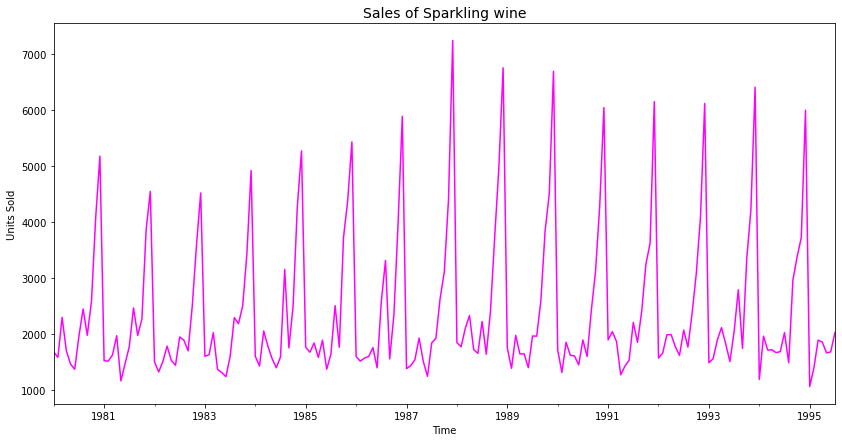

In [8]:
sparkling.plot(color='magenta') 
plt.title('Sales of Sparkling wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')
plt.show()

### 1.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Basic measures of descriptive statistics

In [9]:
printmd('**Data Description for Sparkling Dataset:**')
sparkling.describe()

**Data Description for Sparkling Dataset:**

count     187.000000
mean     2402.417112
std      1295.111540
min      1070.000000
25%      1605.000000
50%      1874.000000
75%      2549.000000
max      7242.000000
Name: Sparkling, dtype: float64

#### Plot a boxplot to understand the spread of sales across different years and within different months across years
#### Yearly

**Yearly Boxplot for Sparkling Dataset:**

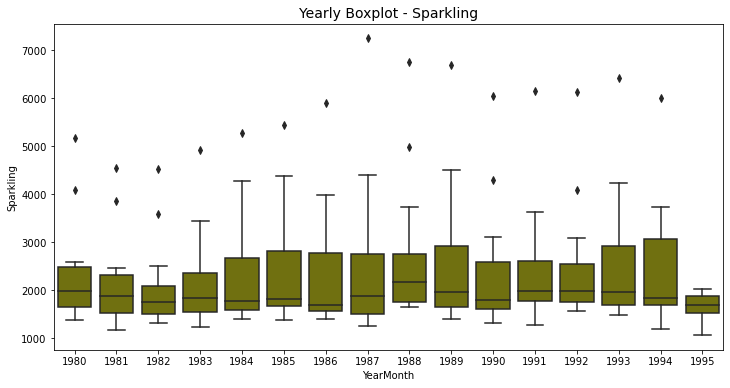

In [10]:
printmd('**Yearly Boxplot for Sparkling Dataset:**')
plt.figure(figsize = (12, 6))
sns.boxplot(x = sparkling.index.year,y = sparkling, color = 'olive')
plt.title('Yearly Boxplot - Sparkling', fontsize=14)
plt.show()

#### Monthly

**Monthly Boxplot for all the years for Sparkling Dataset:**

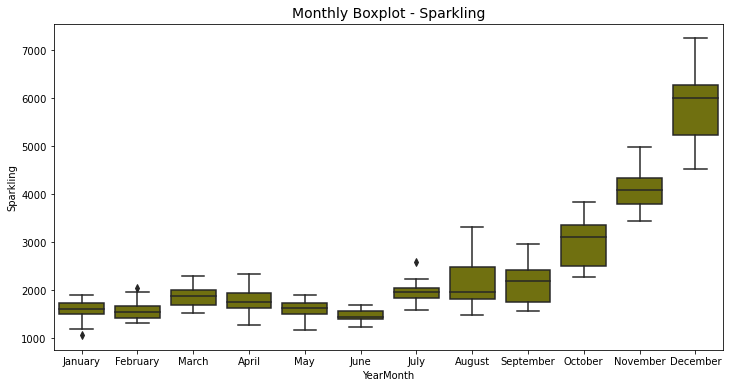

In [11]:
printmd('**Monthly Boxplot for all the years for Sparkling Dataset:**')
plt.figure(figsize = (12, 6))
sns.boxplot(x = sparkling.index.month_name(),y = sparkling, color='olive')
plt.title('Monthly Boxplot - Sparkling', fontsize=14)
plt.show()

#### Plot a time series monthlyplot to understand the spread of sales across different years and within different months across years.


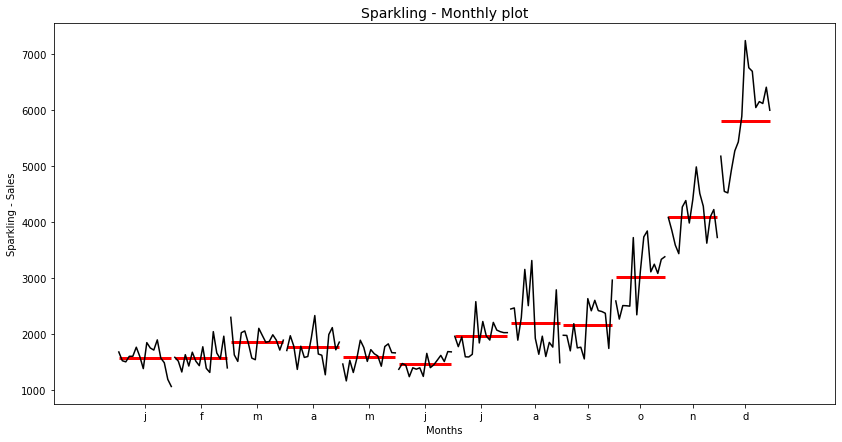

In [12]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(sparkling,ylabel='Sparkling - Sales')
plt.xlabel('Months')
plt.title('Sparkling - Monthly plot', fontsize = 14)
plt.show()

#### Plot graph of monthly Wine sales across years

In [13]:
monthly_sales_across_years_sparkling = pd.pivot_table(pd.DataFrame(sparkling), columns = sparkling.index.month, 
                                                      index = sparkling.index.year)
monthly_sales_across_years_sparkling

Sparkling                                                          \
YearMonth        1       2       3       4       5       6       7       8    
YearMonth                                                                     
1980         1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981         1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982         1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983         1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984         1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985         1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986         1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987         1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988         1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989         1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990         1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991         1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992         1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993         1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994         1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995         1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

                                           
YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

**Monthly Wine sales across years for Sparkling:**

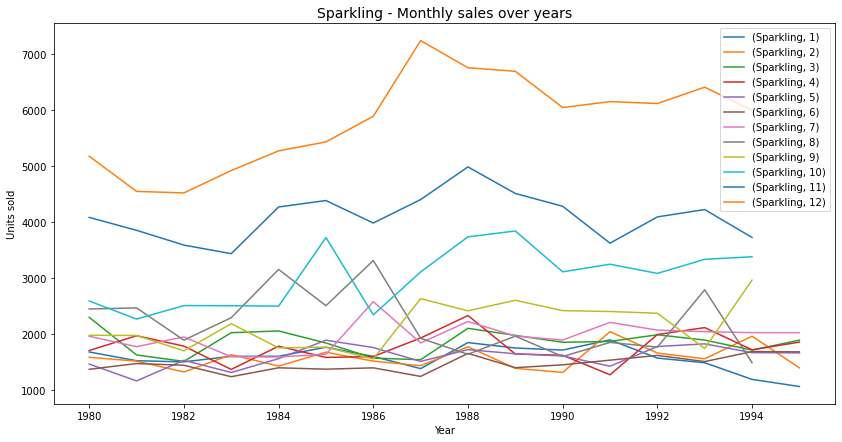

In [14]:
printmd('**Monthly Wine sales across years for Sparkling:**')
monthly_sales_across_years_sparkling.plot()
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Sparkling - Monthly sales over years', fontsize=14)
plt.show()

#### Plot the average sales per month and the month on month percentage change of sales

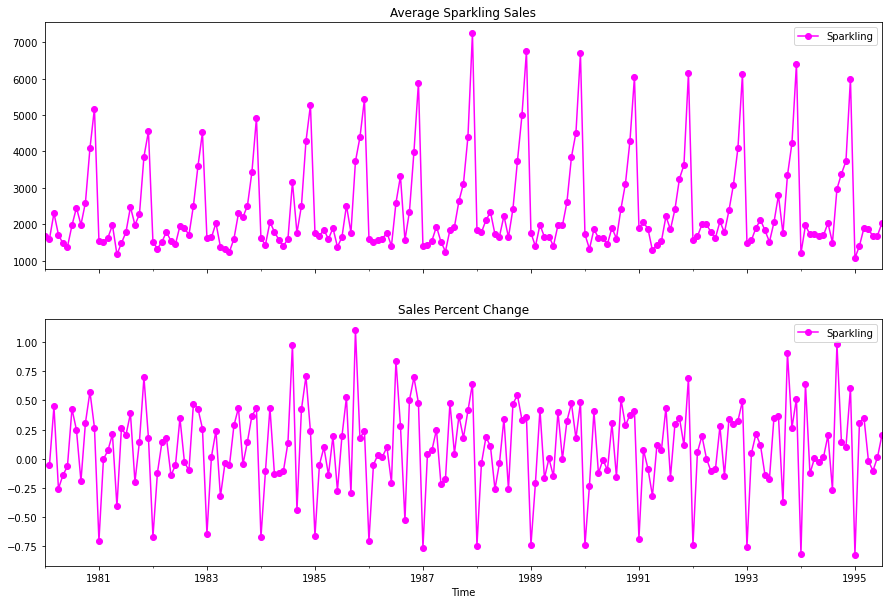

In [15]:
average_sparkling    = sparkling.groupby(sparkling.index).mean()
pct_change_sparkling = sparkling.groupby(sparkling.index).sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,10))
ax1 = average_sparkling.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales", color = 'magenta')
ax2 = pct_change_sparkling.plot(legend=True,ax=axis2,marker='o',color='magenta',title="Sales Percent Change")
plt.xlabel('Time')
plt.legend(loc='best')
plt.show()

#### Decompose the Time Series and plot the different components.

**Decomposition of Sparkling Time Series with additive Seasonality:**

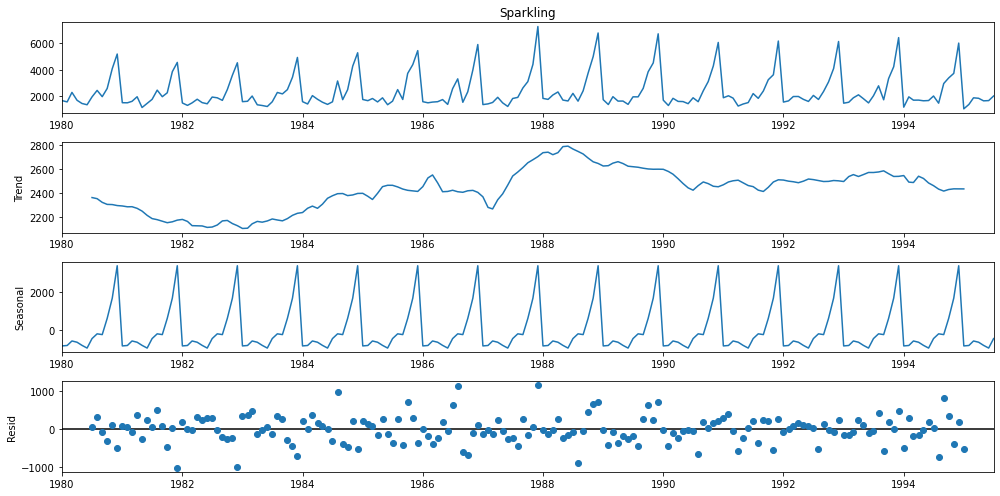

In [16]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
printmd('**Decomposition of Sparkling Time Series with additive Seasonality:**')
decomposition_add = seasonal_decompose(sparkling,model='additive')
decomposition_add.plot();

**Decomposition of Sparkling Time Series with multiplicative Seasonality:**

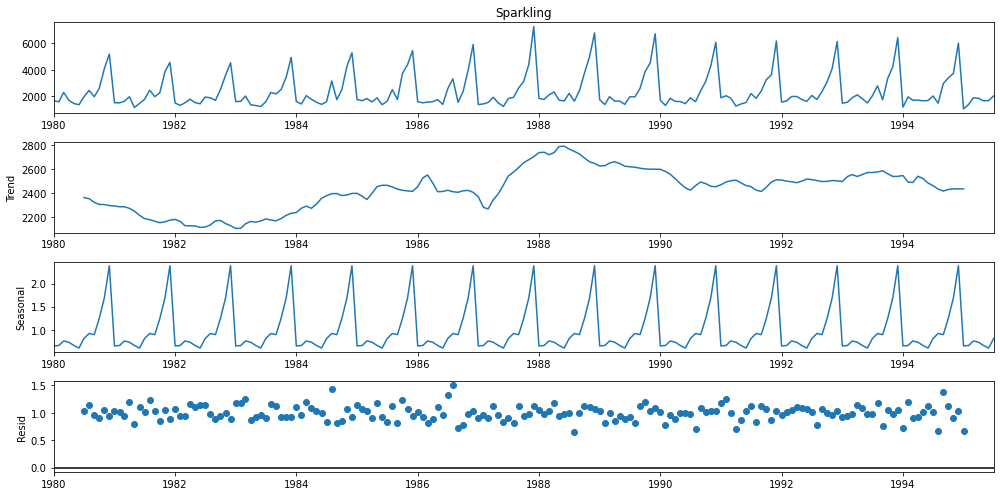

In [17]:
printmd('**Decomposition of Sparkling Time Series with multiplicative Seasonality:**')
decomposition_mul = seasonal_decompose(sparkling,model='multiplicative')
decomposition_mul.plot();

### 1.3. Split the data into training and test. The test data should start in 1991.

In [18]:
spark = pd.DataFrame(sparkling)
train_spark = spark[spark.index.year < 1991]
test_spark = spark[spark.index.year >= 1991]

In [19]:
print('Length of Train Data:', len(train_spark))
print('Length of Test Data:', len(test_spark))

Length of Train Data: 132
Length of Test Data: 55


In [20]:
print('First few rows of Training Data:','\n',train_spark.head(),'\n')
print('Last few rows of Training Data:','\n',train_spark.tail(),'\n')
print('First few rows of Test Data:','\n',test_spark.head(),'\n')
print('Last few rows of Test Data:','\n',test_spark.tail(),'\n')

First few rows of Training Data: 
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

Last few rows of Training Data: 
             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047 

First few rows of Test Data: 
             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432 

Last few rows of Test Data: 
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031 



In [21]:
print(train_spark.shape)
print(test_spark.shape)

(132, 1)
(55, 1)


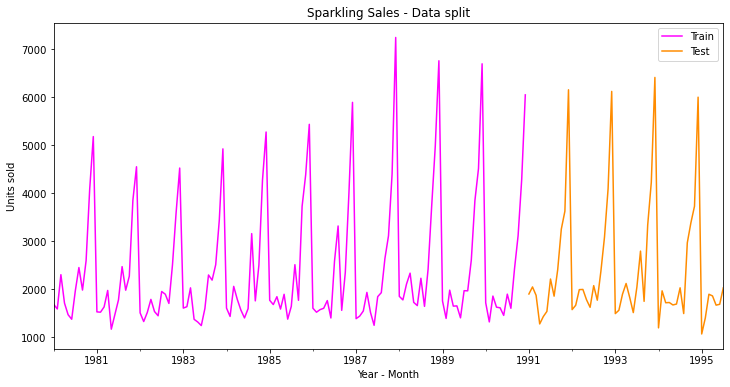

In [22]:
plt.figure(figsize = (12, 6))
train_spark['Sparkling'].plot(label = 'Train',color='magenta')
test_spark['Sparkling'].plot(label = 'Test',color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling Sales - Data split', fontsize = 12)
plt.show();

### 1.4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

#### Model 1: Linear Regression

In [23]:
train_time = [i+1 for i in range(len(train_spark))]
test_time = [i+133 for i in range(len(test_spark))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [24]:
LinearRegression_train_spark = train_spark.copy()
LinearRegression_test_spark = test_spark.copy()

In [25]:
LinearRegression_train_spark['time'] = train_time
LinearRegression_test_spark['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train_spark.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train_spark.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test_spark.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test_spark.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train_spark[['time']],LinearRegression_train_spark['Sparkling'].values)

LinearRegression()

In [27]:
LinearRegression_train_spark['RegOnTime_spark'] = lr.predict(LinearRegression_train_spark[['time']])
LinearRegression_test_spark['RegOnTime_spark'] = lr.predict(LinearRegression_test_spark[['time']])

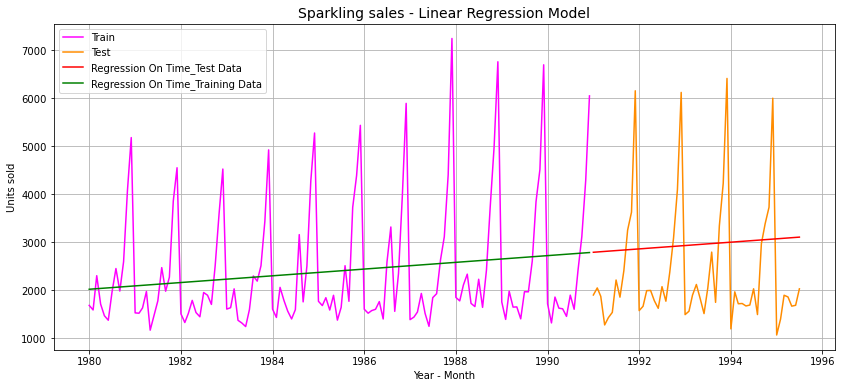

In [28]:
plt.figure(figsize=(14,6))
plt.plot( train_spark['Sparkling'], label='Train',color = 'magenta')
plt.plot(test_spark['Sparkling'], label='Test',color = 'darkorange')
plt.plot(LinearRegression_test_spark['RegOnTime_spark'], label='Regression On Time_Test Data',color = 'red')
plt.plot(LinearRegression_train_spark['RegOnTime_spark'], label='Regression On Time_Training Data',color = 'green')
plt.title('Sparkling sales - Linear Regression Model', fontsize = 14)
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.grid();

#### Model Evaluation - RMSE:


In [29]:
rmse_reg = metrics.mean_squared_error(test_spark['Sparkling'],LinearRegression_test_spark['RegOnTime_spark'],squared=False)
print("For Regression On Time forecast on the Test Data, RMSE is %3.3f " %(rmse_reg))

For Regression On Time forecast on the Test Data, RMSE is 1389.135 


In [30]:
spark_resultsDf = pd.DataFrame({'Test RMSE': [rmse_reg]},index=['RegressionOnTime'])
spark_resultsDf

Test RMSE
RegressionOnTime  1389.135175

#### Model 2: Naive forecast

In [31]:
NaiveModel_train = train_spark.copy()
NaiveModel_test = test_spark.copy()

In [32]:
NaiveModel_train['spark_naive'] = np.asarray(train_spark['Sparkling'])[len(np.asarray(train_spark['Sparkling']))-1]
NaiveModel_train['spark_naive'].head()

YearMonth
1980-01-01    6047
1980-02-01    6047
1980-03-01    6047
1980-04-01    6047
1980-05-01    6047
Name: spark_naive, dtype: int64

In [33]:
NaiveModel_test['spark_naive'] = np.asarray(train_spark['Sparkling'])[len(np.asarray(train_spark['Sparkling']))-1]
NaiveModel_test['spark_naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: spark_naive, dtype: int64

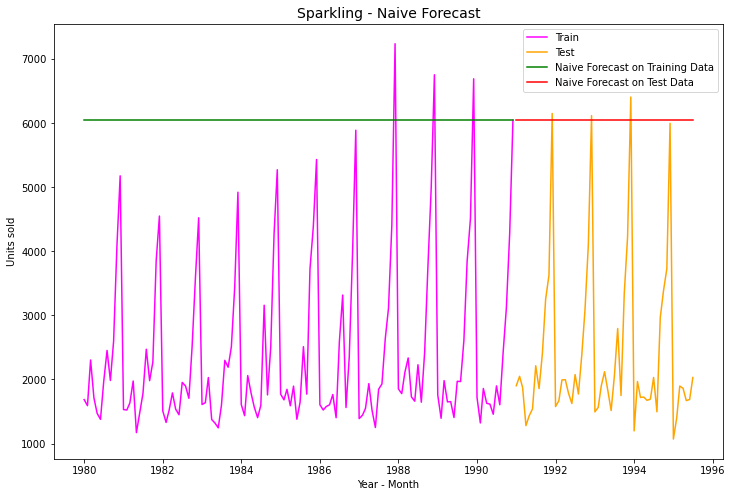

In [34]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(test_spark['Sparkling'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['spark_naive'], label='Naive Forecast on Training Data', color = 'green')
plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - Naive Forecast", fontsize = 14)
plt.show();

#### Model Evaluation - RMSE:

In [35]:
rmse_naive = metrics.mean_squared_error(test_spark['Sparkling'],NaiveModel_test['spark_naive'],squared=False)
print("For Naive forecast on the Test Data, RMSE is %3.3f " %(rmse_naive))

For Naive forecast on the Test Data, RMSE is 3864.279 


In [36]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_naive]},index=['NaiveModel'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

#### Model 3: Simple Average

In [37]:
SimpleAverage_train = train_spark.copy()
SimpleAverage_test = test_spark.copy()

In [38]:
SimpleAverage_train['spark_mean_forecast'] = train_spark['Sparkling'].mean()
SimpleAverage_train['spark_mean_forecast'].head()

YearMonth
1980-01-01    2403.780303
1980-02-01    2403.780303
1980-03-01    2403.780303
1980-04-01    2403.780303
1980-05-01    2403.780303
Name: spark_mean_forecast, dtype: float64

In [39]:
SimpleAverage_test['spark_mean_forecast'] = train_spark['Sparkling'].mean()
SimpleAverage_test['spark_mean_forecast'].head()

YearMonth
1991-01-01    2403.780303
1991-02-01    2403.780303
1991-03-01    2403.780303
1991-04-01    2403.780303
1991-05-01    2403.780303
Name: spark_mean_forecast, dtype: float64

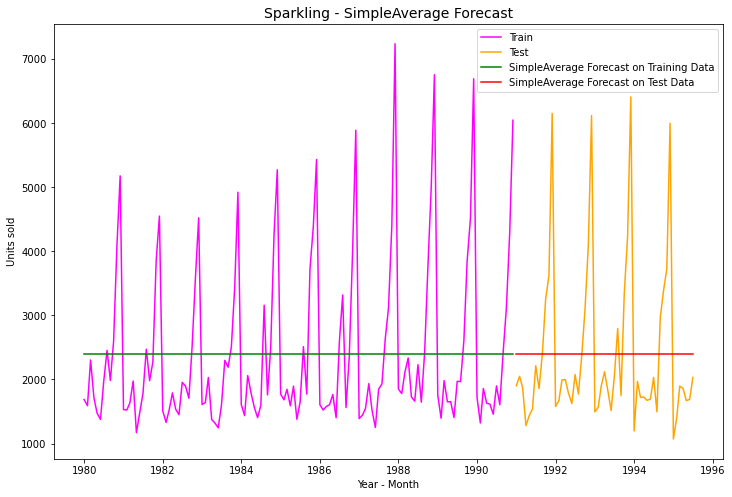

In [40]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(test_spark['Sparkling'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'green')
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - SimpleAverage Forecast", fontsize=14)
plt.show()

#### Model Evaluation - RMSE:

In [41]:
rmse_simple_avg = metrics.mean_squared_error(test_spark['Sparkling'],SimpleAverage_test['spark_mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data, RMSE is %3.3f " %(rmse_simple_avg))

For Simple Average forecast on the Test Data, RMSE is 1275.082 


In [42]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_simple_avg]},index=['SimpleAverage'])
spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_3])
spark_resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352
SimpleAverage     1275.081804

#### Model 4: Moving Average

In [43]:
MovingAverage = spark.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [44]:
MovingAverage['Spark_Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Spark_Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Spark_Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Spark_Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Spark_Trailing_2  Spark_Trailing_4  Spark_Trailing_6  \
YearMonth                                                                     
1980-01-01       1686               NaN               NaN               NaN   
1980-02-01       1591            1638.5               NaN               NaN   
1980-03-01       2304            1947.5               NaN               NaN   
1980-04-01       1712            2008.0           1823.25               NaN   
1980-05-01       1471            1591.5           1769.50               NaN   

            Spark_Trailing_9  
YearMonth                     
1980-01-01               NaN  
1980-02-01               NaN  
1980-03-01               NaN  
1980-04-01               NaN  
1980-05-01               NaN

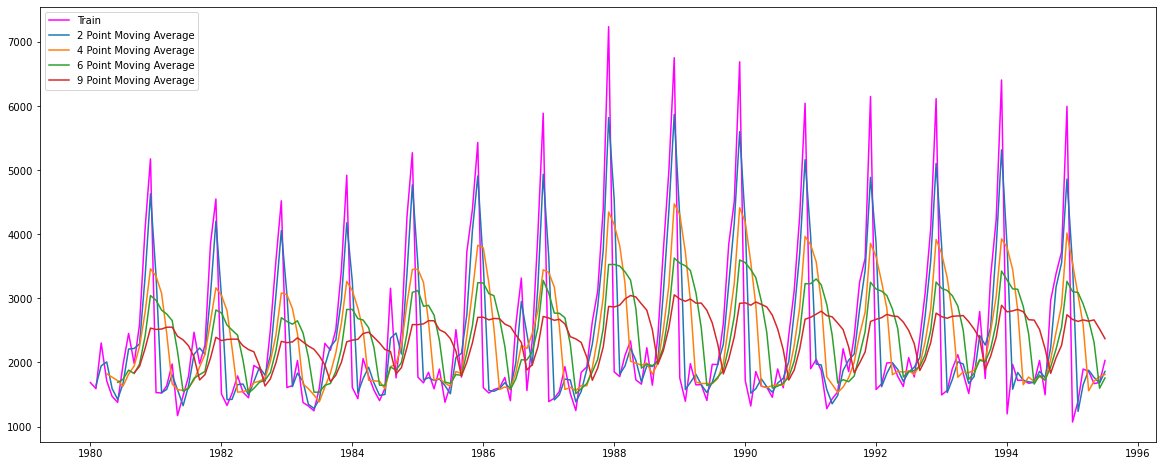

In [45]:
plt.figure(figsize=(20,8))
plt.plot(MovingAverage['Sparkling'], label='Train', color='magenta')
plt.plot(MovingAverage['Spark_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best');

In [46]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

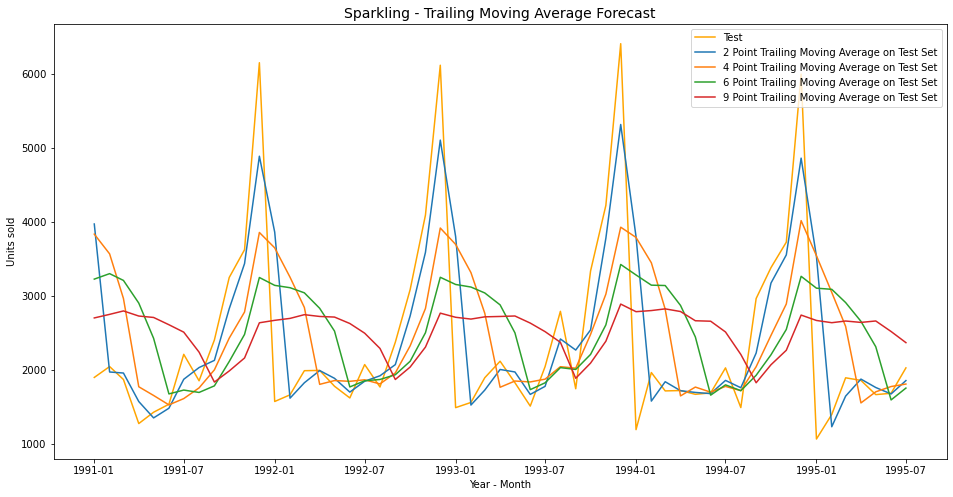

In [47]:
plt.figure(figsize=(16,8))
# plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test', color = 'orange')

plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Sparkling - Trailing Moving Average Forecast", fontsize=14);

In [48]:
## Test Data - rmse_spark --> 2 point Spark_Trailing MA

rmse_spark_MovingAverage_2 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  rmse_spark is %3.3f " %(rmse_spark_MovingAverage_2))

## Test Data - rmse_spark --> 4 point Spark_Trailing MA

rmse_spark_MovingAverage_4 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  rmse_spark is %3.3f" %(rmse_spark_MovingAverage_4))

## Test Data - rmse_spark --> 6 point Spark_Trailing MA

rmse_spark_MovingAverage_6 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  rmse_spark is %3.3f" %(rmse_spark_MovingAverage_6))

## Test Data - rmse_spark --> 9 point Spark_Trailing MA

rmse_spark_MovingAverage_9 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  rmse_spark is %3.3f" %(rmse_spark_MovingAverage_9))

For 2 point Moving Average Model forecast on the Test Data,  rmse_spark is 813.401 
For 4 point Moving Average Model forecast on the Test Data,  rmse_spark is 1156.590
For 6 point Moving Average Model forecast on the Test Data,  rmse_spark is 1283.927
For 9 point Moving Average Model forecast on the Test Data,  rmse_spark is 1346.278


In [49]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_spark_MovingAverage_2,rmse_spark_MovingAverage_4
                                          ,rmse_spark_MovingAverage_6,rmse_spark_MovingAverage_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_4])
spark_resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352
SimpleAverage     1275.081804
2 point TMA        813.400684
4 point TMA       1156.589694
6 point TMA       1283.927428
9 point TMA       1346.278315

#### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots

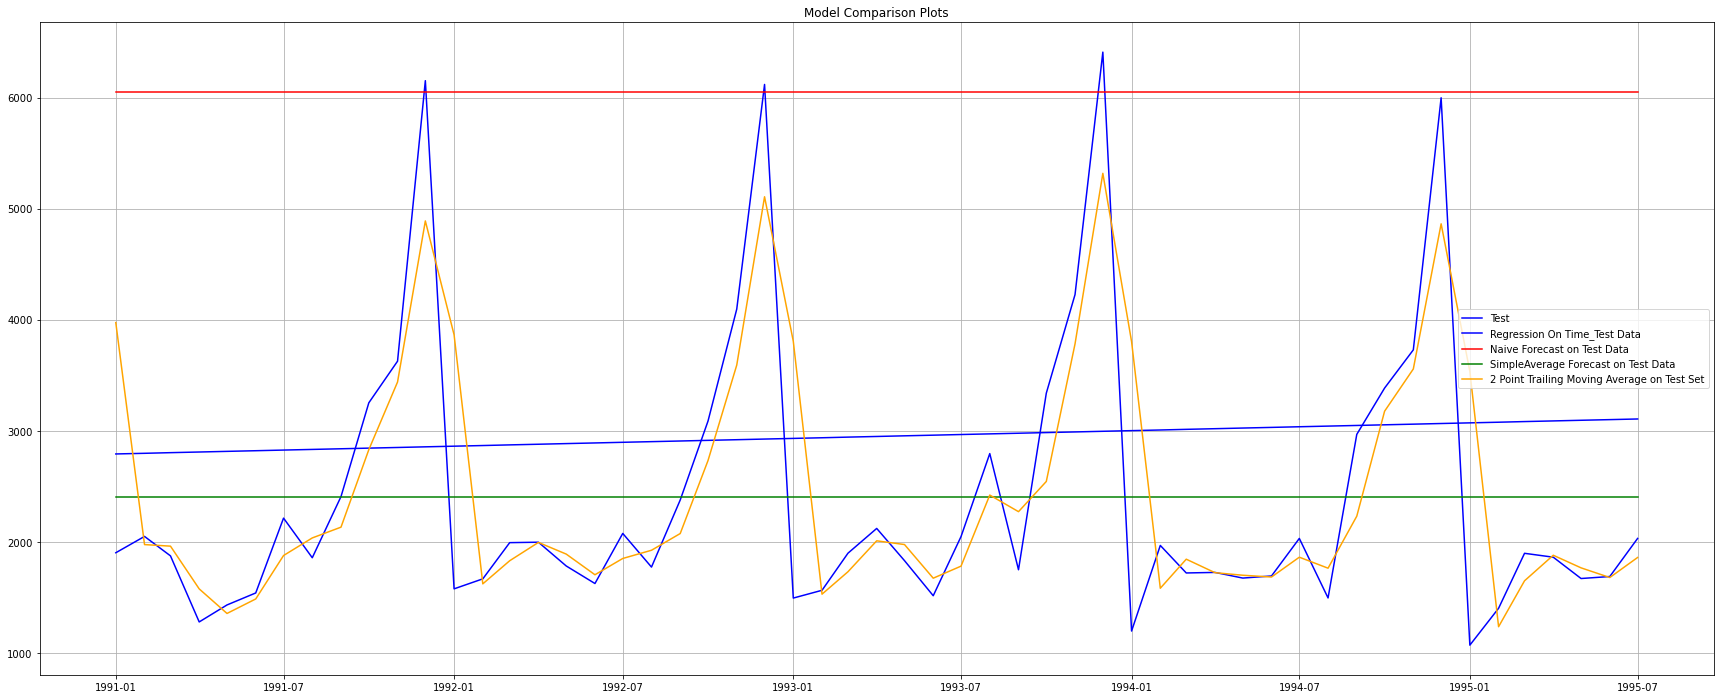

In [50]:
## Plotting on Test data

plt.figure(figsize=(30,12))
#plt.plot(train_spark['Sparkling'], label='Train',color='magenta')
plt.plot(test_spark['Sparkling'], label='Test',color='blue')

plt.plot(LinearRegression_test_spark['RegOnTime_spark'], label='Regression On Time_Test Data',color='blue')

plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data',color='red')

plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data',color='green')

plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set',color='orange')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

#### Model 5: Simple Exponential Smoothing

In [51]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [52]:
SES_train = train_spark.copy()
SES_test = test_spark.copy()

In [53]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [54]:
### Autofit
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)
printmd('**The output parameters for optimized model are:**')
model_SES_autofit.params

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


**The output parameters for optimized model are:**

{'smoothing_level': 0.04960659884563118,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047543457245,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [55]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_spark['Sparkling']))
printmd('**Viewing the first five Predictions for Test Data:**')
SES_test.head()

**Viewing the first five Predictions for Test Data:**

Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.929339
1991-02-01       2049  2724.929339
1991-03-01       1874  2724.929339
1991-04-01       1279  2724.929339
1991-05-01       1432  2724.929339

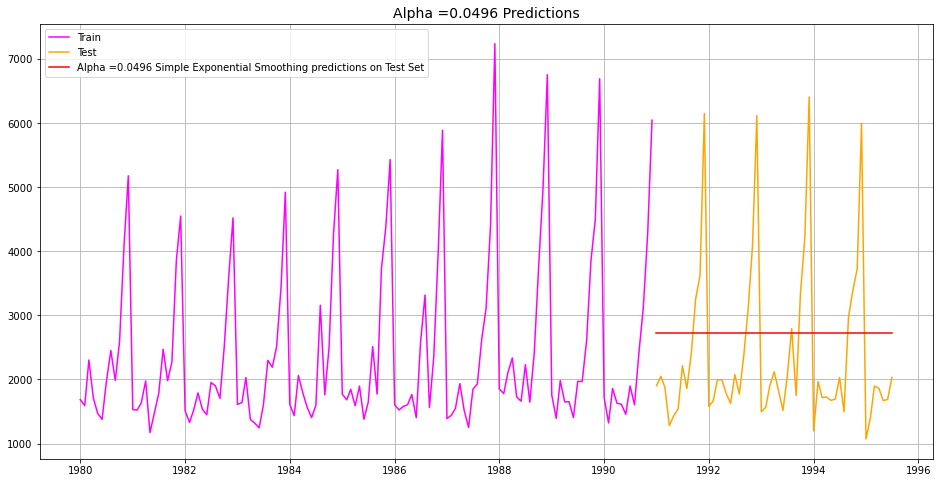

In [56]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train',color = 'magenta')
plt.plot(SES_test['Sparkling'], label='Test',color = 'orange')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set',color = 'red')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0496 Predictions',fontsize = 14);

#### Model Evaluation RMSE for $\alpha$ = 0.0496 : Simple Exponential Smoothing

In [57]:
rmse_SES = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SES))

For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [58]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_SES]}
                           ,index=['Alpha=0.0496, SES Optimized'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_5])
spark_resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverage                1275.081804
2 point TMA                   813.400684
4 point TMA                  1156.589694
6 point TMA                  1283.927428
9 point TMA                  1346.278315
Alpha=0.0496, SES Optimized  1316.034674

#### Iterative Method for Simple Exponential Smoothing

In [59]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [60]:
alpha_list = [0.025,0.05,0.25, 0.1, 0.2, 0.3, 0.5, 0.99]
for i in alpha_list:
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test_spark['Sparkling']))
    
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i 
                                      ,'Test RMSE':rmse_SES_test_i}, ignore_index=True)

#### Model Evaluation RMSE based on Iterations

In [61]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values   Train RMSE    Test RMSE
0         0.025  1322.084340  1286.248846
1         0.050  1318.429335  1316.411742
3         0.100  1333.873836  1375.393398
4         0.200  1356.042987  1595.206839
2         0.250  1359.701408  1755.488175

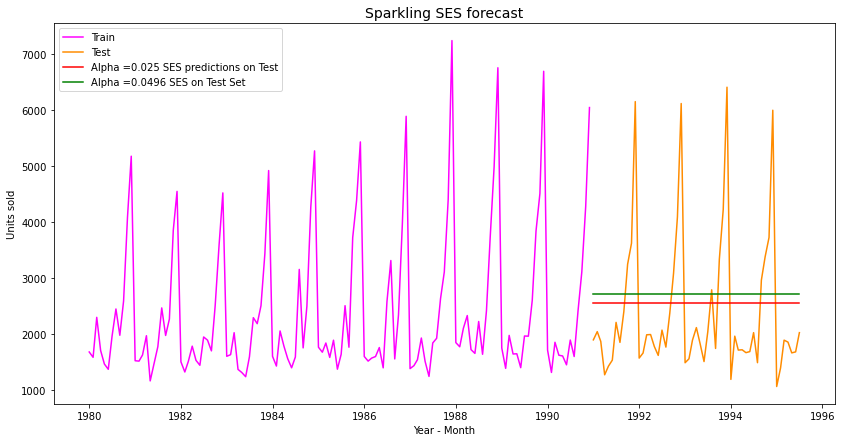

In [62]:
#plt.figure(figsize=(10,5))
plt.plot(SES_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(SES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SES_test['predict', 0.025], color = 'red', label='Alpha =0.025 SES predictions on Test')
plt.plot(SES_test['predict'], label='Alpha =0.0496 SES on Test Set',color = 'green')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling SES forecast', fontsize=14)
plt.legend(loc='best');

In [63]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.025,SES iterative'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_6_1])
spark_resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverage                1275.081804
2 point TMA                   813.400684
4 point TMA                  1156.589694
6 point TMA                  1283.927428
9 point TMA                  1346.278315
Alpha=0.0496, SES Optimized  1316.034674
Alpha=0.025,SES iterative    1286.248846

#### Model 6: Double Exponential Smoothing (Holt's Model)

In [64]:
DES_train = train_spark.copy()
DES_test = test_spark.copy()

In [65]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [66]:
# Autofit model
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)
printmd('**The output parameters for optimized model are:**')
model_DES_autofit.params


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


**The output parameters for optimized model are:**

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [67]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_trend']
print(alpha)
print(beta)

0.6885714285714285
9.999999999999999e-05


In [68]:
DES_test['predict_spark',alpha,beta] = model_DES_autofit.forecast(len(test_spark['Sparkling']))
printmd('**Viewing the first five Predictions for Test Data:**')
DES_test.head()

**Viewing the first five Predictions for Test Data:**

Sparkling  \
YearMonth               
1991-01-01       1902   
1991-02-01       2049   
1991-03-01       1874   
1991-04-01       1279   
1991-05-01       1432   

            (predict_spark, 0.6885714285714285, 9.999999999999999e-05)  
YearMonth                                                               
1991-01-01                                        5221.278699           
1991-02-01                                        5127.886554           
1991-03-01                                        5034.494409           
1991-04-01                                        4941.102264           
1991-05-01                                        4847.710119

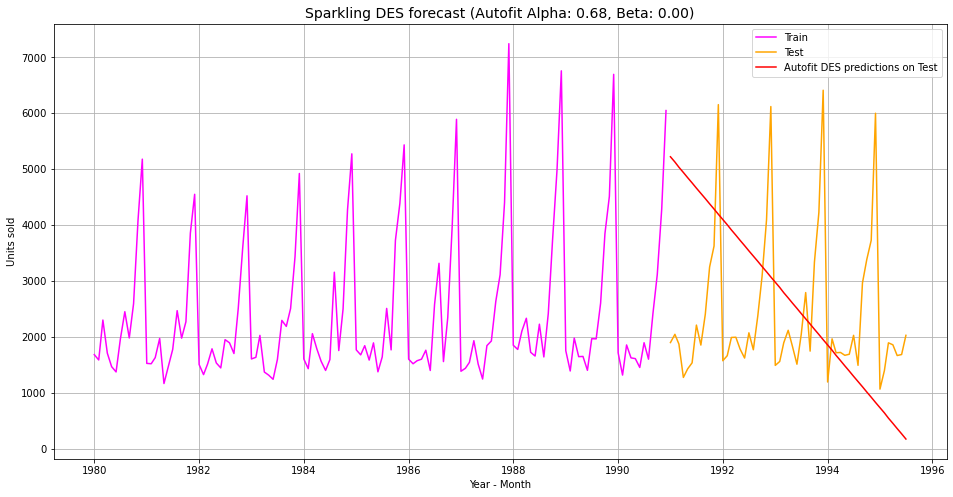

In [69]:
plt.figure(figsize=(16,8))
plt.plot(DES_train['Sparkling'], label='Train',color = 'magenta')
plt.plot(DES_test['Sparkling'], label='Test',color = 'orange')

plt.plot(DES_test['predict_spark',alpha,beta], color = 'red', label='Autofit DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast (Autofit Alpha: 0.68, Beta: 0.00)', fontsize=14)
plt.legend(loc='best')
plt.grid();


#### Model Evaluation for $\alpha$ = 0.68 and $\beta$ = 0.0 : DES-Autofit Model

In [70]:
rmse_DES = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta],squared=False)
print("For Auto-fit Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_DES))

For Auto-fit Double Exponential Smoothing Model forecast on the Test Data, RMSE is 2007.239


In [71]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_DES]}
                           ,index=['Alpha=0.68,Beta=0.0, DES Optimized'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_7])
spark_resultsDf

Test RMSE
RegressionOnTime                    1389.135175
NaiveModel                          3864.279352
SimpleAverage                       1275.081804
2 point TMA                          813.400684
4 point TMA                         1156.589694
6 point TMA                         1283.927428
9 point TMA                         1346.278315
Alpha=0.0496, SES Optimized         1316.034674
Alpha=0.025,SES iterative           1286.248846
Alpha=0.68,Beta=0.0, DES Optimized  2007.238526

#### Iterative Method for Double Exponential Smoothing

In [72]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [73]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test_spark['Sparkling']))
        
        rmse_DES_train = np.round(metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False),2)
        
        rmse_DES_test = np.round(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False),2)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                          ,'Test RMSE':rmse_DES_test}, ignore_index=True)

#### Model Evaluation based on Iterations

In [74]:
resultsDf_7.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1     1382.52    1778.56
1            0.1          0.2     1413.60    2599.44
10           0.2          0.1     1418.04    3611.76
2            0.1          0.3     1445.76    4293.08
20           0.3          0.1     1431.17    5908.19

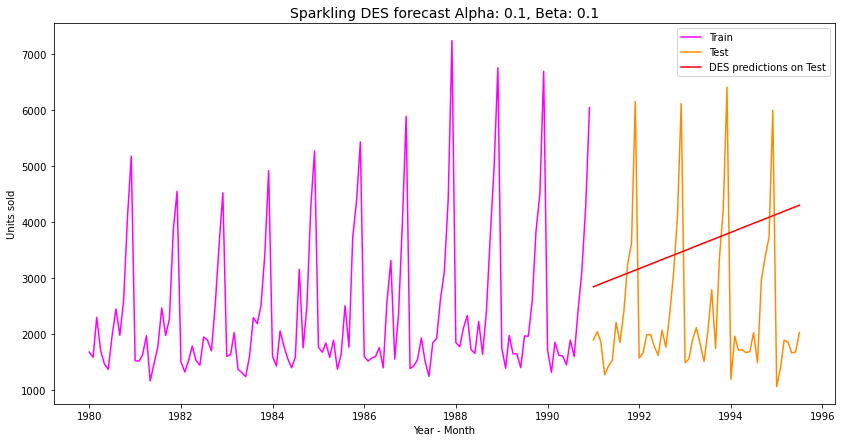

In [75]:
plt.plot(DES_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_test['predict', 0.1, 0.1], color = 'red', label='DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast Alpha: 0.1, Beta: 0.1', fontsize=14)
plt.legend(loc='best');

In [76]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DES iterative'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_7_1])
spark_resultsDf

Test RMSE
RegressionOnTime                    1389.135175
NaiveModel                          3864.279352
SimpleAverage                       1275.081804
2 point TMA                          813.400684
4 point TMA                         1156.589694
6 point TMA                         1283.927428
9 point TMA                         1346.278315
Alpha=0.0496, SES Optimized         1316.034674
Alpha=0.025,SES iterative           1286.248846
Alpha=0.68,Beta=0.0, DES Optimized  2007.238526
Alpha=0.1,Beta=0.1,DES iterative    1778.560000

#### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [77]:
TES_train = train_spark.copy()
TES_test = test_spark.copy()

In [78]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [79]:
#Auto fit Model:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)
printmd('**The output parameters for optimized model are:**')
model_TES_autofit.params

**The output parameters for optimized model are:**

{'smoothing_level': 0.11057044018305404,
 'smoothing_trend': 0.06076609768412894,
 'smoothing_seasonal': 0.39187601902826213,
 'damping_trend': nan,
 'initial_level': 1621.806699459997,
 'initial_trend': -8.175193580026457,
 'initial_seasons': array([1.07304448, 1.02730389, 1.39469706, 1.20333193, 0.98008967,
        0.97664181, 1.39261648, 1.70888984, 1.37519684, 1.81953245,
        2.82880203, 3.59142504]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [80]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
print(alpha)
print(beta)
print(gamma)

0.11057044018305404
0.06076609768412894
0.39187601902826213


In [81]:
TES_test['predict',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test_spark['Sparkling']))

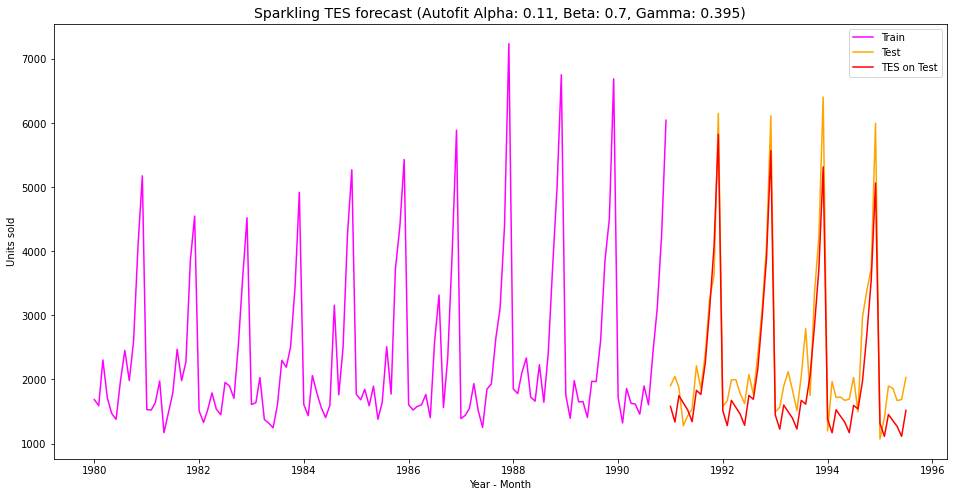

In [82]:
plt.figure(figsize=(16,8))
plt.plot(TES_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(TES_test['Sparkling'], label='Test', color = 'orange')

plt.plot(TES_test['predict',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Autofit Alpha: 0.11, Beta: 0.7, Gamma: 0.395)', fontsize=14)

plt.legend(loc='best');

#### Model Evaluation for $\alpha$ = 0.11 and $\beta$ = 0.7$\beta$ = 0.395 : TES-Autofit Model

In [83]:
rmse_TES = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',alpha,beta,gamma],squared=False)
print("For Auto-fit Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_TES))

For Auto-fit Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 463.502


In [84]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_TES]}
                           ,index=['Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8])
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   463.501976

#### Iterative Method for Triple Exponential Smoothing

In [85]:
resultsDf_8 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8#### After performing iterations by changing the probability cut-off; we see that 0.4 and 0.5 gives better accuracy than the rest of the custom cut-off values. But 0.4 cut-off gives us the best 'f1-score'. Hence, we will take the cut-off as 0.4 to get the optimum 'f1' score in order to improve the test set results

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [86]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test_spark['Sparkling']))
        
            rmse_TES_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_TES_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_TES_train,'Test RMSE':rmse_TES_test}, ignore_index=True)

#### Model Evaluation based on Iterations

In [87]:
resultsDf_8.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Beta Values  Train RMSE   Test RMSE  Gamma Values
240           0.4          0.1  387.990141  371.367690           0.3
321           0.5          0.1  409.863151  379.651522           0.4
320           0.5          0.1  401.756285  379.852675           0.3
64            0.1          0.9  435.461755  392.102406           0.3
176           0.3          0.3  404.513320  392.786198           0.3

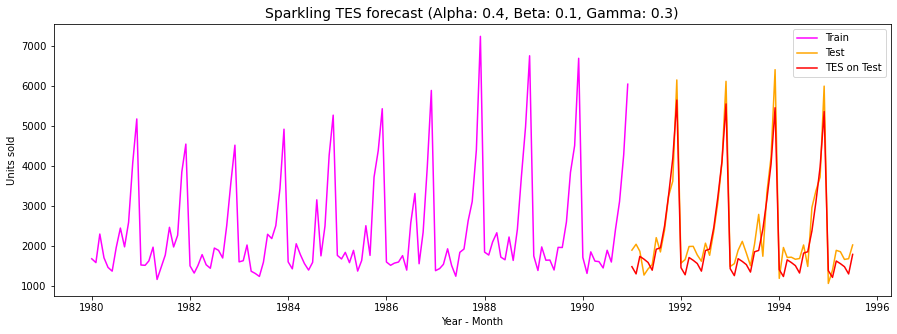

In [88]:
plt.figure(figsize=(15,5))
plt.plot(TES_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(TES_test['Sparkling'], label='Test', color = 'orange')

plt.plot(TES_test['predict', 0.4, 0.1, 0.3], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Alpha: 0.4, Beta: 0.1, Gamma: 0.3)', fontsize=14)

plt.legend(loc='best');

In [89]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [resultsDf_8.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                           ,index=['Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_1])
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   463.501976
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690

In [90]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   463.501976
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
SimpleAverage                                  1275.081804
6 point TMA                                    1283.927428
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.0496, SES Optimized                    1316.034674
9 point TMA                                    1346.278315
RegressionOnTime                               1389.135175
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
NaiveModel                                     3864.279352

#### Plot all above models

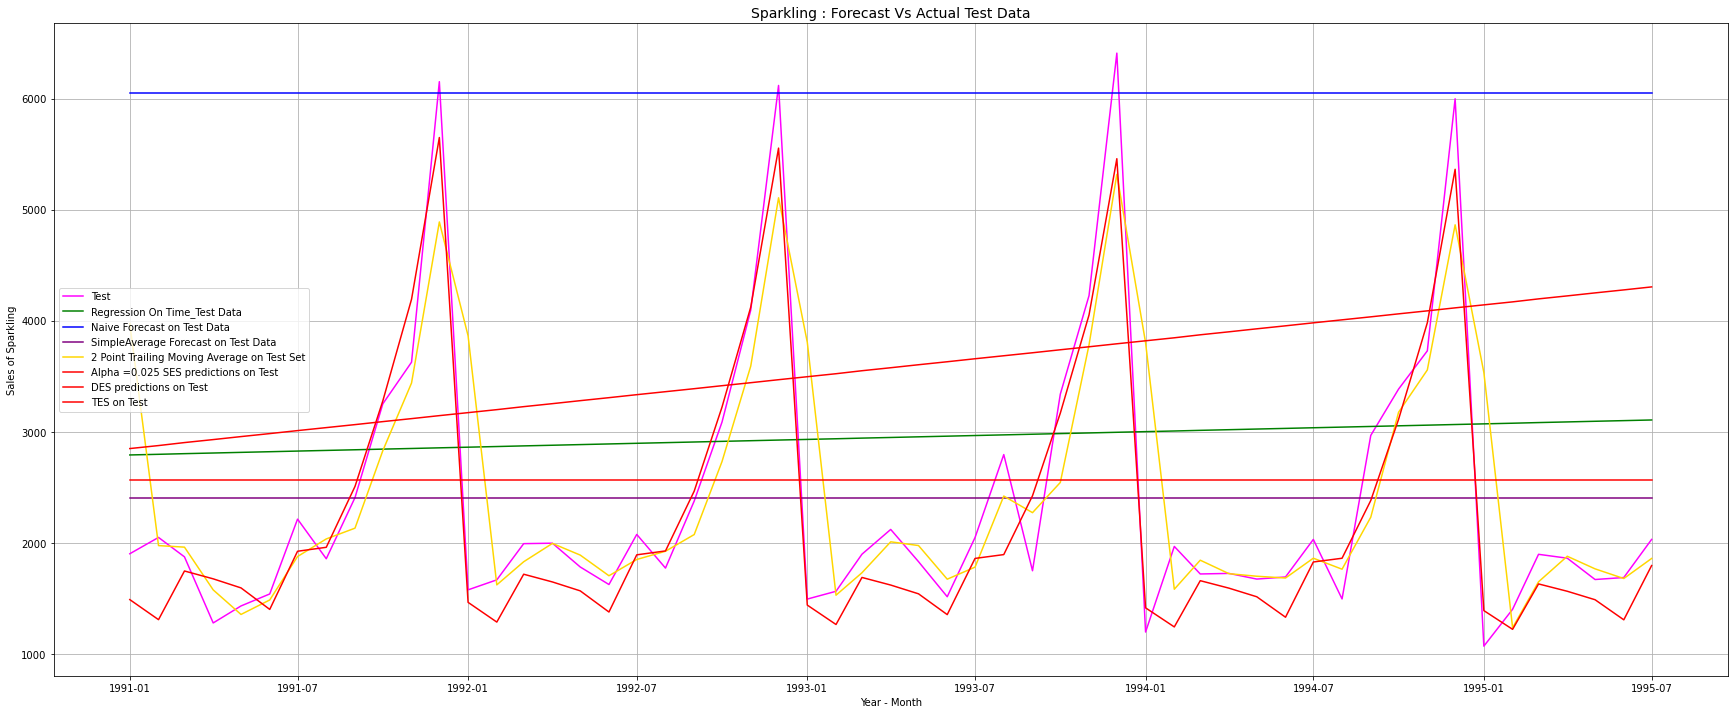

In [91]:
## Plotting on Test data

plt.figure(figsize=(30,12))
#Train Data
#plt.plot(train_spark['Sparkling'], label='Train',color='magenta')
#Test Data
plt.plot(test_spark['Sparkling'], label='Test',color='magenta')
#Linear Regression
plt.plot(LinearRegression_test_spark['RegOnTime_spark'], label='Regression On Time_Test Data',color='green')
#Naive Forecast
plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data',color='blue')
#Simple Average
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data',color='purple')
#2-point trailing moving average
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set',color='gold')
#SES itervative at alpha=0.025
plt.plot(SES_test['predict', 0.025], color = 'red', label='Alpha =0.025 SES predictions on Test')
#DES iterative at alpha=0.1 and beta=0.1
plt.plot(DES_test['predict', 0.1, 0.1], color = 'red', label='DES predictions on Test')
#TES iterative at alpha=0.4, beta=0.1 and gamma=0.3
plt.plot(TES_test['predict', 0.4, 0.1, 0.3], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Sales of Sparkling')
plt.title('Sparkling : Forecast Vs Actual Test Data', fontsize=14)
plt.grid()
plt.legend(loc='best');

### 1.5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
#### Note: Stationarity should be checked at alpha = 0.05.

#### Check for stationarity of the whole Time Series data.

In [92]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

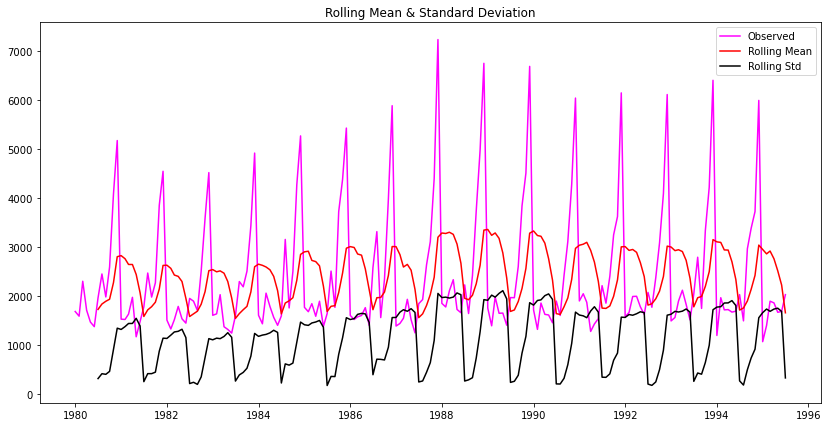

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [93]:
#Original Time Series
test_stationarity(spark['Sparkling'],'magenta')

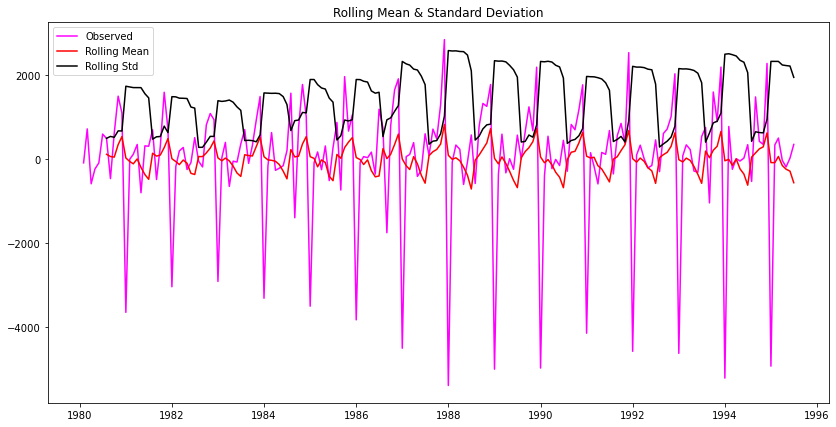

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [94]:
#Diff of order 1
test_stationarity(spark['Sparkling'].diff().dropna(),'magenta')

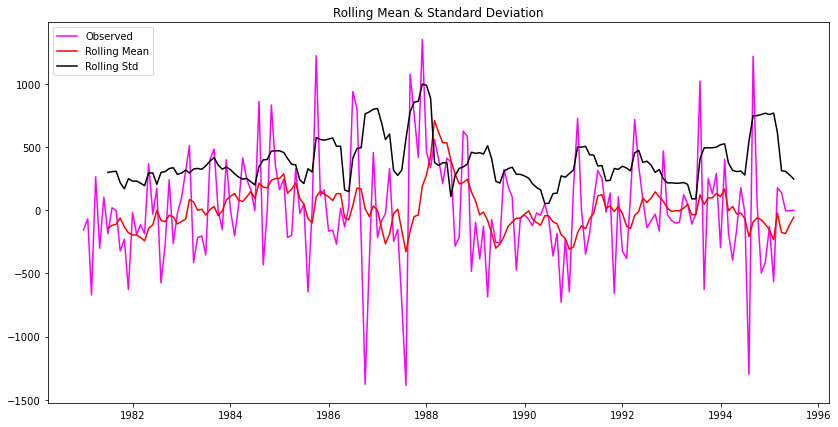

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [95]:
#check Seasonality Time Series: 
test_stationarity(spark['Sparkling'].diff(12).dropna(), 'magenta')

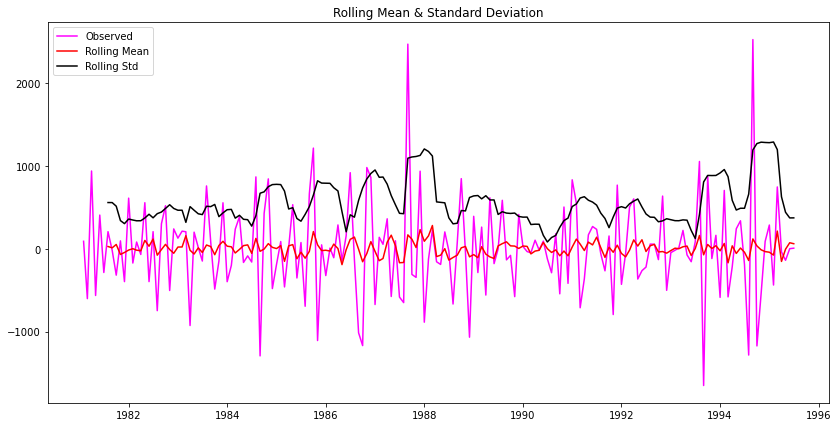

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [96]:
test_stationarity((spark['Sparkling'].diff(12).dropna()).diff().dropna(), 'magenta')

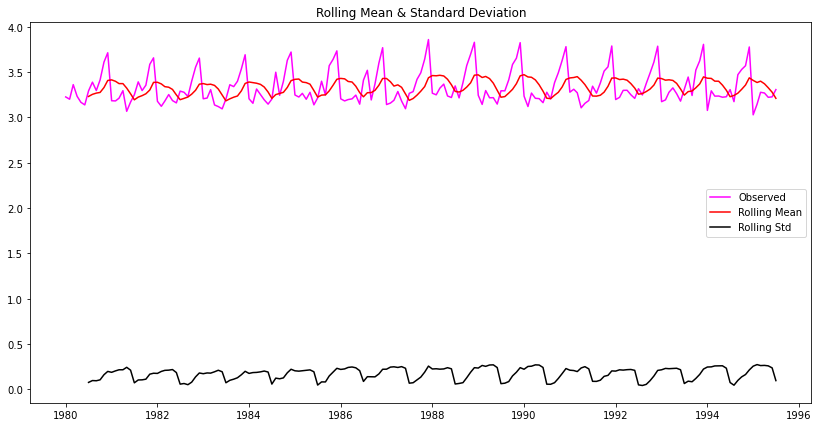

Results of Dickey-Fuller Test:
Test Statistic                  -1.749630
p-value                          0.405740
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [97]:
#Take Log series
test_stationarity(np.log10(spark['Sparkling']), 'magenta')

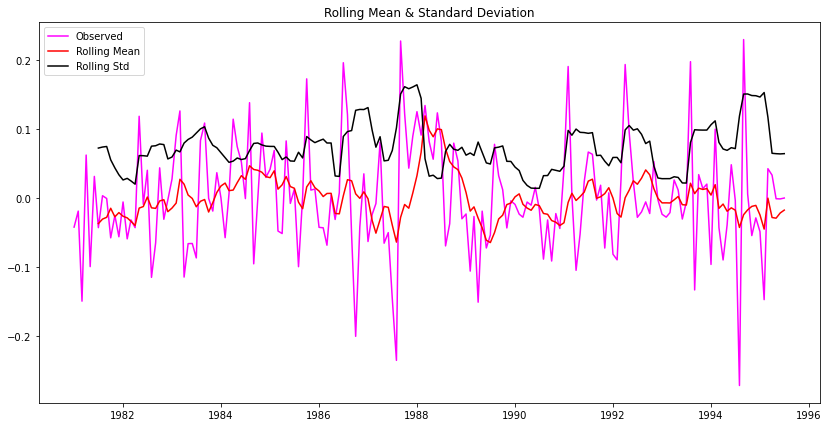

Results of Dickey-Fuller Test:
Test Statistic                  -5.183811
p-value                          0.000009
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [98]:
# difference of log series
test_stationarity(np.log10(spark['Sparkling']).diff(12).dropna(),  'magenta')

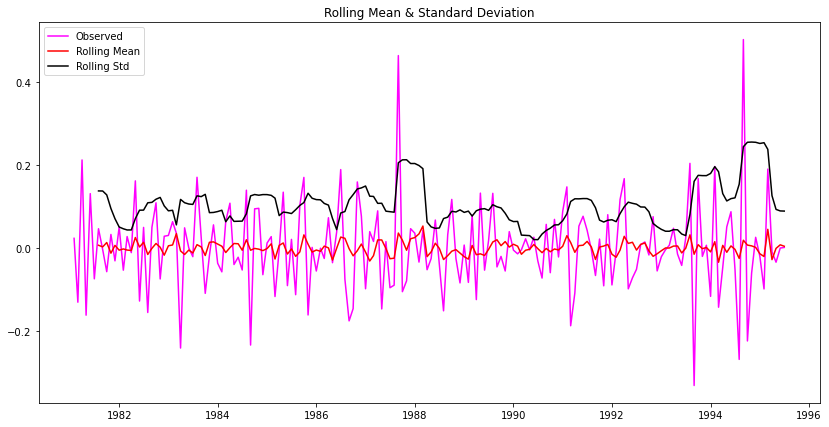

Results of Dickey-Fuller Test:
Test Statistic                  -5.254601
p-value                          0.000007
#Lags Used                      12.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64 



In [99]:
test_stationarity((np.log10(spark['Sparkling']).diff(12).dropna()).diff().dropna(),  'magenta')

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [100]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

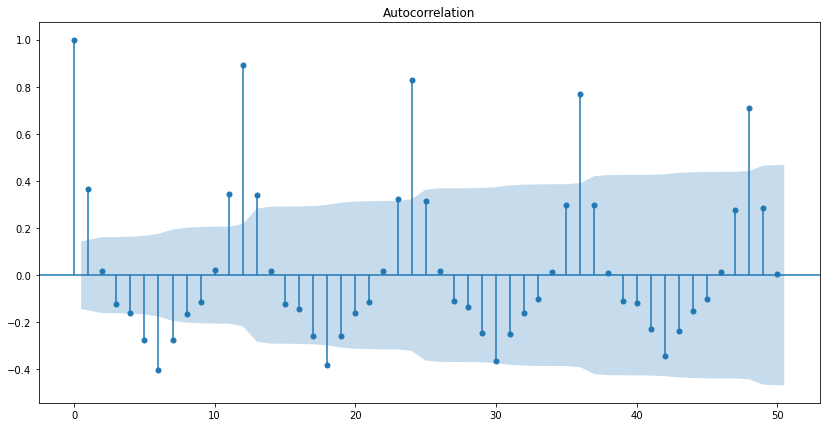

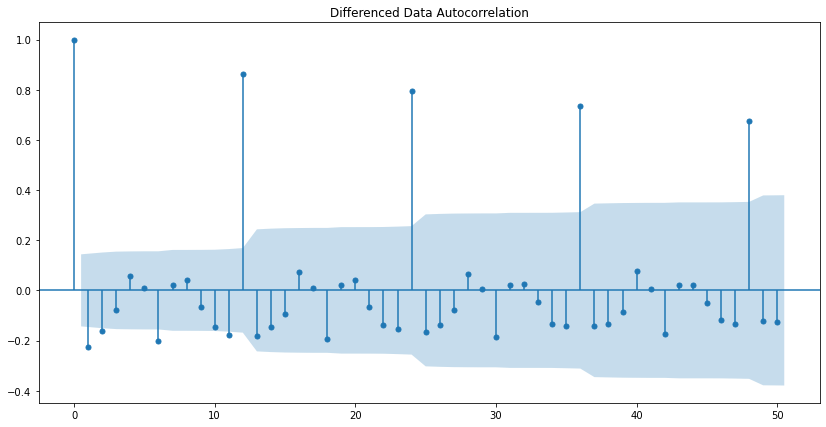

In [101]:
## ACF Plots
plot_acf(spark['Sparkling'],lags=50)
plot_acf(spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

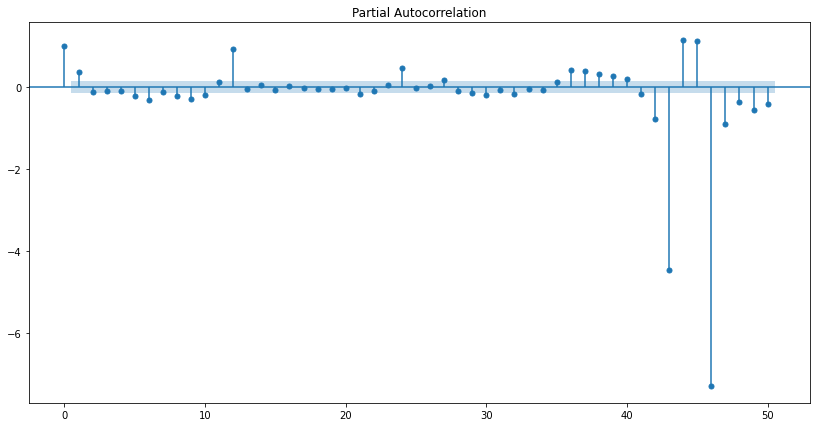

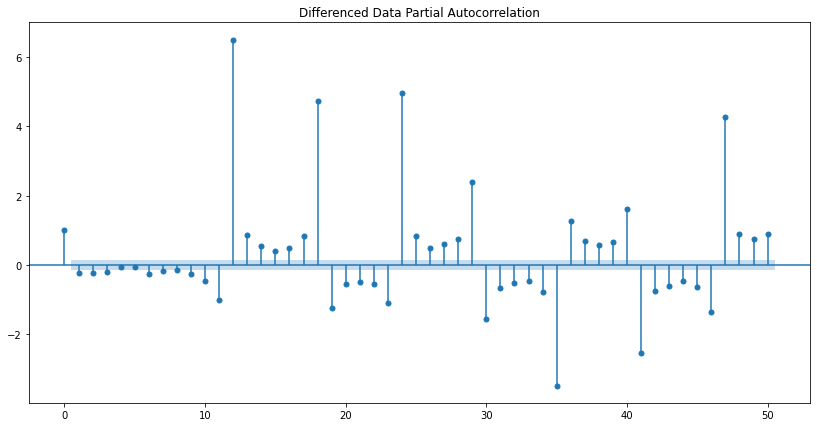

In [102]:
### PACF plots
plot_pacf(spark['Sparkling'],lags=50)
plot_pacf(spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

#### Check for stationarity of the Training Data Time Series

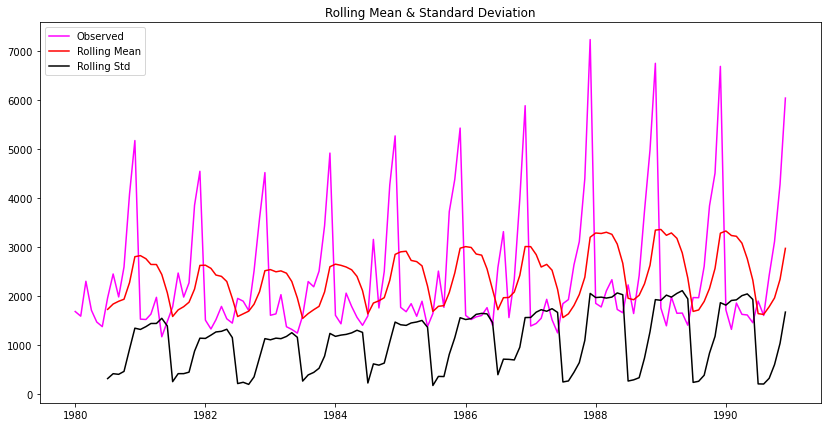

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [103]:
test_stationarity(train_spark['Sparkling'],'magenta')

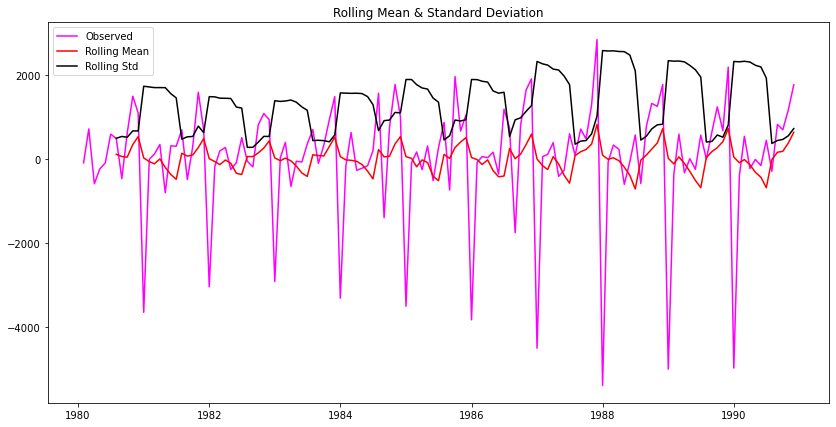

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [104]:
test_stationarity(train_spark['Sparkling'].diff().dropna(),'magenta')

### 1.6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

#### Model 8: Auto-ARIMA

In [105]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [106]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [107]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_spark['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064368172944
ARIMA(0, 1, 2) - AIC:2232.783097684661
ARIMA(1, 1, 0) - AIC:2268.5280606648653
ARIMA(1, 1, 1) - AIC:2235.013945358969
ARIMA(1, 1, 2) - AIC:2233.5976471190693
ARIMA(2, 1, 0) - AIC:2262.035600095461
ARIMA(2, 1, 1) - AIC:2232.36048987915
ARIMA(2, 1, 2) - AIC:2210.6181252975794


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [108]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.618125
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906437
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [109]:
auto_ARIMA = ARIMA(train_spark['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.640
Date:                Sun, 10 Oct 2021   AIC                           2210.618
Time:                        17:50:55   BIC                           2227.869
Sample:                    02-01-1980   HQIC                          2217.628
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5855      0.517     10.811      0.000       4.573       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


#### Predict on the Test Set using this model and evaluate the model


In [110]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_spark['Sparkling']))

In [111]:
rmse_arima_auto_model = metrics.mean_squared_error(test_spark['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print("For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is %3.3f" %(rmse_arima_auto_model))

For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is 1374.649


In [112]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_arima_auto_model]}
                           ,index=['Auto_ARIMA(2,1,2)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_9])
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   463.501976
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Auto_ARIMA(2,1,2)                              1374.649208

#### Model 9: Auto-SARIMA

In [113]:
SARIMA_train = train_spark.copy()
SARIMA_test = test_spark.copy()


In [114]:
## From ACF and PACF plots We can see that there is a seasonality of 12. We will run our auto SARIMA models by setting seasonality 12.\
import itertools
p = q = range(0,3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [115]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [116]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark = SARIMA_model_spark.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark.aic))
        SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.9824851895298
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.8626334678863
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574256222
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908186682
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.52896213077
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.5000981866608
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.9911553664474
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.656571982843
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.6639234230024
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:1399.1083846680262
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:1602.8594819023867
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.85502591968
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:1400.6709524137814
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:1428.2448811129439
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:1429.6168027963495
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:1402.63858884520

In [117]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head()

param       seasonal          AIC
47  (1, 1, 2)  (0, 1, 2, 12)  1382.347780
20  (0, 1, 2)  (0, 1, 2, 12)  1382.484254
50  (1, 1, 2)  (1, 1, 2, 12)  1384.137874
74  (2, 1, 2)  (0, 1, 2, 12)  1384.317618
23  (0, 1, 2)  (1, 1, 2, 12)  1384.398867

In [118]:
auto_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark = auto_SARIMA_spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Sun, 10 Oct 2021   AIC                           1382.348
Time:                                    17:51:24   BIC                           1397.479
Sample:                                         0   HQIC                          1388.455
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

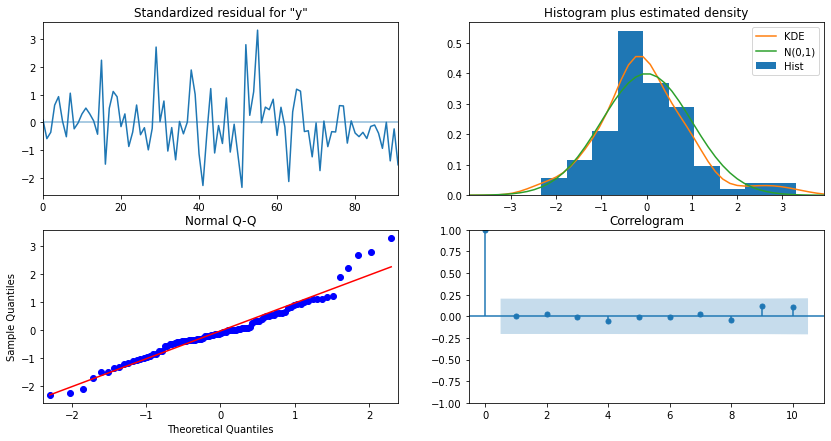

In [119]:
results_auto_SARIMA_spark.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [120]:
predicted_auto_SARIMA = results_auto_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']))

In [121]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1460.244606  412.922778     650.930832    2269.558380
1  1392.437154  429.721311     550.198861    2234.675447
2  1743.201676  430.065876     900.288047    2586.115305
3  1650.066915  433.930039     799.579668    2500.554163
4  1522.656006  434.242926     671.555512    2373.756501

In [122]:
# Extract the predicted and true values of our time series
spark_forecasted = predicted_auto_SARIMA.predicted_mean
SARIMA_test['spark_forecasted'] = predicted_auto_SARIMA.predicted_mean
SARIMA_test.head()

Sparkling  spark_forecasted
YearMonth                              
1991-01-01       1902       1460.244606
1991-02-01       2049       1392.437154
1991-03-01       1874       1743.201676
1991-04-01       1279       1650.066915
1991-05-01       1432       1522.656006

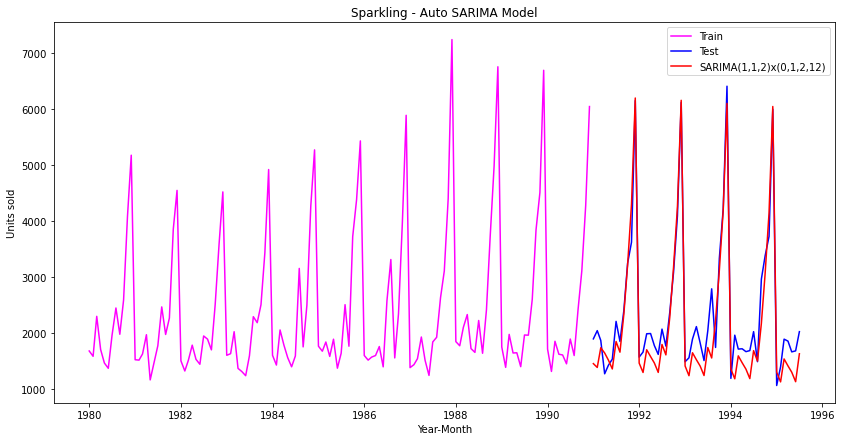

In [123]:
plt.plot(SARIMA_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(SARIMA_test['Sparkling'], label='Test', color = 'blue')

plt.plot(SARIMA_test['spark_forecasted'], color='red', label='SARIMA(1,1,2)x(0,1,2,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best');

In [124]:
rmse_SARIMA_auto_model = metrics.mean_squared_error(SARIMA_test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print("For Auto-SARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_auto_model))

For Auto-SARIMA Model forecast on the Test Data, RMSE is 382.577


In [125]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto_model]}
                           ,index=['Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_10])
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   463.501976
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Auto_ARIMA(2,1,2)                              1374.649208
Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)              382.576744

#### Model-10 AUTO SARIMA on Log Series

In [126]:
spark_log_train = np.log10(SARIMA_train['Sparkling'])

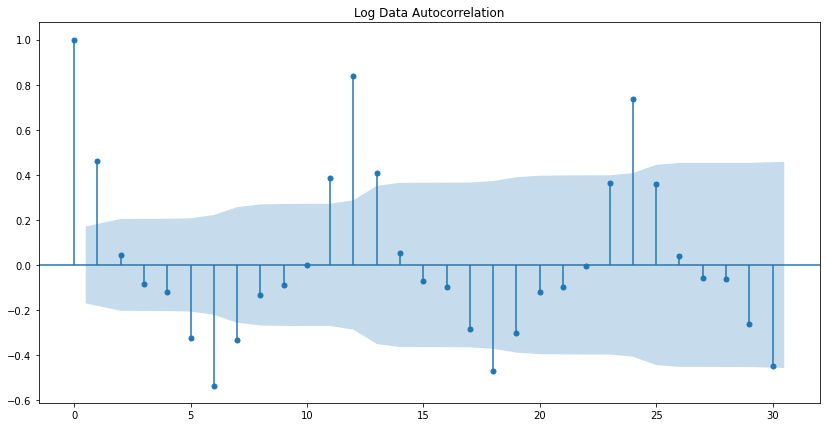

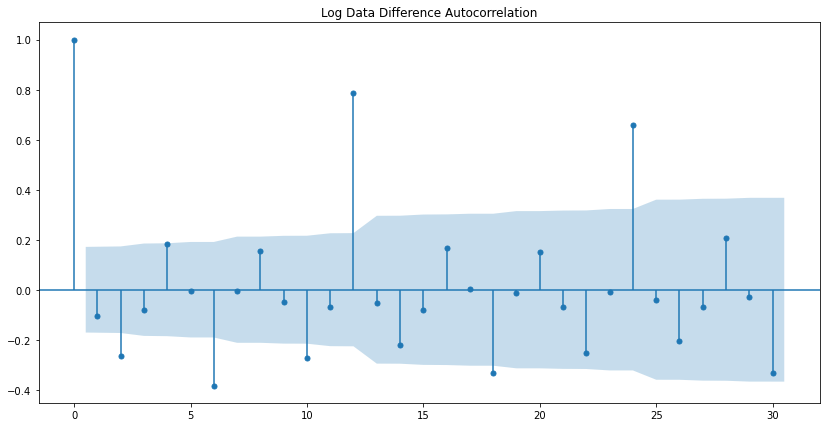

In [127]:
plot_acf(spark_log_train,lags=30,title='Log Data Autocorrelation')
plot_acf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

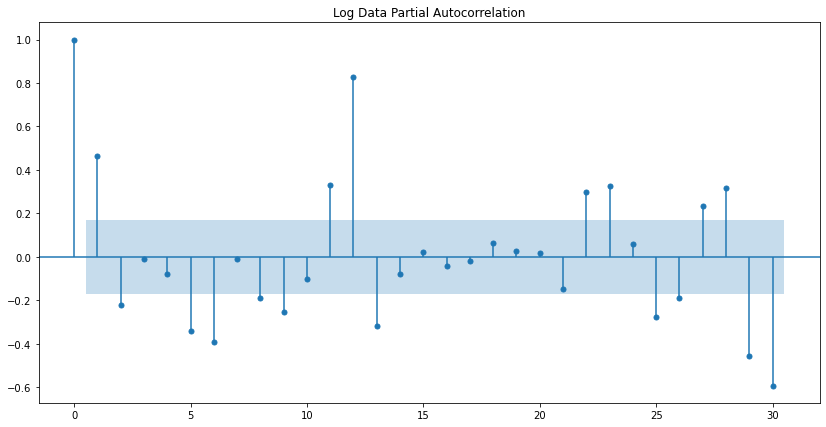

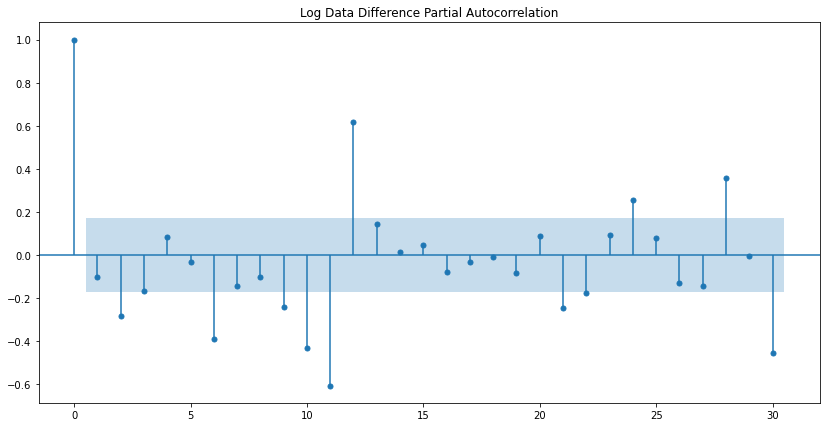

In [128]:
plot_pacf(spark_log_train,lags=30,title='Log Data Partial Autocorrelation')
plot_pacf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

In [129]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [130]:
SARIMA_AIC_spark_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [131]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,#train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark_log = SARIMA_model_spark_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark_log.aic))
        SARIMA_AIC_spark_log = SARIMA_AIC_spark_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark_log.aic}, ignore_index=True)



SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-57.22316326227245
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.81829469978435


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.0730421959754
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-209.91064502657775
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-205.210408392386


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-175.11378254817666
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-217.95527734168542
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-225.19047184481497


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inf

SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-197.41328525480495
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-200.40913589961724
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-196.67576097583475


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-173.2889257216336
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.15491722200656


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-199.3058031045664


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-198.5990029768502
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-177.2279754460743


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-175.2356670698166


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:-170.87276438798852
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:-57.79216893671338
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:-122.2326070710034


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:-138.43622717797666
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:-256.10294193200747


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:-253.58476311326046


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:-218.55896769145855
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:-261.54687691209926
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:-284.4720320052881


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:-244.46391651693375
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:-248.20817500749527


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:-247.011176479238


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:-217.72696374515448
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:-246.50642532809155

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:-250.67711475531053


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:-245.27764720407623


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:-220.4538988589821


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:-218.54809494215914


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:-211.89408871701528
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:-87.16430407898731


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:-153.63447341408806


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:-164.74663643062416
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:-259.9213973788912


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:-249.2089041276854


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:-218.5770533608103
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:-266.23765230648615


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:-281.56799591112156


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.86560298528812


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:-248.01090548588894


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:-242.46916598363708


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:-217.1158426268059


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:-247.04555359271149


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:-248.95185227794065


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:-241.81110098364078


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:-219.9626671934573


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:-217.9804467731508


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:-213.24054192940662
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:-56.62659251170257
SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.23327148100864


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.12305940964484
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:-224.95834567512208


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inf

SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:-223.1864509395369


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:-189.4787115652286
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:-228.63007876962686


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood opt

SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:-249.9994814035627
SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:-214.30021578662453
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:-213.8626342465541


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:-216.4848153406859


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:-188.43343876660867
SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:-213.36893551129836

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:-214.34261631337912


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:-215.10138455045288


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:-189.15129967392076


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:-187.38243007654896


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:-185.46983392640567
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:-85.03639777159137
SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:-149.5459038156497


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:-162.4093428606253
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:-259.55710855857


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:-252.28291583460515


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:-217.36138049004305
SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:-262.837850756972


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:-282.5173349736548


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:-242.95737518623443
SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:-245.2801205703026


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood opt

SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:-245.4759903347457
SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:-216.42210476256918


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:-243.35313359749483


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:-246.28354202346378


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:-243.8012253261686


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:-217.2388126346975


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:-215.26243509453403


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:-210.76635423363257
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:-87.29031318990724


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:-152.23666290050727


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:-162.99564173211206
SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:-257.9507060424042


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:-248.10669537552445


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:-217.83615133736924


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:-263.8747927382814


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:-279.6117248148369


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:-241.4019870519794


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:-244.06388165287652


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:-242.33302945374788


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:-216.13565473262057


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:-242.3733263056814


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:-246.0151964820281


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:-240.85867810782753


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:-216.27722299905574


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:-214.3903054039512


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:-212.14297698672397
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:-64.48764897324496
SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:-132.59657556906836


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:-146.20195912261664
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:-232.9842323915311


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inf

SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:-235.64046505235007


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:-200.49406062344286
SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:-235.30925363354663


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:-260.82997591075764


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:-225.63629544849172
SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:-222.18308543558746


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:-225.26416931160026


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:-199.46694324944542


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:-220.76970900870825


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inf

SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:-223.23027053204905
SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:-224.34361775764225


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:-198.80917326493858


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:-196.83111529867932


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:-194.94138801878648
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:-88.2794616616437


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:-154.38039840309926


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:-166.23127842721038
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:-257.7015035205757
SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:-250.37254791525152


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:-215.4664412176936
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:-257.7908746099531

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:-278.2882298180403


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:-241.07884904837852


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:-240.35091510864524


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:-243.47779358948213


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:-214.68151065688573


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:-238.95952989778658


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:-240.2004544868565


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:-242.0511465011803


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:-212.29556829299514


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:-210.3340736136386


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:-208.7963301936093
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-96.13368010051838


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-150.7150475839278


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:-161.94168191875286


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:-258.6037395496913


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:-246.59666014623684


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:-215.89805806577945


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:-261.3087475769702


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:-277.8803099282663


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.40945249853917


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:-239.3341207746853


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:-240.34985273274475


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:-214.22803218063322


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:-236.95645765514328


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inf

SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:-241.65360049709096
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:-238.10198192266836


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:-211.458495406257


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:-209.49382904878405


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:-210.14888155629845


In [132]:
SARIMA_AIC_spark_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
25   (0, 1, 1)  (1, 0, 1, 12) -284.472032
79   (1, 1, 1)  (1, 0, 1, 12) -282.517335
43   (0, 1, 2)  (1, 0, 1, 12) -281.567996
97   (1, 1, 2)  (1, 0, 1, 12) -279.611725
133  (2, 1, 1)  (1, 0, 1, 12) -278.288230

In [133]:
#(0, 1, 1)*(1, 0, 1, 12) AIC-284.472032
import statsmodels.api as sm

auto_SARIMA_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark_log = auto_SARIMA_spark_log.fit(maxiter=1000)
print(results_auto_SARIMA_spark_log.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 146.236
Date:                            Sun, 10 Oct 2021   AIC                           -284.472
Time:                                    17:52:29   BIC                           -273.423
Sample:                                01-01-1980   HQIC                          -279.986
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8966      0.045    -19.860      0.000      -0.985      -0.808
ar.S.L12       1.0112      0.020   

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


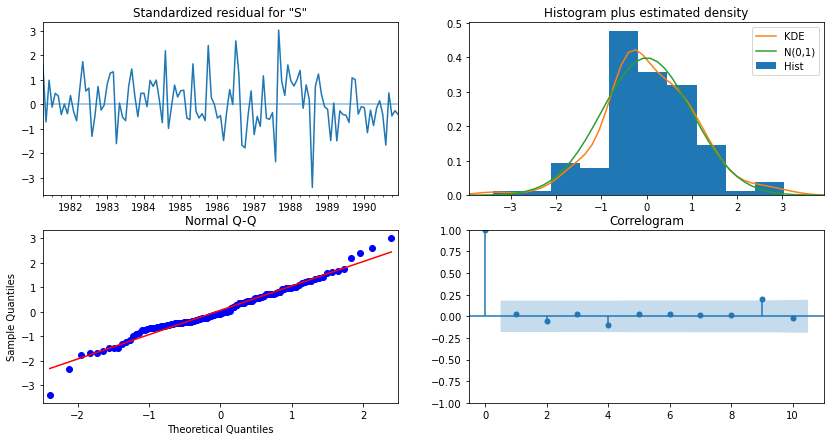

In [134]:
results_auto_SARIMA_spark_log.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [135]:
predicted_auto_SARIMA_spark_log = results_auto_SARIMA_spark_log.get_forecast(steps=len(SARIMA_test['Sparkling']))

In [136]:
predicted_auto_SARIMA_spark_log.summary_frame(alpha=0.05).head()

Sparkling       mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  3.212034  0.067110       3.080500       3.343567
1991-02-01  3.141305  0.067467       3.009073       3.273538
1991-03-01  3.256286  0.067823       3.123356       3.389216
1991-04-01  3.226730  0.068177       3.093106       3.360354
1991-05-01  3.195789  0.068529       3.061475       3.330103

In [137]:
spark_forecasted_log = predicted_auto_SARIMA_spark_log.predicted_mean
SARIMA_test['spark_forecasted_log'] = np.power(10, predicted_auto_SARIMA_spark_log.predicted_mean)
SARIMA_test.head()

Sparkling  spark_forecasted  spark_forecasted_log
YearMonth                                                    
1991-01-01       1902       1460.244606           1629.422315
1991-02-01       2049       1392.437154           1384.539794
1991-03-01       1874       1743.201676           1804.205174
1991-04-01       1279       1650.066915           1685.505658
1991-05-01       1432       1522.656006           1569.600797

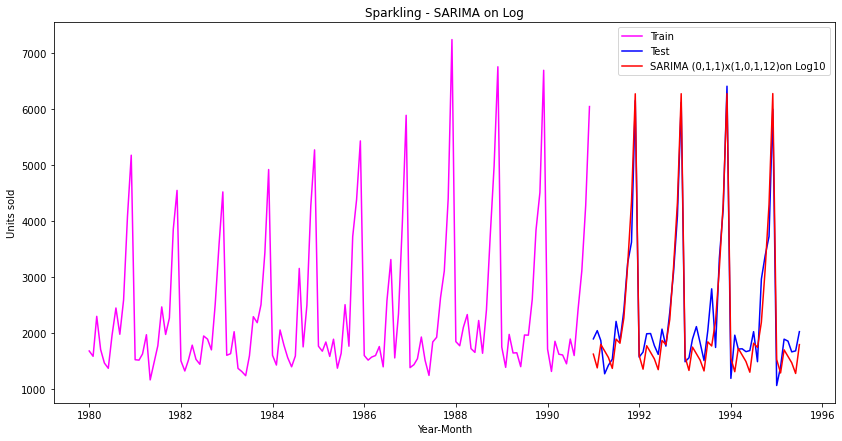

In [138]:
plt.plot(SARIMA_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(SARIMA_test['Sparkling'], label='Test', color = 'blue')

plt.plot(SARIMA_test['spark_forecasted_log'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - SARIMA on Log')
plt.legend(loc='best');

In [139]:
rmse_SARIMA_auto_model_log = metrics.mean_squared_error(SARIMA_test['Sparkling'],SARIMA_test['spark_forecasted_log'],squared=False)
print("For Auto-SARIMA_log Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_auto_model_log))

For Auto-SARIMA_log Model forecast on the Test Data, RMSE is 336.786


In [140]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto_model_log]}
                           ,index=['Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_11])
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   463.501976
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Auto_ARIMA(2,1,2)                              1374.649208
Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)              382.576744
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          336.786145

### 1.7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Model-11 Manual ARIMA

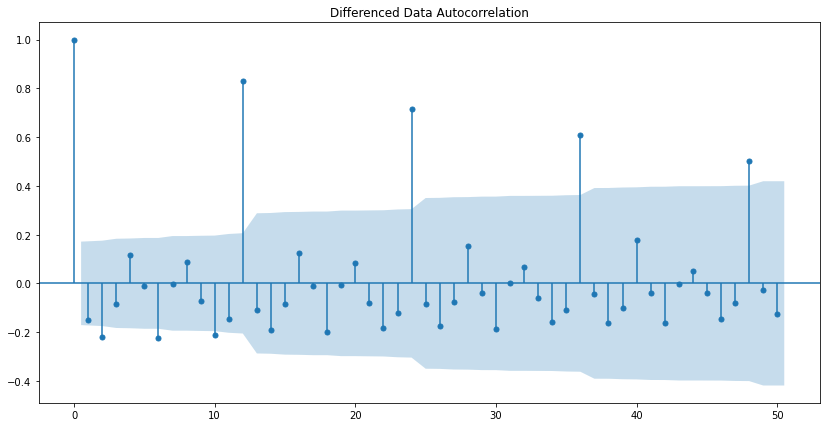

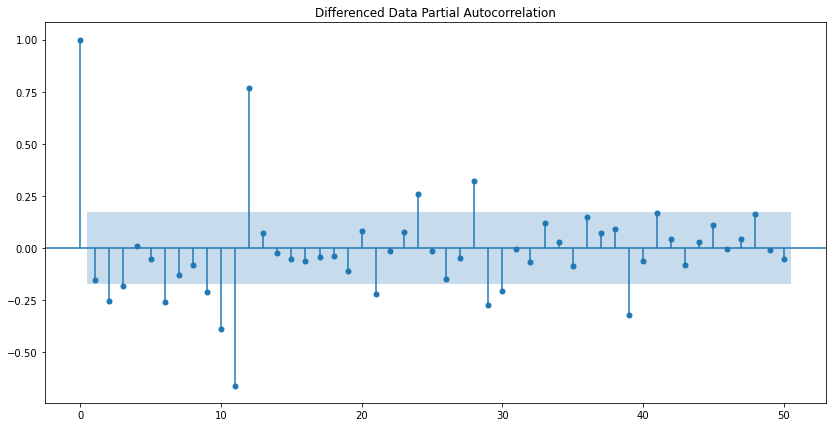

In [141]:
plot_acf(train_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [142]:
manual_ARIMA = ARIMA(train_spark['Sparkling'].astype('float64'), order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.791
Method:                           css   S.D. of innovations           1377.911
Date:                Sun, 10 Oct 2021   AIC                           2269.583
Time:                        17:52:31   BIC                           2275.333
Sample:                    02-01-1980   HQIC                          2271.919
                         - 12-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2901    120.389      0.277      0.782    -202.667     269.248


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


#### Predict on the Test Set using this model and evaluate the model.

In [143]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_spark['Sparkling']))
rmse_arima_manual_model = metrics.mean_squared_error(test_spark['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print("For Manual-ARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_arima_manual_model))

For Manual-ARIMA Model forecast on the Test Data, RMSE is 4779.154


In [144]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse_arima_manual_model]}
                           ,index=['Manual_ARIMA(0,1,0)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_12])
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   463.501976
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Auto_ARIMA(2,1,2)                              1374.649208
Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)              382.576744
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          336.786145
Manual_ARIMA(0,1,0)                            4779.154299

#### Model-12 Manual SARIMA

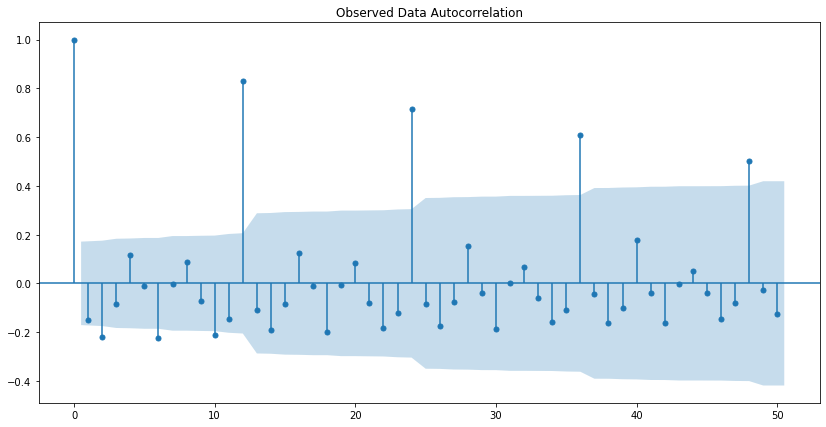

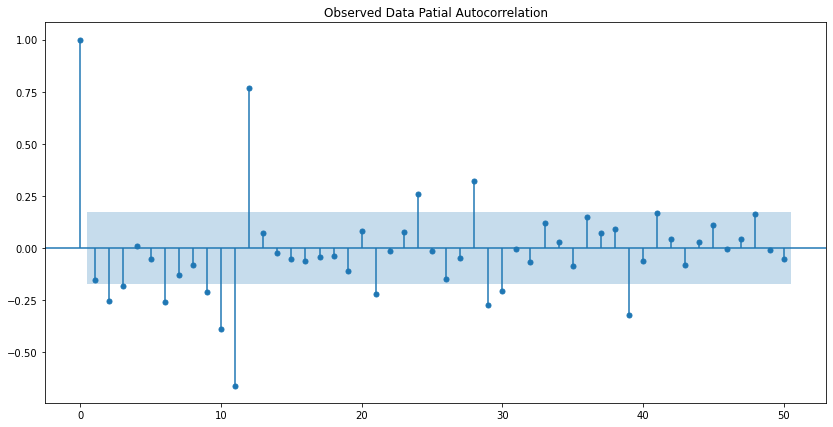

In [145]:
plot_acf(SARIMA_train['Sparkling'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(SARIMA_train['Sparkling'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

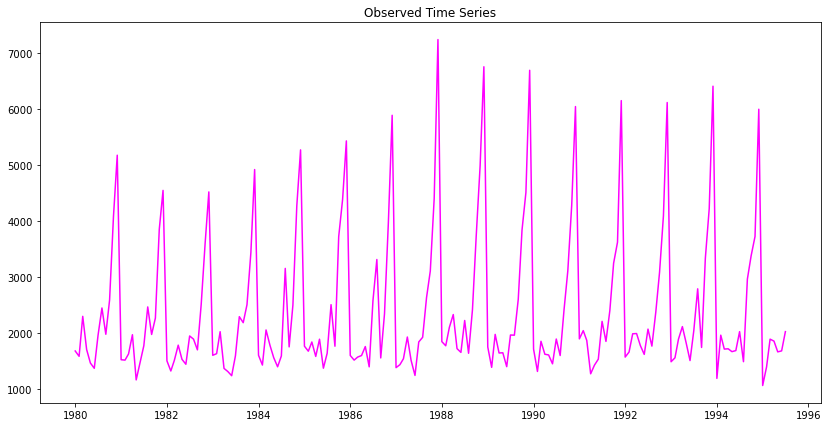

In [146]:
plt.plot(spark['Sparkling'], color = 'magenta')
plt.title ('Observed Time Series');

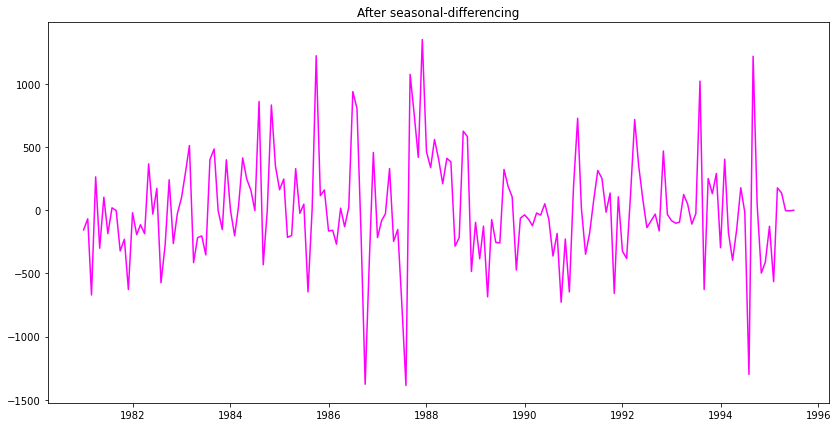

In [147]:
plt.plot(spark['Sparkling'].diff(12).dropna(), color = 'magenta')
plt.title ('After seasonal-differencing');

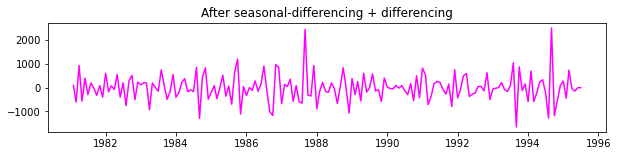

In [148]:
plt.figure(figsize=(10,2))
plt.plot((spark['Sparkling'].diff(12).dropna()).diff().dropna(),  color = 'magenta')
plt.title ('After seasonal-differencing + differencing');

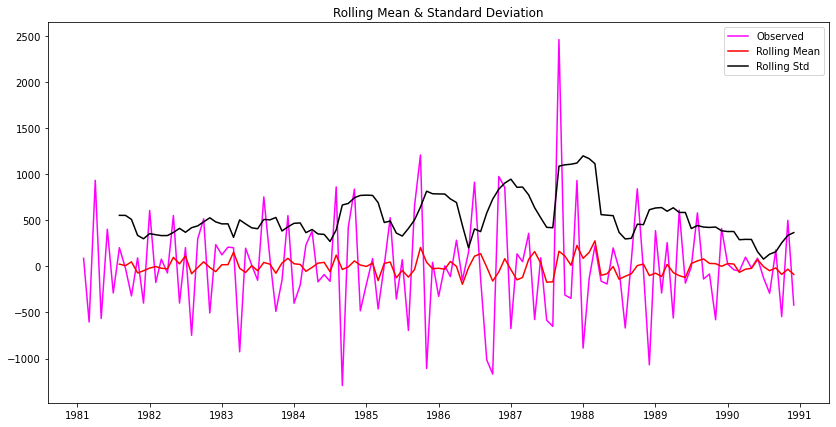

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [149]:
#### Check the stationarity of the above series before fitting the SARIMA model.

test_stationarity((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna(), 'magenta')

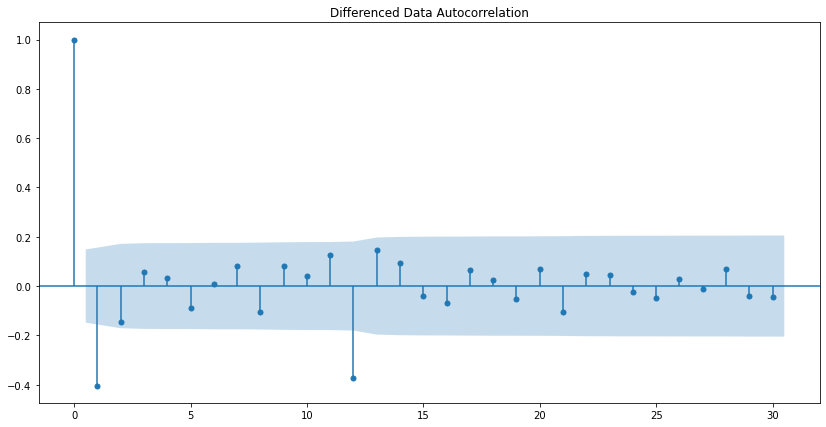

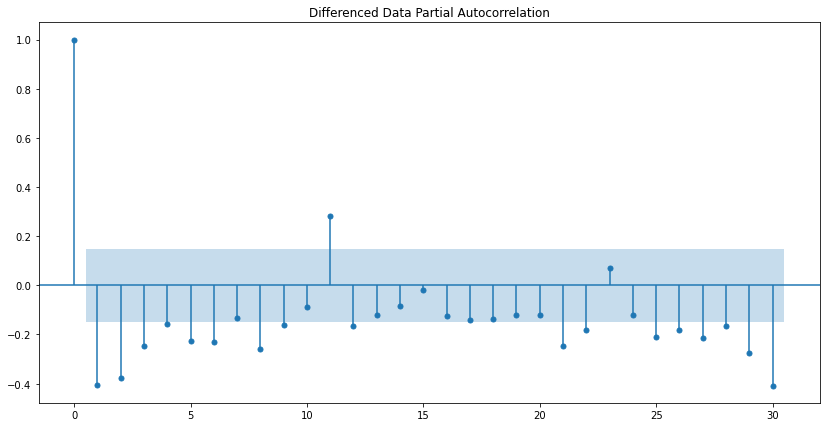

In [150]:
plot_acf((spark['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plot_pacf((spark['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Partial Autocorrelation');

In [151]:
#(3,1,1)*(1,1,2,12)
import statsmodels.api as sm

manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -693.697
Date:                                 Sun, 10 Oct 2021   AIC                           1403.394
Time:                                         17:52:33   BIC                           1423.654
Sample:                                              0   HQIC                          1411.574
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0

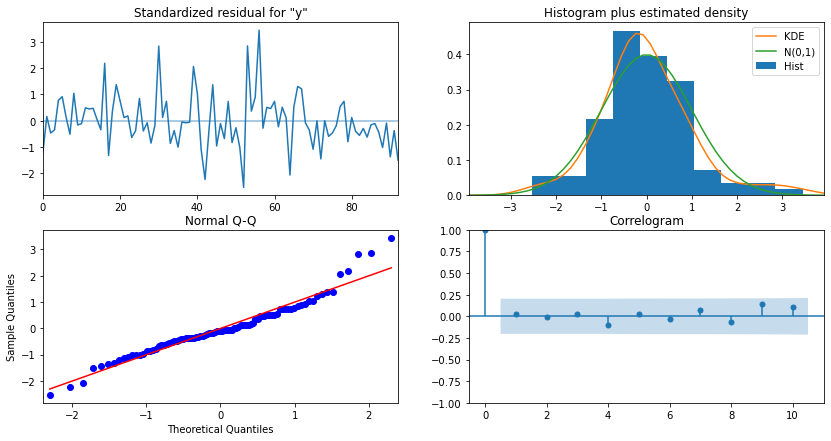

In [152]:
results_manual_SARIMA_spark.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [153]:
predicted_manual_SARIMA = results_manual_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']))

predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1579.911905  416.594664     763.401368    2396.422441
1  1419.157665  429.114142     578.109401    2260.205928
2  1868.147794  429.104782    1027.117875    2709.177713
3  1731.475272  430.973350     886.783027    2576.167517
4  1659.825845  431.906291     813.305070    2506.346620

In [154]:
manual_spark_forecasted = predicted_manual_SARIMA.predicted_mean
SARIMA_test['manual_spark_forecasted'] = predicted_manual_SARIMA.predicted_mean
SARIMA_test.head()

Sparkling  spark_forecasted  spark_forecasted_log  \
YearMonth                                                       
1991-01-01       1902       1460.244606           1629.422315   
1991-02-01       2049       1392.437154           1384.539794   
1991-03-01       1874       1743.201676           1804.205174   
1991-04-01       1279       1650.066915           1685.505658   
1991-05-01       1432       1522.656006           1569.600797   

            manual_spark_forecasted  
YearMonth                            
1991-01-01              1579.911905  
1991-02-01              1419.157665  
1991-03-01              1868.147794  
1991-04-01              1731.475272  
1991-05-01              1659.825845

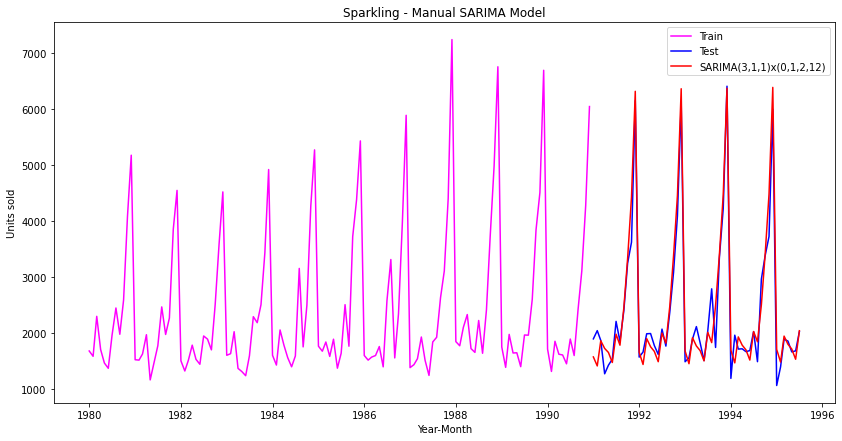

In [155]:
plt.plot(SARIMA_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(SARIMA_test['Sparkling'], label='Test', color = 'blue')

plt.plot(SARIMA_test['manual_spark_forecasted'], color='red', label='SARIMA(3,1,1)x(0,1,2,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Manual SARIMA Model')
plt.legend(loc='best');

In [156]:
rmse_SARIMA_manual_model = metrics.mean_squared_error(SARIMA_test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
print("For Manual-SARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_manual_model))

For Manual-SARIMA Model forecast on the Test Data, RMSE is 324.108


In [157]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_manual_model]}
                           ,index=['Manual_SARIMA#(3,1,1)*(1,1,2,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_13])
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   463.501976
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Auto_ARIMA(2,1,2)                              1374.649208
Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)              382.576744
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          336.786145
Manual_ARIMA(0,1,0)                            4779.154299
Manual_SARIMA#(3,1,1)*(1,1,2,12)                324.107744

### 1.8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [158]:
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   463.501976
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Auto_ARIMA(2,1,2)                              1374.649208
Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)              382.576744
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          336.786145
Manual_ARIMA(0,1,0)                            4779.154299
Manual_SARIMA#(3,1,1)*(1,1,2,12)                324.107744

### 1.9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [159]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Manual_SARIMA#(3,1,1)*(1,1,2,12)                324.107744
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          336.786145
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)              382.576744
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   463.501976
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
SimpleAverage                                  1275.081804
6 point TMA                                    1283.927428
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.0496, SES Optimized                    1316.034674
9 point TMA                                    1346.278315
Auto_ARIMA(2,1,2)                              1374.649208
RegressionOnTime                               1389.135175
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
NaiveModel                                     3864.279352
Manual_ARIMA(0,1,0)                            4779.154299

#### Build model on the entire dataset using best optimum model: Manual_SARIMA(3,1,1)(1,1,2,12) or Auto_SARIMA_log(0, 1, 1)(1, 0, 1, 12)

#### Building a Manual_SARIMA on the entire dataset

In [160]:
manual_SARIMA_spark_Full = sm.tsa.statespace.SARIMAX(spark['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark_Full = manual_SARIMA_spark_Full.fit(maxiter=1000)
print(results_manual_SARIMA_spark_Full.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1094.342
Date:                                 Sun, 10 Oct 2021   AIC                           2204.685
Time:                                         17:52:35   BIC                           2228.662
Sample:                                              0   HQIC                          2214.427
                                                 - 187                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1159      0.086      1.349      0.177      -0.052       0

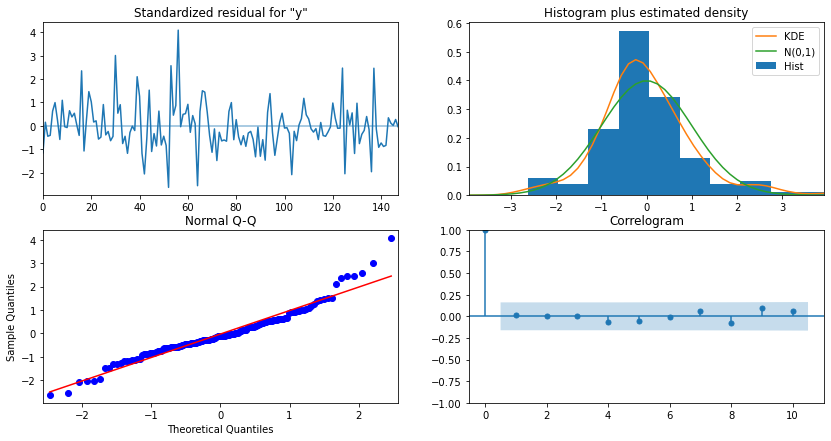

In [161]:
results_manual_SARIMA_spark_Full.plot_diagnostics()
plt.show()

#### Forecast for the next 12 months using this model

In [162]:
Forecast_manual_SARIMA = results_manual_SARIMA_spark_Full.get_forecast(steps=12)

In [163]:
rmse_spark_Full = metrics.mean_squared_error(spark['Sparkling'],results_manual_SARIMA_spark_Full.fittedvalues,squared=False)
print("For Manual-SARIMA Model forecast on the Entire Data, RMSE is %3.3f" %(rmse_spark_Full))

For Manual-SARIMA Model forecast on the Entire Data, RMSE is 547.591


In [164]:
Forecast_manual_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1870.888561  390.915204    1104.708839    2637.068282
1  2489.623620  395.293861    1714.861889    3264.385351
2  3299.650018  395.322890    2524.831392    4074.468644
3  3934.056600  396.282381    3157.357405    4710.755795
4  6135.396022  396.768730    5357.743601    6913.048443

In [165]:
Forecast_manual_SARIMA_date = Forecast_manual_SARIMA.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

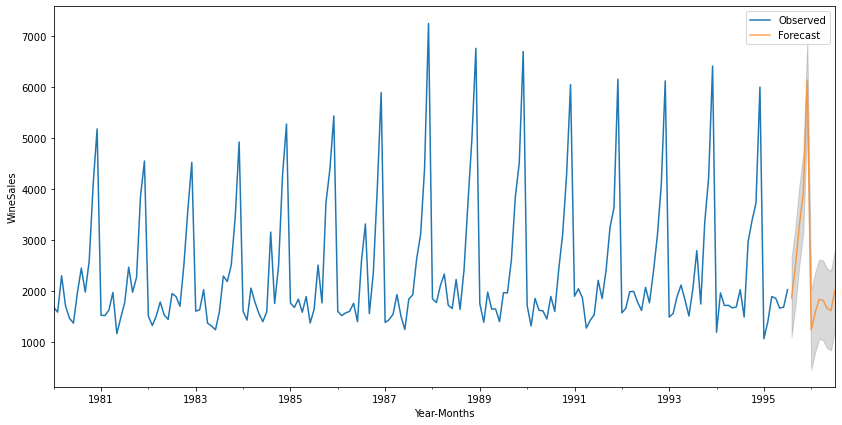

In [166]:
# plot the forecast along with the confidence band

axis = spark['Sparkling'].plot(label='Observed')
Forecast_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(Forecast_manual_SARIMA_date.index, Forecast_manual_SARIMA_date['mean_ci_lower'], 
                  Forecast_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('WineSales')
plt.legend(loc='best')
plt.show()

### 1.10 Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

In [167]:
Forecast_manual_SARIMA_date['mean'].sum()

29534.252219418486

In [168]:

Forecast_manual_SARIMA_date['mean'].describe()

count      12.000000
mean     2461.187685
std      1391.118211
min      1245.727169
25%      1656.647689
50%      1855.796906
75%      2692.130219
max      6135.396022
Name: mean, dtype: float64

In [169]:
Forecast_manual_SARIMA_date['mean']

1995-08-31    1870.888561
1995-09-30    2489.623620
1995-10-31    3299.650018
1995-11-30    3934.056600
1995-12-31    6135.396022
1996-01-31    1245.727169
1996-02-29    1584.643741
1996-03-31    1840.705251
1996-04-30    1823.847822
1996-05-31    1668.706091
1996-06-30    1620.472484
1996-07-31    2020.534842
Freq: M, Name: mean, dtype: float64

* **The model forecasts sale of 29535 units of Sparkling wine in 12 months into future. Which is an average sale of 2462 units per month.**
* **The seasonal sale in December 1995 will hit a maximum of 6136 units, before it drops to the lowest sale in January 1996; at 1246 units.**
* **The wine company is recommended to ramp up their procurement and production line in accordance with the above forecasts for the third quarter of 1995 (October, November and December), which is a total of 13,370 units of sparkling wine is expected to be sold.**
* **The forecast also indicates that the year-on-year sale of sparkling wine is not showing an upward trend. The winery must adopt innovative marketing skills to improve the sale compared to previous years.**

## Dataset 2 - Rose:
### 2.1 Read the data as an appropriate Time Series data and plot the data.

#### Method 1

In [170]:
df_rose = pd.read_csv('Rose.csv')
df_rose.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [171]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [172]:
df_rose['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_rose.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [173]:
df_rose.set_index('Time_Stamp',inplace=True)
df_rose.drop(['YearMonth'], axis=1, inplace=True)
df_rose.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

#### Method-2

In [174]:
rose = pd.read_csv('Rose.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)
printmd('**View the top 5 rows of Rose dataset :**')
rose.head()

**View the top 5 rows of Rose dataset :**

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

In [175]:
printmd('**View the bottom 5 rows of Rose dataset :**')
rose.tail()

**View the bottom 5 rows of Rose dataset :**

YearMonth
1995-03-01    45.0
1995-04-01    52.0
1995-05-01    28.0
1995-06-01    40.0
1995-07-01    62.0
Name: Rose, dtype: float64

#### Check for Null values

In [176]:
printmd('**The number of Null values in Rose dataset:**')
print(rose.isnull().sum())
printmd('**The datetime stamps for which the Time Series Data in Rose is not present:**')
nan_list = list(rose[rose.isnull() == True].index)
rose[rose.isnull() == True]

**The number of Null values in Rose dataset:**

2


**The datetime stamps for which the Time Series Data in Rose is not present:**

YearMonth
1994-07-01   NaN
1994-08-01   NaN
Name: Rose, dtype: float64

#### Plotting the Rose Time Series to understand the behaviour of the data.
**Note: The Rose Time Series has two Null values for time stamp: '1994-07-01' and '1994-08-01'.**

**Sales Data of Rose Wines:**

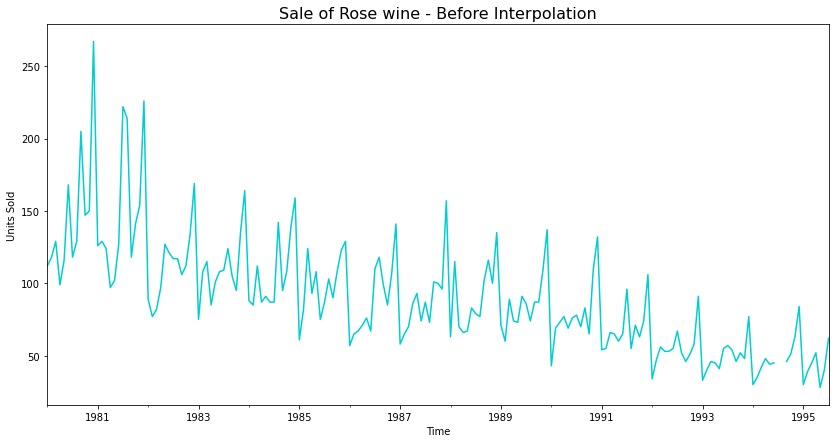

In [177]:
printmd('**Sales Data of Rose Wines:**')
rose.plot(color='darkturquoise')
plt.title('Sale of Rose wine - Before Interpolation', fontsize =16)
plt.xlabel('Time')
plt.ylabel('Units Sold')
plt.show()

#### Imputing the Null Values

In [178]:
rose = rose.interpolate(method = 'polynomial', order = 2)
printmd('**The new interpolated values of the previously missing values:**')
rose[rose.index.isin(nan_list) == True]

**The new interpolated values of the previously missing values:**

YearMonth
1994-07-01    45.364189
1994-08-01    44.279246
Name: Rose, dtype: float64

**Sales Data of Rose Wines after missing value treatment:**

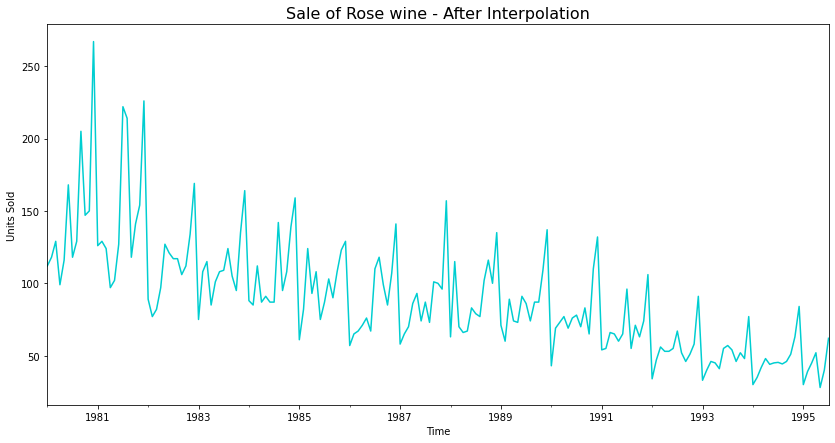

In [179]:
printmd('**Sales Data of Rose Wines after missing value treatment:**')
rose.plot(color='darkturquoise')
plt.title('Sale of Rose wine - After Interpolation', fontsize =16)
plt.xlabel('Time')
plt.ylabel('Units Sold')
plt.show()

### 2.2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Basic measures of descriptive statistics

In [180]:
printmd('**Data Description for Rose Dataset:**')
rose.describe()

**Data Description for Rose Dataset:**

count    187.000000
mean      89.907184
std       39.246679
min       28.000000
25%       62.500000
50%       85.000000
75%      111.000000
max      267.000000
Name: Rose, dtype: float64

#### Plot a boxplot to understand the spread of sales across different years and within different months across years
#### Yearly

**Yearly Boxplot for Rose Dataset:**

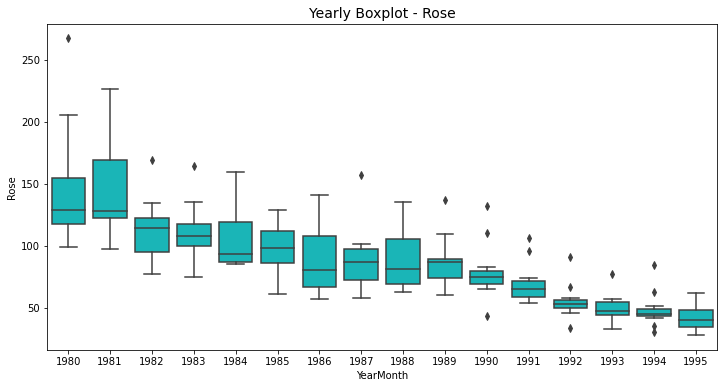

In [181]:
printmd('**Yearly Boxplot for Rose Dataset:**')
plt.figure(figsize = (12, 6))
sns.boxplot(x = rose.index.year,y = rose, color = 'darkturquoise')
plt.title('Yearly Boxplot - Rose', fontsize=14)
plt.show()

#### Monthly

**Monthly Boxplot for all the years for Rose Dataset:**

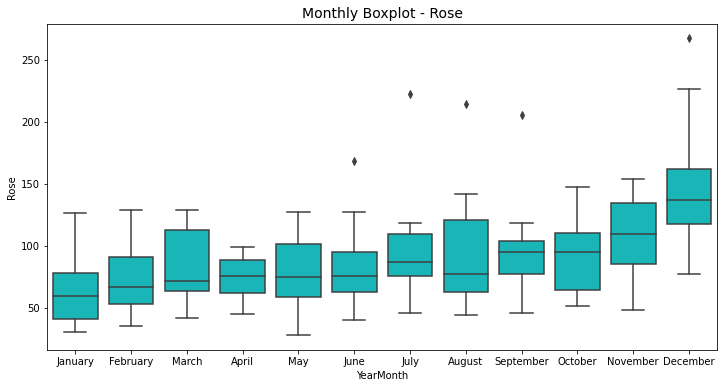

In [182]:
printmd('**Monthly Boxplot for all the years for Rose Dataset:**')
plt.figure(figsize = (12, 6))
sns.boxplot(x = rose.index.month_name(),y = rose, color='darkturquoise')
plt.title('Monthly Boxplot - Rose', fontsize=14)
plt.show()

#### Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

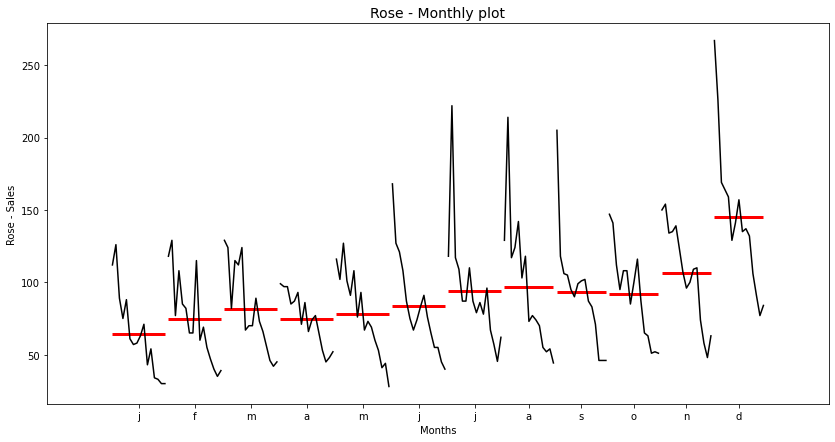

In [183]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(rose,ylabel='Rose - Sales')
plt.xlabel('Months')
plt.title('Rose - Monthly plot', fontsize = 14)
plt.show()

#### Plot graph of monthly Wine sales across years:

In [184]:
monthly_sales_across_years_rose = pd.pivot_table(pd.DataFrame(rose), columns = rose.index.month, 
                                                      index = rose.index.year)
monthly_sales_across_years_rose

Rose                                                            \
YearMonth     1      2      3     4      5      6           7           8    
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.364189   44.279246   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

                                       
YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

**Monthly Wine sales across years for Rose:**

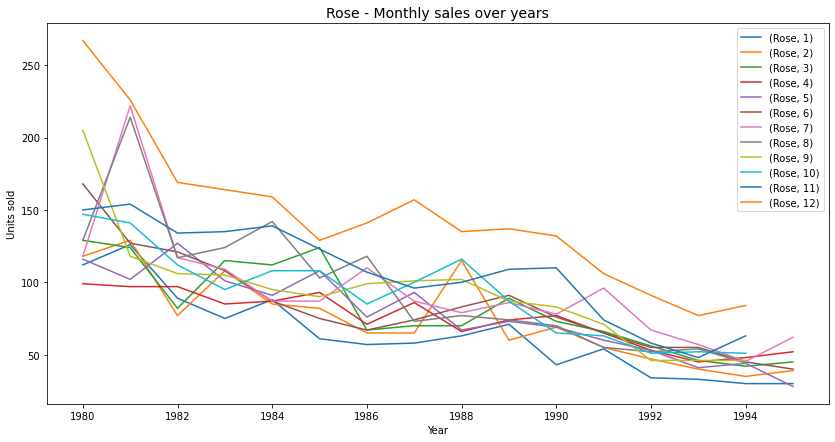

In [185]:
printmd('**Monthly Wine sales across years for Rose:**')
monthly_sales_across_years_rose.plot()
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Rose - Monthly sales over years', fontsize=14)
plt.show()

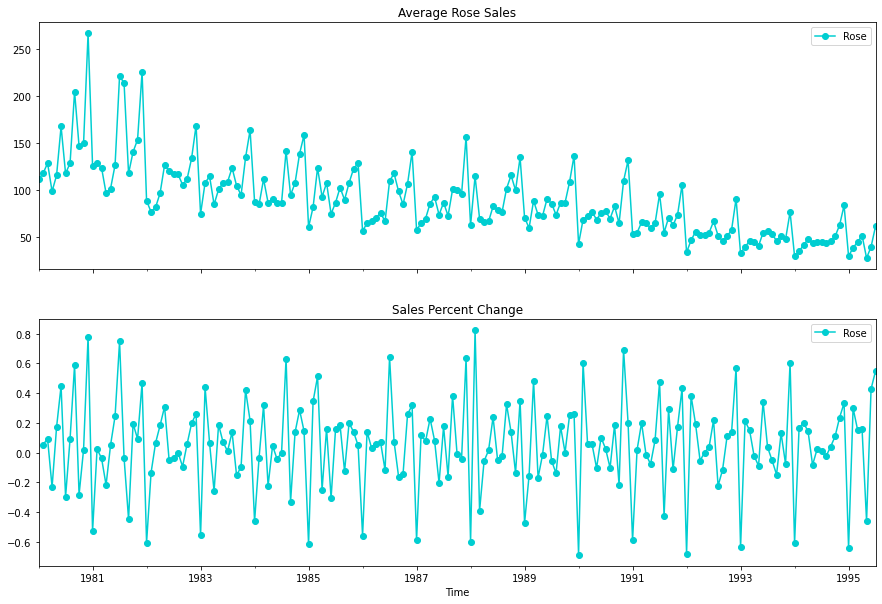

In [186]:
# group by date and get average Rose sales and precent change
average_rose    = rose.groupby(rose.index).mean()
pct_change_rose = rose.groupby(rose.index).sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,10))
# plot average Rose sales over time(year-month)
ax1 = average_rose.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales", color = 'darkturquoise')
# plot precent change for Sales over time(year-month)
ax2 = pct_change_rose.plot(legend=True,ax=axis2,marker='o',color='darkturquoise',title="Sales Percent Change")
plt.xlabel('Time')
plt.legend(loc='best')
plt.show()

#### Decompose the Time Series and plot the different components.

In [187]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

**Decomposition of Rose Time Series with multiplicative Seasonality:**

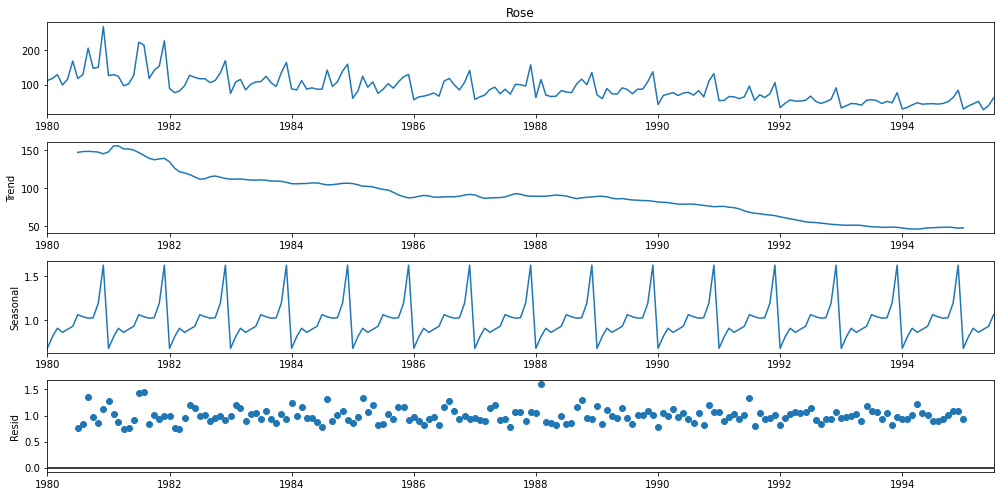

In [188]:
printmd('**Decomposition of Rose Time Series with multiplicative Seasonality:**')
decomposition_mul = seasonal_decompose(rose,model='multiplicative')
decomposition_mul.plot();

### 2.3. Split the data into training and test. The test data should start in 1991.

In [189]:
rose = pd.DataFrame(rose)
train_rose = rose[rose.index.year < 1991]
test_rose = rose[rose.index.year >= 1991]

In [190]:
print('Length of Train Data:', len(train_rose))
print('Length of Test Data:', len(test_rose))

Length of Train Data: 132
Length of Test Data: 55


In [191]:
print('First few rows of Training Data:','\n',train_rose.head(),'\n')
print('Last few rows of Training Data:','\n',train_rose.tail(),'\n')
print('First few rows of Test Data:','\n',test_rose.head(),'\n')
print('Last few rows of Test Data:','\n',test_rose.tail(),'\n')

First few rows of Training Data: 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last few rows of Training Data: 
              Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0 

First few rows of Test Data: 
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 

Last few rows of Test Data: 
             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



In [192]:
print(train_rose.shape)
print(test_rose.shape)

(132, 1)
(55, 1)


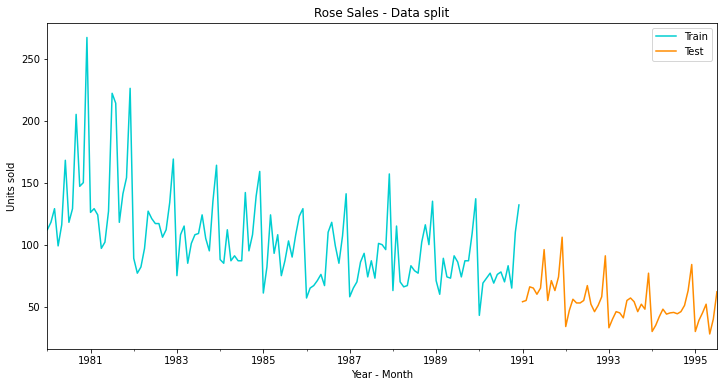

In [193]:
plt.figure(figsize = (12, 6))
train_rose['Rose'].plot(label = 'Train',color='darkturquoise')
test_rose['Rose'].plot(label = 'Test',color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose Sales - Data split', fontsize = 12)
plt.show;

### 2.4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

#### Model 1: Linear Regression

In [194]:
train_time = [i+1 for i in range(len(train_rose))]
test_time = [i+133 for i in range(len(test_rose))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [195]:
LinearRegression_train_rose = train_rose.copy()
LinearRegression_test_rose = test_rose.copy()

In [196]:
LinearRegression_train_rose['time'] = train_time
LinearRegression_test_rose['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train_rose.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train_rose.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test_rose.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test_rose.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [197]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train_rose[['time']],LinearRegression_train_rose['Rose'].values)

LinearRegression()

In [198]:
LinearRegression_train_rose['RegOnTime_rose'] = lr.predict(LinearRegression_train_rose[['time']])
LinearRegression_test_rose['RegOnTime_rose'] = lr.predict(LinearRegression_test_rose[['time']])

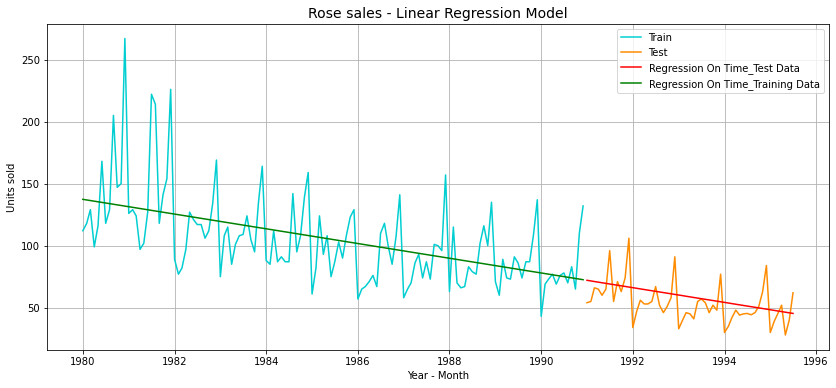

In [199]:
plt.figure(figsize=(14,6))
plt.plot( train_rose['Rose'], label='Train',color = 'darkturquoise')
plt.plot(test_rose['Rose'], label='Test',color = 'darkorange')
plt.plot(LinearRegression_test_rose['RegOnTime_rose'], label='Regression On Time_Test Data',color = 'red')
plt.plot(LinearRegression_train_rose['RegOnTime_rose'], label='Regression On Time_Training Data',color = 'green')
plt.title('Rose sales - Linear Regression Model', fontsize = 14)
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.grid();

#### Model Evaluation - RMSE

In [200]:
rmse_reg = np.sqrt(metrics.mean_squared_error(test_rose['Rose'],LinearRegression_test_rose['RegOnTime_rose']))
print("For Regression On Time forecast on the Test Data, RMSE is %3.3f " %(rmse_reg))

For Regression On Time forecast on the Test Data, RMSE is 15.278 


In [201]:
rose_resultsDf = pd.DataFrame({'Test RMSE': [rmse_reg]},index=['RegressionOnTime'])
rose_resultsDf

Test RMSE
RegressionOnTime  15.278369

#### Model 2: Naive forecast

In [202]:
NaiveModel_train = train_rose.copy()
NaiveModel_test = test_rose.copy()

In [203]:
NaiveModel_train['rose_naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NaiveModel_train['rose_naive'].head()

YearMonth
1980-01-01    132.0
1980-02-01    132.0
1980-03-01    132.0
1980-04-01    132.0
1980-05-01    132.0
Name: rose_naive, dtype: float64

In [204]:
NaiveModel_test['rose_naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NaiveModel_test['rose_naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: rose_naive, dtype: float64

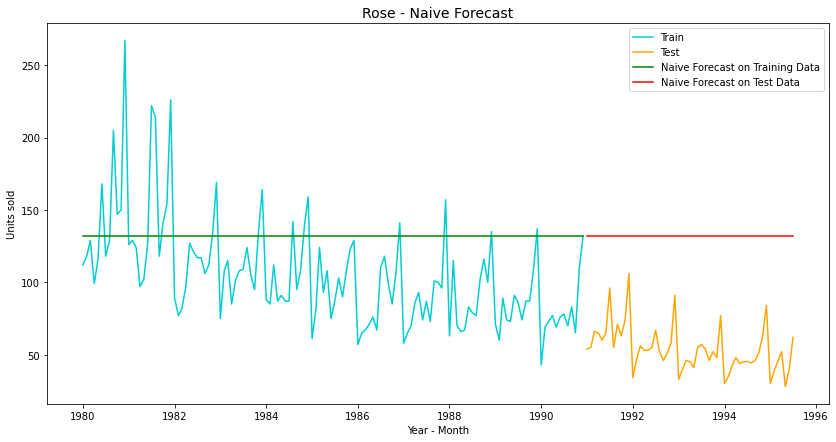

In [205]:
plt.plot(NaiveModel_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(test_rose['Rose'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['rose_naive'], label='Naive Forecast on Training Data', color = 'green')
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - Naive Forecast", fontsize = 14)
plt.show();

#### Model Evauation - RMSE

In [206]:
rmse_naive = metrics.mean_squared_error(test_rose['Rose'],NaiveModel_test['rose_naive'],squared=False)
print("For Naive forecast on the Test Data, RMSE is %3.3f " %(rmse_naive))

For Naive forecast on the Test Data, RMSE is 79.746 


In [207]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_naive]},index=['NaiveModel'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

Test RMSE
RegressionOnTime  15.278369
NaiveModel        79.745697

#### Model 3: Simple Average

In [208]:
SimpleAverage_train = train_rose.copy()
SimpleAverage_test = test_rose.copy()

In [209]:
SimpleAverage_train['rose_mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_train['rose_mean_forecast'].head()

YearMonth
1980-01-01    104.939394
1980-02-01    104.939394
1980-03-01    104.939394
1980-04-01    104.939394
1980-05-01    104.939394
Name: rose_mean_forecast, dtype: float64

In [210]:
SimpleAverage_test['rose_mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_test['rose_mean_forecast'].head()

YearMonth
1991-01-01    104.939394
1991-02-01    104.939394
1991-03-01    104.939394
1991-04-01    104.939394
1991-05-01    104.939394
Name: rose_mean_forecast, dtype: float64

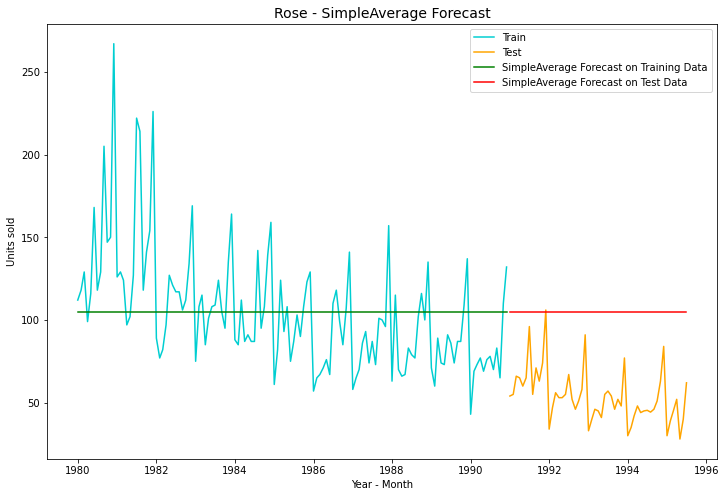

In [211]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(test_rose['Rose'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'green')
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - SimpleAverage Forecast", fontsize=14)
plt.show()

#### Model Evaluation - RMSE

In [212]:
rmse_simple_avg = metrics.mean_squared_error(test_rose['Rose'],SimpleAverage_test['rose_mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data, RMSE is %3.3f " %(rmse_simple_avg))

For Simple Average forecast on the Test Data, RMSE is 53.488 


In [213]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_simple_avg]},index=['SimpleAverage'])
rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_3])
rose_resultsDf

Test RMSE
RegressionOnTime  15.278369
NaiveModel        79.745697
SimpleAverage     53.488233

#### Model 4: Moving Average

In [214]:
MovingAverage = rose.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [215]:
MovingAverage['Rose_Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Rose_Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Rose_Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Rose_Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Rose_Trailing_2  Rose_Trailing_4  Rose_Trailing_6  \
YearMonth                                                              
1980-01-01  112.0              NaN              NaN              NaN   
1980-02-01  118.0            115.0              NaN              NaN   
1980-03-01  129.0            123.5              NaN              NaN   
1980-04-01   99.0            114.0            114.5              NaN   
1980-05-01  116.0            107.5            115.5              NaN   

            Rose_Trailing_9  
YearMonth                    
1980-01-01              NaN  
1980-02-01              NaN  
1980-03-01              NaN  
1980-04-01              NaN  
1980-05-01              NaN

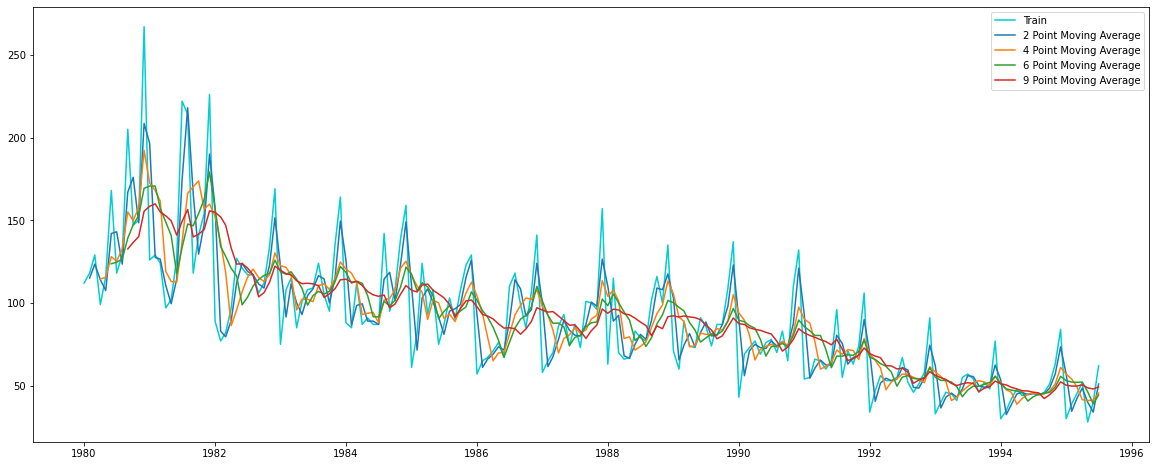

In [216]:
plt.figure(figsize=(20,8))
plt.plot(MovingAverage['Rose'], label='Train', color='darkturquoise')
plt.plot(MovingAverage['Rose_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best');

In [217]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

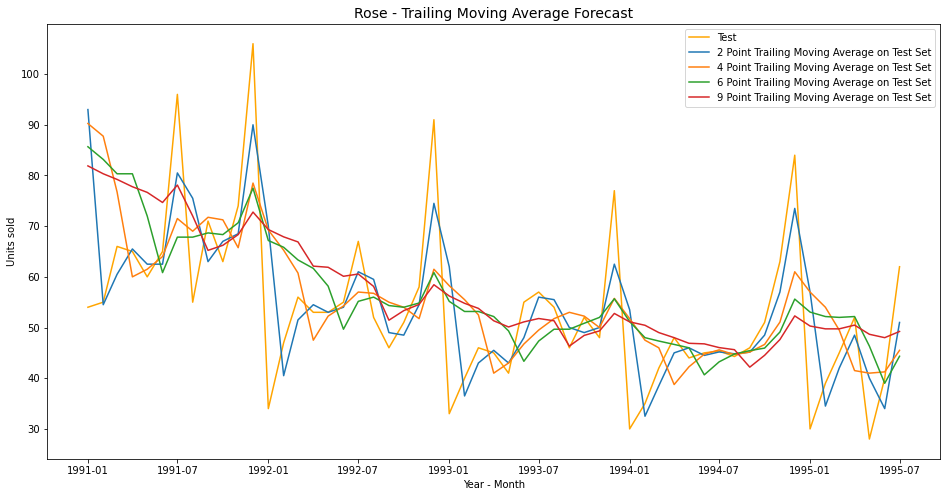

In [218]:
## Plotting on Test data

plt.figure(figsize=(16,8))
# plt.plot(trailing_MovingAverage_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test', color = 'orange')

plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Rose - Trailing Moving Average Forecast", fontsize=14);

In [219]:
## Test Data - rmse_rose --> 2 point Rose_Trailing MA

rmse_rose_MovingAverage_2 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  rmse_rose is %3.3f " %(rmse_rose_MovingAverage_2))

## Test Data - rmse_rose --> 4 point Rose_Trailing MA

rmse_rose_MovingAverage_4 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  rmse_rose is %3.3f" %(rmse_rose_MovingAverage_4))

## Test Data - rmse_rose --> 6 point Rose_Trailing MA

rmse_rose_MovingAverage_6 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  rmse_rose is %3.3f" %(rmse_rose_MovingAverage_6))

## Test Data - rmse_rose --> 9 point Rose_Trailing MA

rmse_rose_MovingAverage_9 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  rmse_rose is %3.3f" %(rmse_rose_MovingAverage_9))

For 2 point Moving Average Model forecast on the Test Data,  rmse_rose is 11.530 
For 4 point Moving Average Model forecast on the Test Data,  rmse_rose is 14.458
For 6 point Moving Average Model forecast on the Test Data,  rmse_rose is 14.573
For 9 point Moving Average Model forecast on the Test Data,  rmse_rose is 14.733


In [220]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_rose_MovingAverage_2,rmse_rose_MovingAverage_4
                                          ,rmse_rose_MovingAverage_6,rmse_rose_MovingAverage_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_4])
rose_resultsDf

Test RMSE
RegressionOnTime  15.278369
NaiveModel        79.745697
SimpleAverage     53.488233
2 point TMA       11.530054
4 point TMA       14.458402
6 point TMA       14.572976
9 point TMA       14.732918

#### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

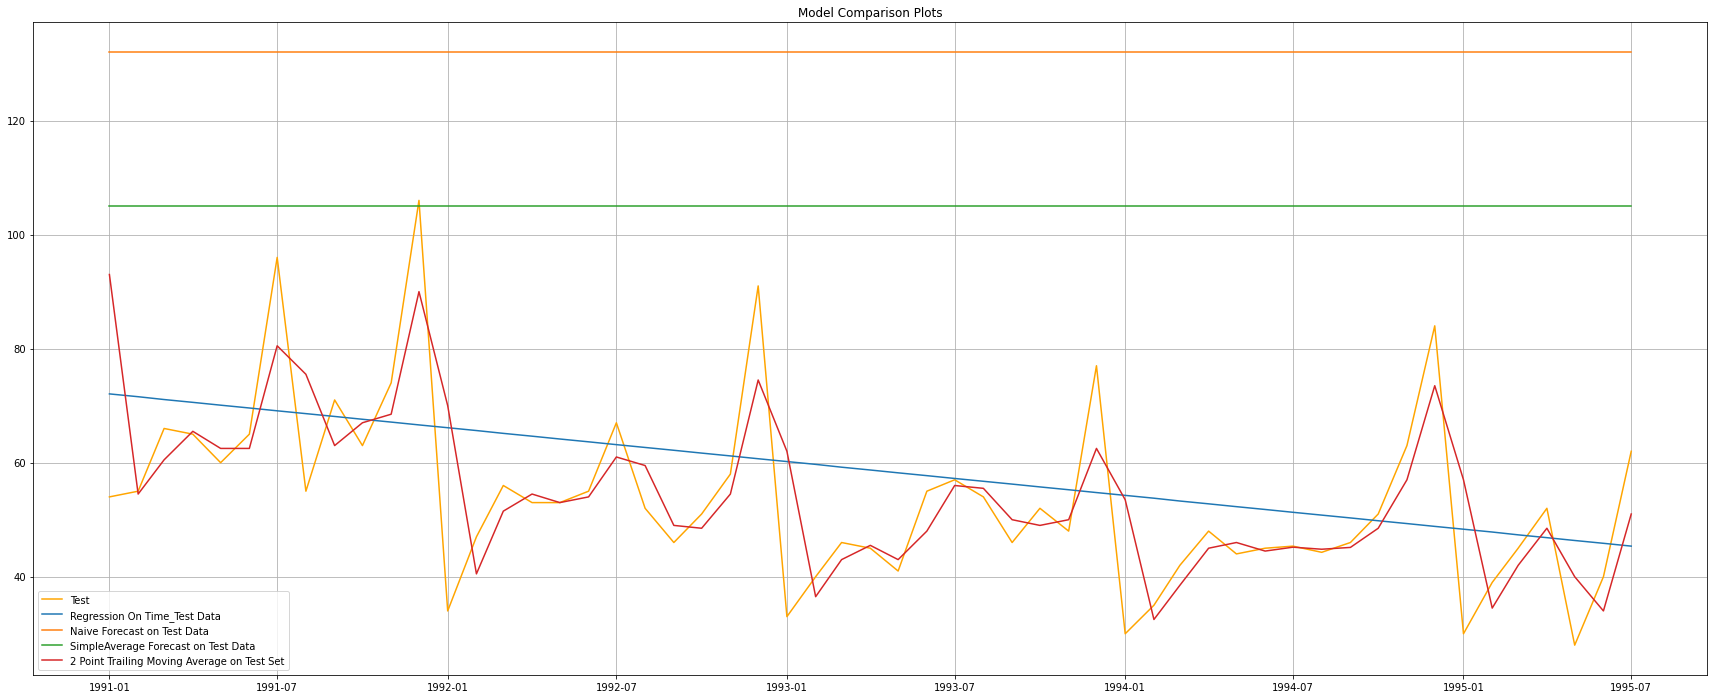

In [221]:
## Plotting on Test data

plt.figure(figsize=(30,12))
# plt.plot(train_rose['Rose'], label='Train',color = 'darkturquoise')
plt.plot(test_rose['Rose'], label='Test',color = 'orange')

plt.plot(LinearRegression_test_rose['RegOnTime_rose'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data')

plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

#### Model 5: Simple Exponential Smoothing

In [222]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [223]:
SES_train = train_rose.copy()
SES_test = test_rose.copy()

In [224]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


#### Auto fit Model:

In [225]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [226]:
printmd('**The output parameters for optimized model are:**')
model_SES_autofit.params

**The output parameters for optimized model are:**

{'smoothing_level': 0.09874995336438987,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38681121931316,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [227]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_rose))
printmd('**Viewing the first five Predictions for Test Data:**')
SES_test.head()

**Viewing the first five Predictions for Test Data:**

Rose    predict
YearMonth                  
1991-01-01  54.0  87.105001
1991-02-01  55.0  87.105001
1991-03-01  66.0  87.105001
1991-04-01  65.0  87.105001
1991-05-01  60.0  87.105001

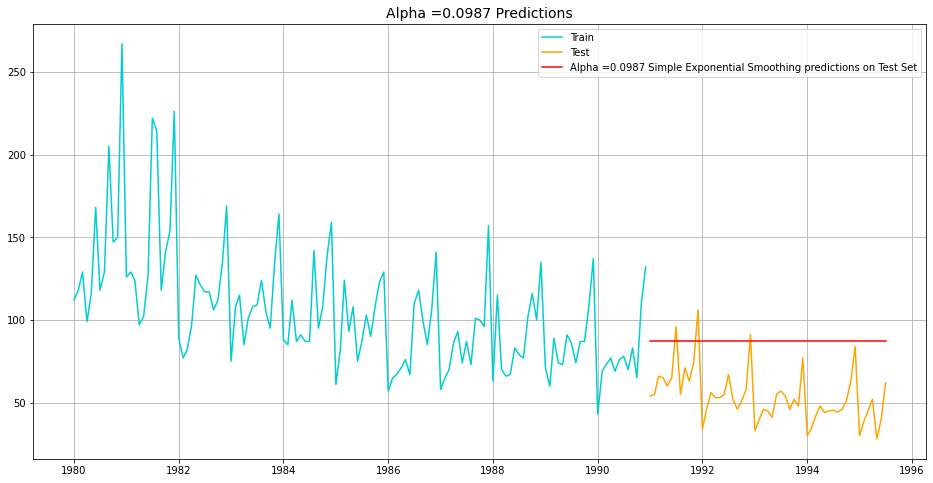

In [228]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train',color = 'darkturquoise')
plt.plot(SES_test['Rose'], label='Test',color = 'orange')

plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set',color = 'red')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0987 Predictions',fontsize = 14);

#### Model Evaluation for  𝛼  = 0.0987 : SES-Autofit Model:

In [229]:
## Test Data

rmse_SES = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SES))

For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.824


In [230]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_SES]}
                           ,index=['Alpha=0.0987, SES Optimized'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_5])
rose_resultsDf

Test RMSE
RegressionOnTime             15.278369
NaiveModel                   79.745697
SimpleAverage                53.488233
2 point TMA                  11.530054
4 point TMA                  14.458402
6 point TMA                  14.572976
9 point TMA                  14.732918
Alpha=0.0987, SES Optimized  36.824480

#### Iterative Method for Simple Exponential Smoothing

In [231]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [232]:
for i in np.arange(0,1.05,0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test_rose['Rose']))
    
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i 
                                      ,'Test RMSE':rmse_SES_test_i}, ignore_index=True)

#### Model Evaluation based on Iterations:

In [233]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Train RMSE  Test RMSE
2          0.10   31.815610  36.856268
1          0.05   32.449102  37.039679
3          0.15   31.809845  38.750307
4          0.20   31.979391  41.389972
5          0.25   32.211871  44.388786

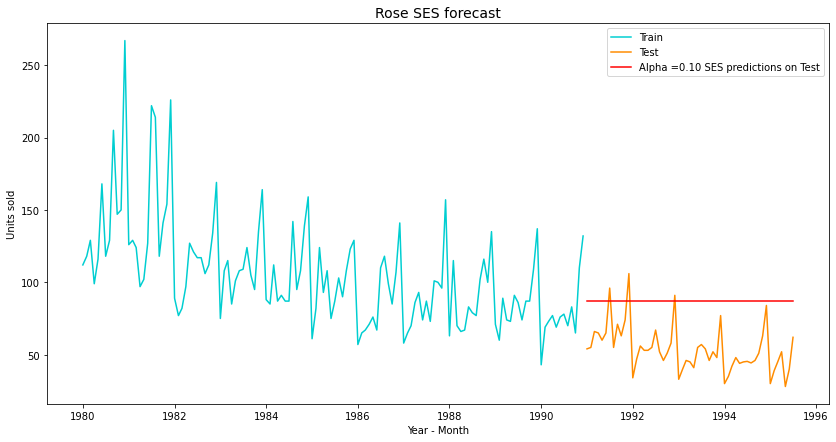

In [234]:
#plt.figure(figsize=(10,5))
plt.plot(SES_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(SES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(SES_test['predict', 0.10], color = 'red', label='Alpha =0.10 SES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose SES forecast', fontsize=14)
plt.legend(loc='best');

In [235]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.10,SES_Iterative'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_6_1])
rose_resultsDf

Test RMSE
RegressionOnTime             15.278369
NaiveModel                   79.745697
SimpleAverage                53.488233
2 point TMA                  11.530054
4 point TMA                  14.458402
6 point TMA                  14.572976
9 point TMA                  14.732918
Alpha=0.0987, SES Optimized  36.824480
Alpha=0.10,SES_Iterative     36.856268

#### Model 6: Double Exponential Smoothing (Holt's Model)

In [236]:
DES_train = train_rose.copy()
DES_test = test_rose.copy()

In [237]:
model_DES = Holt(DES_train['Rose'])

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


#### Auto fit Model

In [238]:
model_DES_autofit = model_DES.fit(optimized=True)

In [239]:
printmd('**The output parameters for optimized model are:**')
model_DES_autofit.params

**The output parameters for optimized model are:**

{'smoothing_level': 0.12981260063088668,
 'smoothing_trend': 0.05376220098709802,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 145.73070601479063,
 'initial_trend': -0.10069596155782001,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [240]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_trend']
print(alpha)
print(beta)

0.12981260063088668
0.05376220098709802


In [241]:
DES_test['predict',alpha,beta] = model_DES_autofit.forecast(len(test_rose['Rose']))
printmd('**Viewing the first five Predictions for Test Data:**')
DES_test.head()

**Viewing the first five Predictions for Test Data:**

Rose  (predict, 0.12981260063088668, 0.05376220098709802)
YearMonth                                                            
1991-01-01  54.0                                          86.161875  
1991-02-01  55.0                                          86.247204  
1991-03-01  66.0                                          86.332532  
1991-04-01  65.0                                          86.417860  
1991-05-01  60.0                                          86.503188

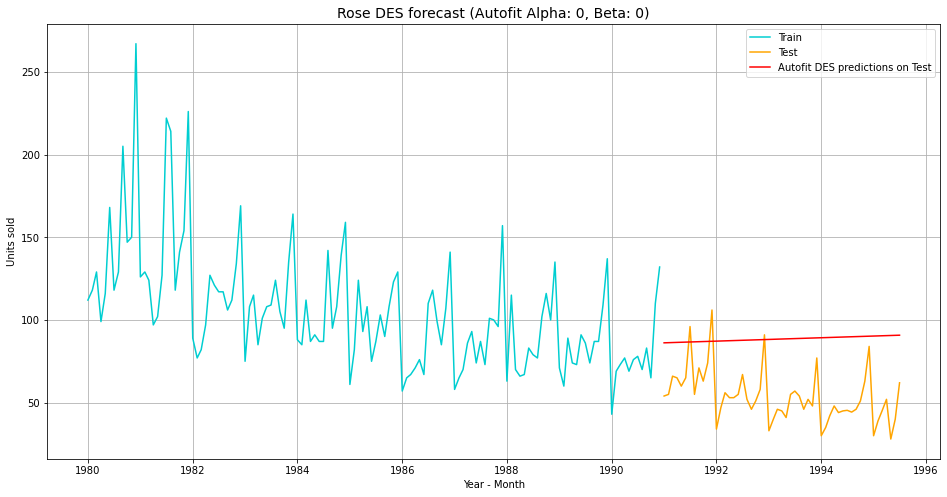

In [242]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Rose'], label='Train',color = 'darkturquoise')
plt.plot(DES_test['Rose'], label='Test',color = 'orange')

plt.plot(DES_test['predict',alpha,beta], color = 'red', label='Autofit DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Autofit Alpha: 0, Beta: 0)', fontsize=14)
plt.legend(loc='best')
plt.grid();

#### Model Evaluation for  𝛼  = 0.0 and  𝛽  = 0.0 : DES-Autofit Model

In [243]:
## Test Data

rmse_DES = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',alpha,beta],squared=False)
print("For Auto-fit Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_DES))

For Auto-fit Double Exponential Smoothing Model forecast on the Test Data, RMSE is 38.310


In [244]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_DES]}
                           ,index=['Alpha=0.0,Beta=0.0, DES Optimized'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_7])
rose_resultsDf

Test RMSE
RegressionOnTime                   15.278369
NaiveModel                         79.745697
SimpleAverage                      53.488233
2 point TMA                        11.530054
4 point TMA                        14.458402
6 point TMA                        14.572976
9 point TMA                        14.732918
Alpha=0.0987, SES Optimized        36.824480
Alpha=0.10,SES_Iterative           36.856268
Alpha=0.0,Beta=0.0, DES Optimized  38.310445

#### Iterative Method for Double Exponential Smoothing

In [245]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [246]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test_rose['Rose']))
        
        rmse_DES_train = np.round(metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False),2)
        
        rmse_DES_test = np.round(metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False),2)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                          ,'Test RMSE':rmse_DES_test}, ignore_index=True)

#### Model Evaluation based on Iterations

In [247]:
resultsDf_7.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1       34.44      36.95
1            0.1          0.2       33.45      48.72
10           0.2          0.1       33.10      65.76
2            0.1          0.3       33.15      78.19
20           0.3          0.1       33.61      98.69

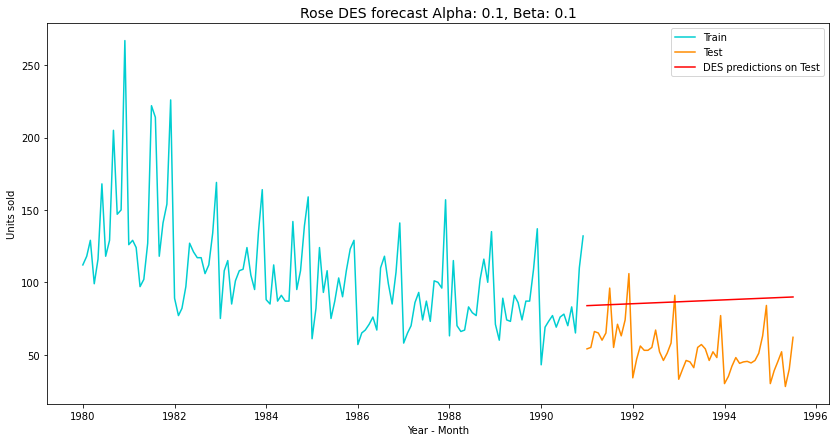

In [248]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(DES_test['predict', 0.1, 0.1], color = 'red', label='DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast Alpha: 0.1, Beta: 0.1', fontsize=14)
plt.legend(loc='best');

In [249]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DES_Iterative'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_7_1])
rose_resultsDf

Test RMSE
RegressionOnTime                   15.278369
NaiveModel                         79.745697
SimpleAverage                      53.488233
2 point TMA                        11.530054
4 point TMA                        14.458402
6 point TMA                        14.572976
9 point TMA                        14.732918
Alpha=0.0987, SES Optimized        36.824480
Alpha=0.10,SES_Iterative           36.856268
Alpha=0.0,Beta=0.0, DES Optimized  38.310445
Alpha=0.1,Beta=0.1,DES_Iterative   36.950000

#### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [250]:
TES_train = train_rose.copy()
TES_test = test_rose.copy()

In [251]:
model_TES= ExponentialSmoothing(TES_train['Rose'],trend='add',seasonal='multiplicative')

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


#### Auto fit Model

In [252]:
model_TES_autofit = model_TES.fit(optimized=True)

In [253]:
printmd('**The output parameters for optimized model are:**')
model_TES_autofit.params

**The output parameters for optimized model are:**

{'smoothing_level': 0.06571007449183297,
 'smoothing_trend': 0.051867105713176015,
 'smoothing_seasonal': 0.0015637515713898,
 'damping_trend': nan,
 'initial_level': 47.81887301367471,
 'initial_trend': -0.2961562797665537,
 'initial_seasons': array([2.35763018, 2.67367218, 2.92146068, 2.55308191, 2.87099548,
        3.13124987, 3.44178442, 3.66118656, 3.47154364, 3.39670325,
        3.95879831, 5.46173463]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [254]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
print(alpha)
print(beta)
print(gamma)

0.06571007449183297
0.051867105713176015
0.0015637515713898


In [255]:
## Prediction on the test data
TES_test['predict',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test_rose['Rose']))

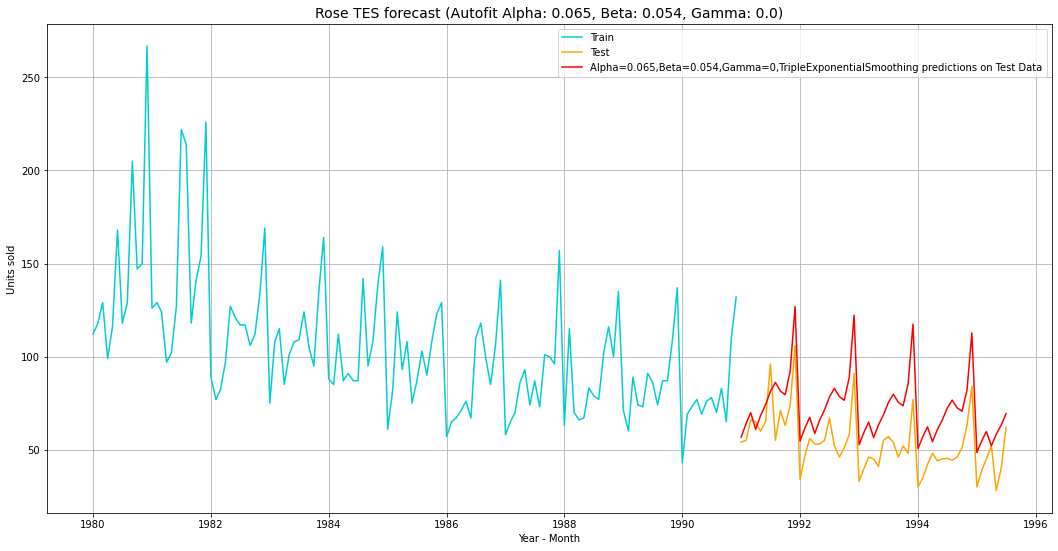

In [256]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train',color = 'darkturquoise')
plt.plot(TES_test['Rose'], label='Test',color = 'orange')

plt.plot(TES_test['predict',alpha,beta,gamma], color='red',label='Alpha=0.065,Beta=0.054,Gamma=0,TripleExponentialSmoothing predictions on Test Data')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Autofit Alpha: 0.065, Beta: 0.054, Gamma: 0.0)', fontsize=14)
plt.legend(loc='best')
plt.grid();

#### Model Evaluation for  𝛼  = 0.065 and  𝛽  = 0.054 𝛽  = 0.0 : TES-Autofit Model

In [257]:
## Test Data

rmse_TES = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',alpha,beta,gamma],squared=False)
print("For Auto-fit Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_TES))

For Auto-fit Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 21.028


In [258]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_TES]}
                           ,index=['Alpha=0.065,Beta=0.054,gamma=0.0 TES Optimized'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8])
rose_resultsDf

Test RMSE
RegressionOnTime                                15.278369
NaiveModel                                      79.745697
SimpleAverage                                   53.488233
2 point TMA                                     11.530054
4 point TMA                                     14.458402
6 point TMA                                     14.572976
9 point TMA                                     14.732918
Alpha=0.0987, SES Optimized                     36.824480
Alpha=0.10,SES_Iterative                        36.856268
Alpha=0.0,Beta=0.0, DES Optimized               38.310445
Alpha=0.1,Beta=0.1,DES_Iterative                36.950000
Alpha=0.065,Beta=0.054,gamma=0.0 TES Optimized  21.027528

#### Iterative Method for Triple Exponential Smoothing

In [259]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [260]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test_rose['Rose']))
        
            rmse_TES_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_TES_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_TES_train,'Test RMSE':rmse_TES_test}
                                                 , ignore_index=True)

#### Model Evaluation based on Iterations

In [261]:
resultsDf_8.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE  Gamma Values
8             0.1          0.2   23.969166   9.943563           0.3
112           0.2          0.5   27.631767  10.011658           0.3
170           0.3          0.2   26.806878  10.388879           0.5
9             0.1          0.2   23.919163  10.392020           0.4
184           0.3          0.4   28.111886  10.952348           0.3

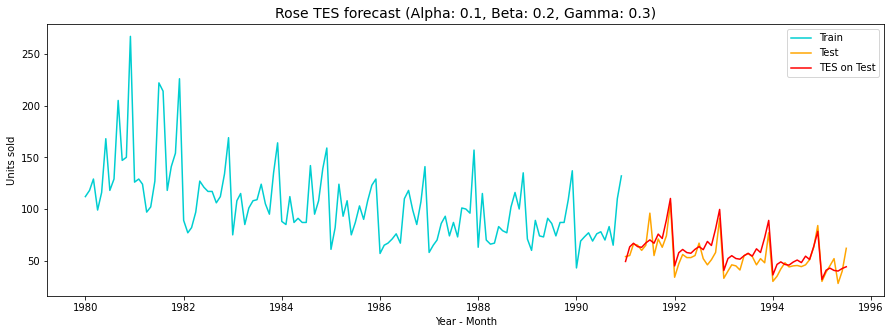

In [262]:
plt.figure(figsize=(15,5))
plt.plot(TES_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Rose'], label='Test', color = 'orange')

plt.plot(TES_test['predict', 0.1, 0.2, 0.3], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Alpha: 0.1, Beta: 0.2, Gamma: 0.3)', fontsize=14)

plt.legend(loc='best');

In [263]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [resultsDf_8.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_1])
rose_resultsDf

Test RMSE
RegressionOnTime                                15.278369
NaiveModel                                      79.745697
SimpleAverage                                   53.488233
2 point TMA                                     11.530054
4 point TMA                                     14.458402
6 point TMA                                     14.572976
9 point TMA                                     14.732918
Alpha=0.0987, SES Optimized                     36.824480
Alpha=0.10,SES_Iterative                        36.856268
Alpha=0.0,Beta=0.0, DES Optimized               38.310445
Alpha=0.1,Beta=0.1,DES_Iterative                36.950000
Alpha=0.065,Beta=0.054,gamma=0.0 TES Optimized  21.027528
Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative       9.943563

In [264]:
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative       9.943563
2 point TMA                                     11.530054
4 point TMA                                     14.458402
6 point TMA                                     14.572976
9 point TMA                                     14.732918
RegressionOnTime                                15.278369
Alpha=0.065,Beta=0.054,gamma=0.0 TES Optimized  21.027528
Alpha=0.0987, SES Optimized                     36.824480
Alpha=0.10,SES_Iterative                        36.856268
Alpha=0.1,Beta=0.1,DES_Iterative                36.950000
Alpha=0.0,Beta=0.0, DES Optimized               38.310445
SimpleAverage                                   53.488233
NaiveModel                                      79.745697

#### Plot all above models

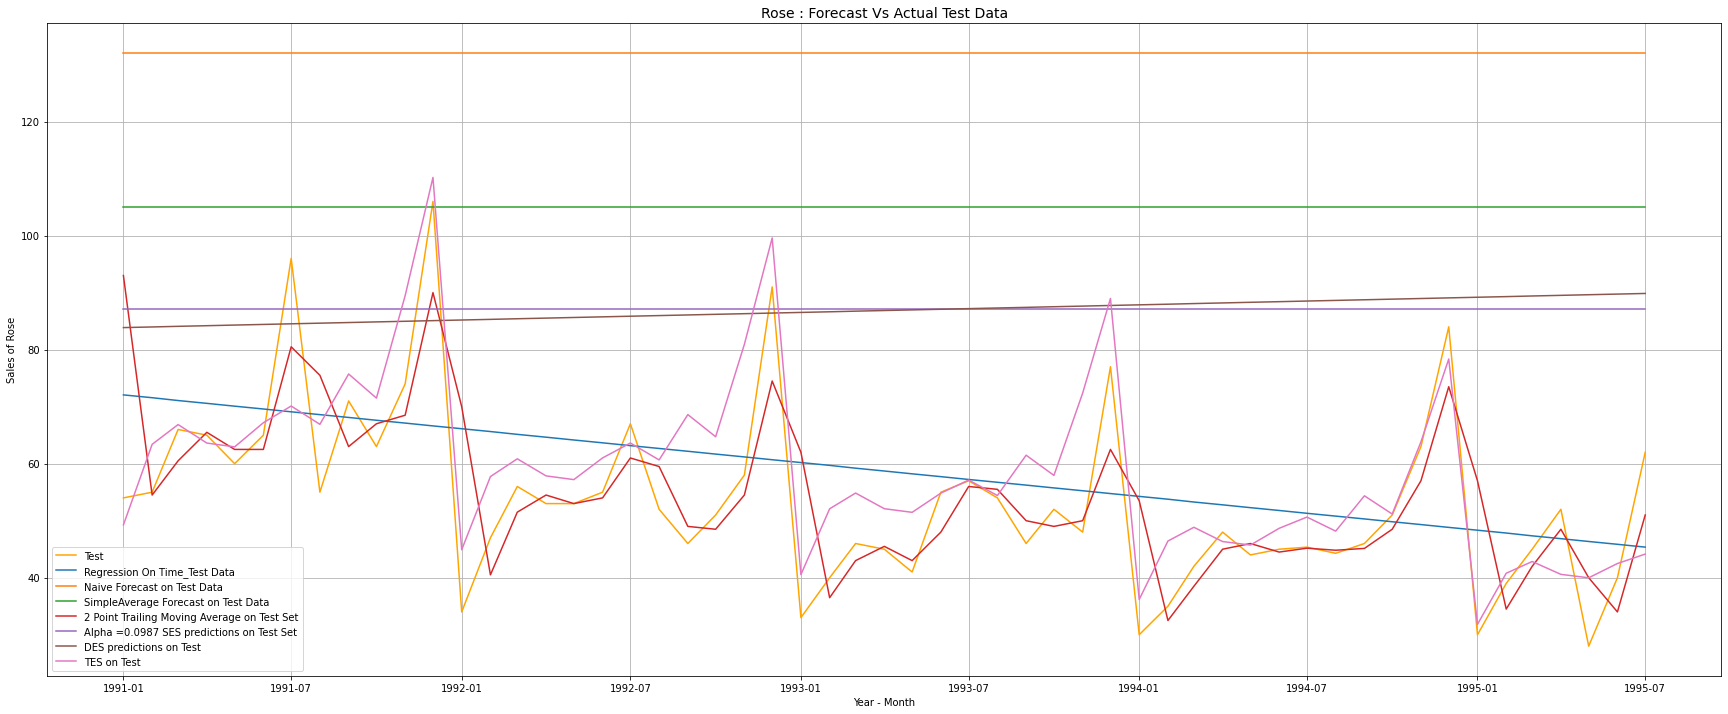

In [265]:
## Plotting on Test data

plt.figure(figsize=(30,12))
#Train data
# plt.plot(train_rose['Rose'], label='Train',color = 'darkturquoise')
#Test data
plt.plot(test_rose['Rose'], label='Test',color = 'orange')
#Linear Regression
plt.plot(LinearRegression_test_rose['RegOnTime_rose'], label='Regression On Time_Test Data')
#Naive Forecast
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data')
#SimpleAverage
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data')
#2-point Trailing Moving Average
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
##SES Optimised at alpha=0.0987
plt.plot(SES_test['predict'], label='Alpha =0.0987 SES predictions on Test Set')
#DES iterative at alpha=0.1 and beta=0.1
plt.plot(DES_test['predict', 0.1, 0.1], label='DES predictions on Test')
#TES iterative at alpha=0.1, beta=0.2 and gamma=0.3
plt.plot(TES_test['predict', 0.1, 0.2, 0.3], label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Sales of Rose')
plt.title('Rose : Forecast Vs Actual Test Data', fontsize=14)
plt.grid()
plt.legend(loc='best');

### 2.5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

#### Check for stationarity of the whole Time Series data.

In [266]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

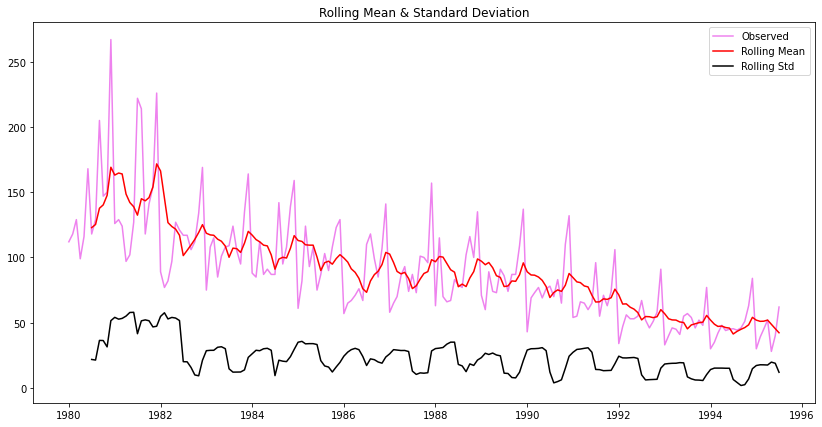

Results of Dickey-Fuller Test:
Test Statistic                  -1.872615
p-value                          0.345051
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [267]:
#Original Time Series
test_stationarity(rose['Rose'], 'violet')

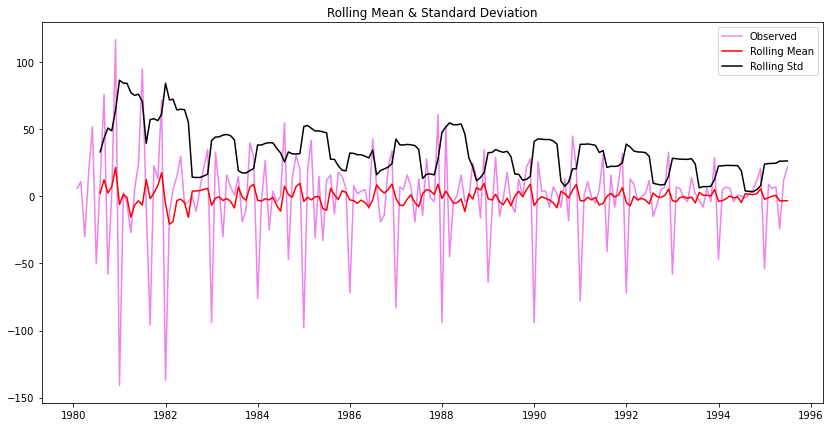

Results of Dickey-Fuller Test:
Test Statistic                -8.044081e+00
p-value                        1.814191e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [268]:
test_stationarity(rose['Rose'].diff().dropna(), 'violet')

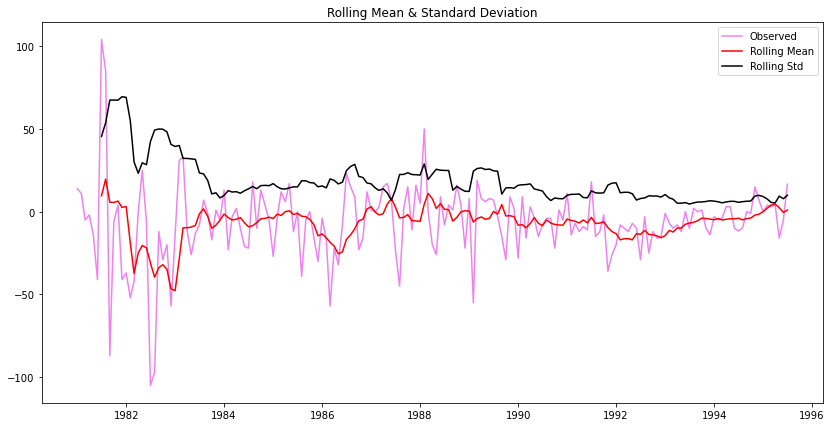

Results of Dickey-Fuller Test:
Test Statistic                  -4.257265
p-value                          0.000526
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [269]:
#check Seasonality Time Series: 
test_stationarity(rose['Rose'].diff(12).dropna(), 'violet')

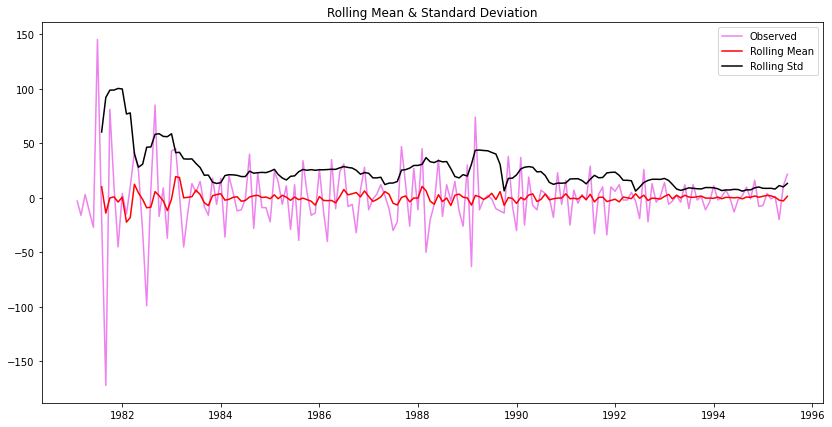

Results of Dickey-Fuller Test:
Test Statistic                  -4.605791
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [270]:
test_stationarity((rose['Rose'].diff(12).dropna()).diff().dropna(), 'violet')

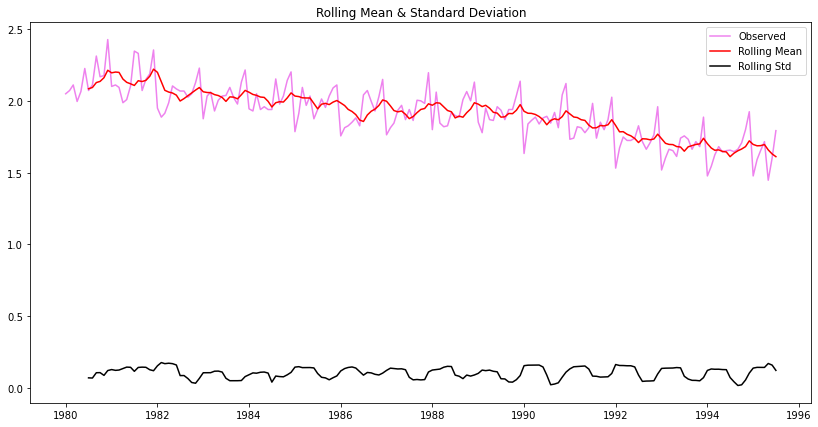

Results of Dickey-Fuller Test:
Test Statistic                  -0.412363
p-value                          0.908014
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [271]:
#Take Log series
test_stationarity(np.log10(rose['Rose']), 'violet')

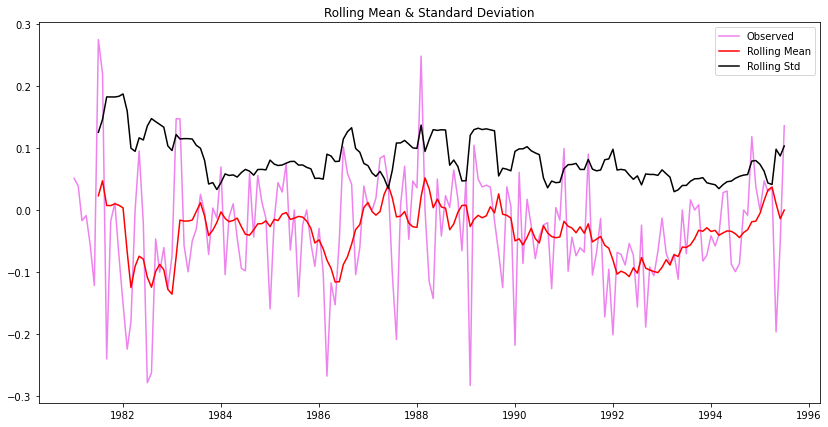

Results of Dickey-Fuller Test:
Test Statistic                  -3.934772
p-value                          0.001793
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [272]:
test_stationarity(np.log10(rose['Rose']).diff(12).dropna(), 'violet')

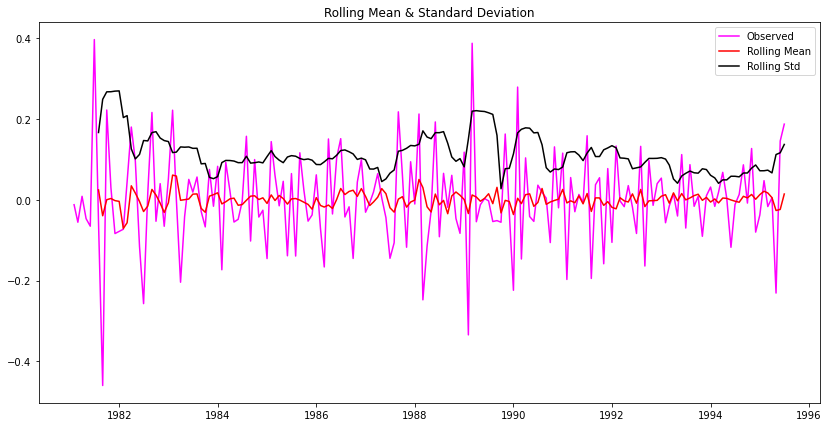

Results of Dickey-Fuller Test:
Test Statistic                  -4.628179
p-value                          0.000115
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [273]:
test_stationarity((np.log10(rose['Rose']).diff(12).dropna()).diff().dropna(),  'magenta')

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [274]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### ACF Plots

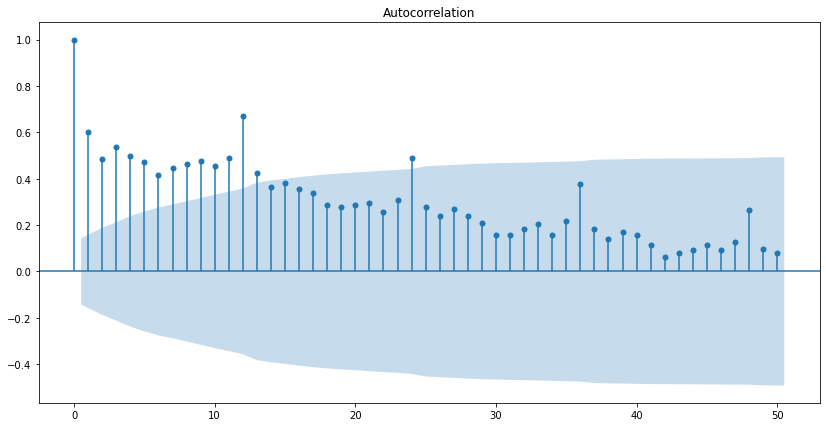

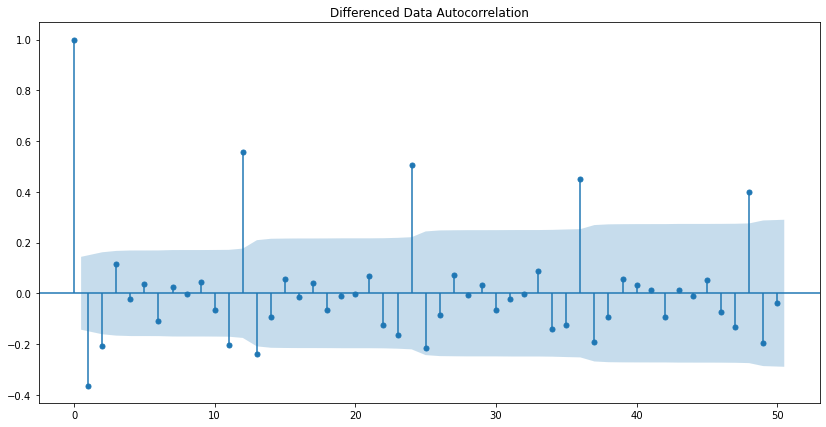

In [275]:
plot_acf(rose['Rose'],lags=50)
plot_acf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

#### PACF Plots

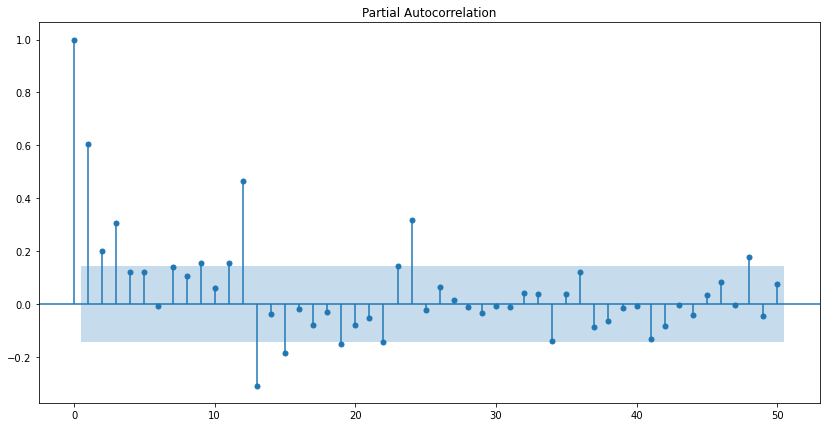

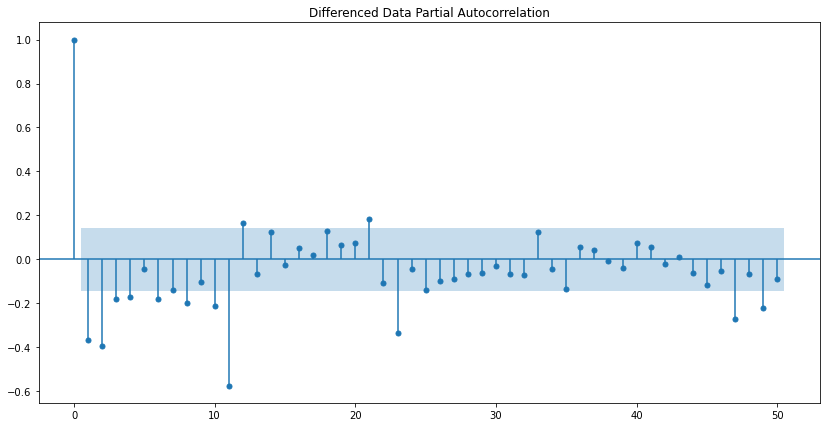

In [276]:
plot_pacf(rose['Rose'],lags=50)
plot_pacf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

#### Check for stationarity of the Training Data Time Series.

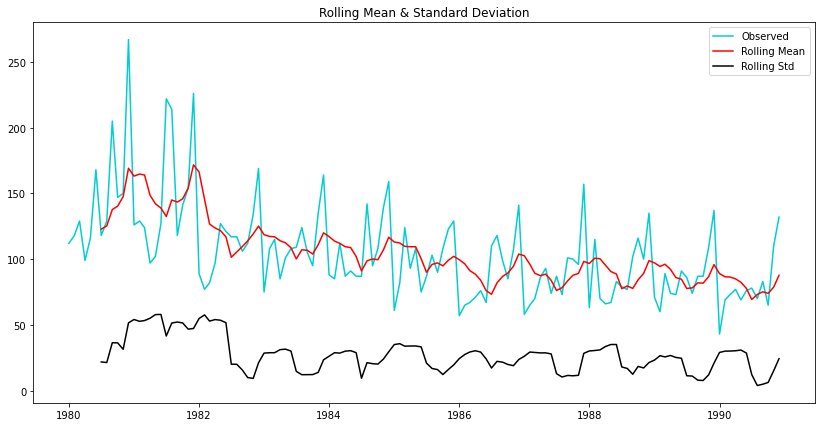

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [277]:
test_stationarity(train_rose['Rose'],'darkturquoise')

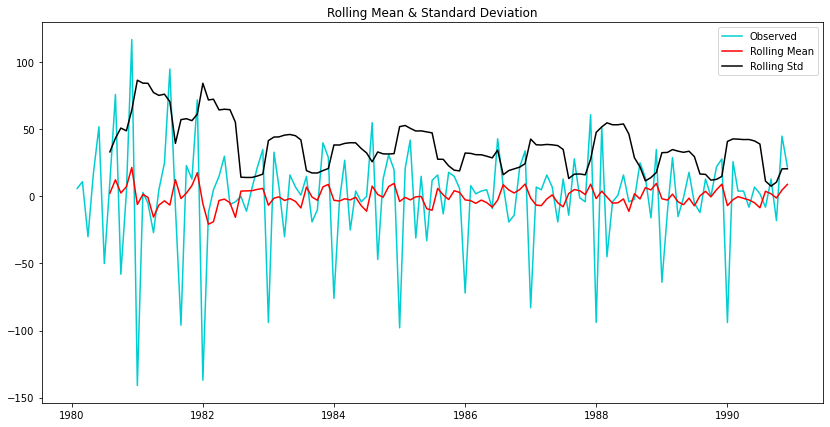

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [278]:
test_stationarity(train_rose['Rose'].diff().dropna(),'darkturquoise')

### 2.6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

#### Model 8: Auto-ARIMA

In [279]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [280]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [281]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_rose['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464035
ARIMA(0, 1, 2) - AIC:1276.8353726229147
ARIMA(1, 1, 0) - AIC:1319.348310580781
ARIMA(1, 1, 1) - AIC:1277.775749172235
ARIMA(1, 1, 2) - AIC:1277.3592262067277
ARIMA(2, 1, 0) - AIC:1300.6092611745498
ARIMA(2, 1, 1) - AIC:1279.0456894093218
ARIMA(2, 1, 2) - AIC:1279.2986939364814


In [282]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835373
5  (1, 1, 2)  1277.359226
4  (1, 1, 1)  1277.775749
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [283]:
#(0, 1, 2) AIC=1276.835382
auto_ARIMA = ARIMA(train_rose['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 10 Oct 2021   AIC                           1276.835
Time:                        17:52:59   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


#### Predict on the Test Set using this model and evaluate the model.

In [284]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_rose['Rose']))
rmse_arima_auto_model = metrics.mean_squared_error(test_rose['Rose'],predicted_auto_ARIMA[0],squared=False)
print("For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is %3.3f" %(rmse_arima_auto_model))

For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is 15.627


In [285]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_arima_auto_model]}
                           ,index=['Auto_ARIMA(0, 1, 2)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_9])
rose_resultsDf

Test RMSE
RegressionOnTime                                15.278369
NaiveModel                                      79.745697
SimpleAverage                                   53.488233
2 point TMA                                     11.530054
4 point TMA                                     14.458402
6 point TMA                                     14.572976
9 point TMA                                     14.732918
Alpha=0.0987, SES Optimized                     36.824480
Alpha=0.10,SES_Iterative                        36.856268
Alpha=0.0,Beta=0.0, DES Optimized               38.310445
Alpha=0.1,Beta=0.1,DES_Iterative                36.950000
Alpha=0.065,Beta=0.054,gamma=0.0 TES Optimized  21.027528
Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative       9.943563
Auto_ARIMA(0, 1, 2)                             15.627457

#### Model 9: Auto-SARIMA

In [286]:
SARIMA_train = train_rose.copy()
SARIMA_test = test_rose.copy()

In [287]:
#### From ACF and PACF plots We can see that there is a seasonality of 12. We will run our auto SARIMA models by setting seasonality 12.
import itertools
p = q = range(0,3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [288]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [289]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438279514
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301621205
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014776034
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658806
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601654
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.7332182654582
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.513269837442
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390729146078
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244224952
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.7663133561898
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.0730606717831
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:790.9032809266706
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:944.2456655530447
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:929.3362488520099
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:792.7161670356866
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:810.319435015864
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:804.1555753025987
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:782.1538715130778
SARIMA(0, 

In [290]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 1, 2, 12)  774.969119
53  (1, 1, 2)  (2, 1, 2, 12)  776.940129
80  (2, 1, 2)  (2, 1, 2, 12)  776.996100
17  (0, 1, 1)  (2, 1, 2, 12)  782.153872
79  (2, 1, 2)  (2, 1, 1, 12)  783.703652

In [291]:
#(0, 1, 2)*(2, 1, 2, 12) AIC=774.969120
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Sun, 10 Oct 2021   AIC                            774.969
Time:                                    17:53:34   BIC                            792.622
Sample:                                         0   HQIC                           782.094
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.166      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

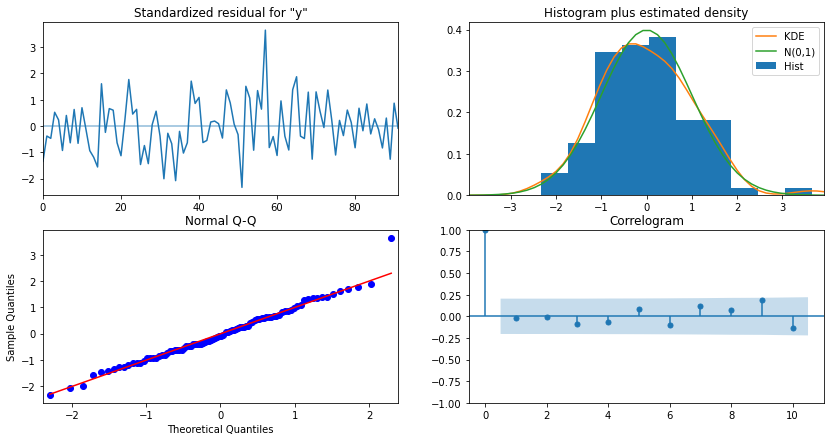

In [292]:
results_auto_SARIMA_rose.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [293]:
predicted_auto_SARIMA = results_auto_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']))
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  44.213685  14.221636      16.339790      72.087580
1  62.326708  14.300382      34.298475      90.354941
2  67.313431  14.302284      39.281470      95.345392
3  63.161026  14.305186      35.123377      91.198675
4  66.474325  14.310557      38.426148      94.522502

In [294]:
rose_forecasted = predicted_auto_SARIMA.predicted_mean
SARIMA_test['rose_forecasted'] = predicted_auto_SARIMA.predicted_mean
SARIMA_test.head()

Rose  rose_forecasted
YearMonth                        
1991-01-01  54.0        44.213685
1991-02-01  55.0        62.326708
1991-03-01  66.0        67.313431
1991-04-01  65.0        63.161026
1991-05-01  60.0        66.474325

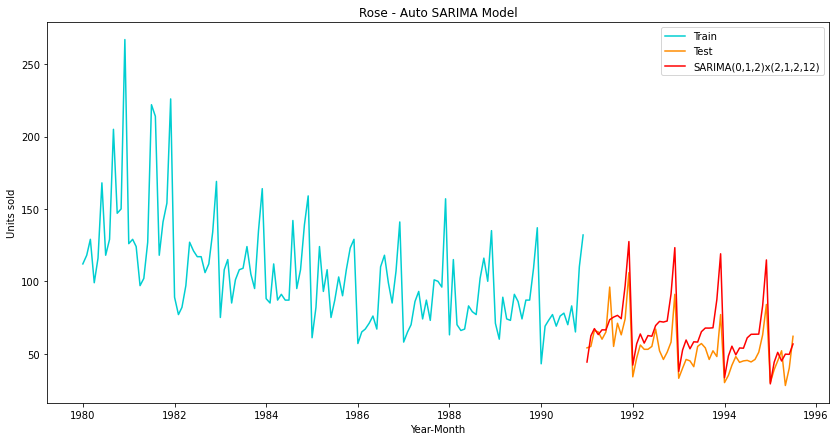

In [295]:
plt.plot(SARIMA_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(SARIMA_test['Rose'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['rose_forecasted'], color='red', label='SARIMA(0,1,2)x(2,1,2,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA Model')
plt.legend(loc='best');

In [296]:
rmse_SARIMA_auto_model = metrics.mean_squared_error(SARIMA_test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
print("For Auto-SARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_auto_model))

For Auto-SARIMA Model forecast on the Test Data, RMSE is 16.528


In [297]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto_model]}
                           ,index=['Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_10])
rose_resultsDf

Test RMSE
RegressionOnTime                                15.278369
NaiveModel                                      79.745697
SimpleAverage                                   53.488233
2 point TMA                                     11.530054
4 point TMA                                     14.458402
6 point TMA                                     14.572976
9 point TMA                                     14.732918
Alpha=0.0987, SES Optimized                     36.824480
Alpha=0.10,SES_Iterative                        36.856268
Alpha=0.0,Beta=0.0, DES Optimized               38.310445
Alpha=0.1,Beta=0.1,DES_Iterative                36.950000
Alpha=0.065,Beta=0.054,gamma=0.0 TES Optimized  21.027528
Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative       9.943563
Auto_ARIMA(0, 1, 2)                             15.627457
Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)              16.527732

#### Model-10 AUTO SARIMA on Log Series

In [298]:
rose_log_train = np.log10(SARIMA_train['Rose'])

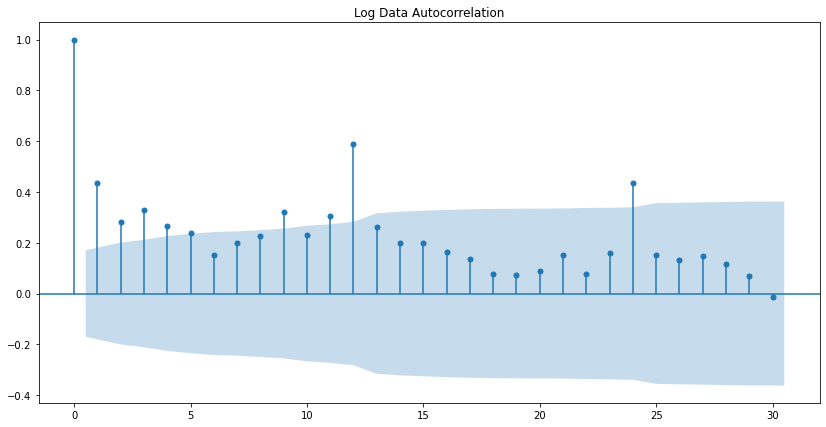

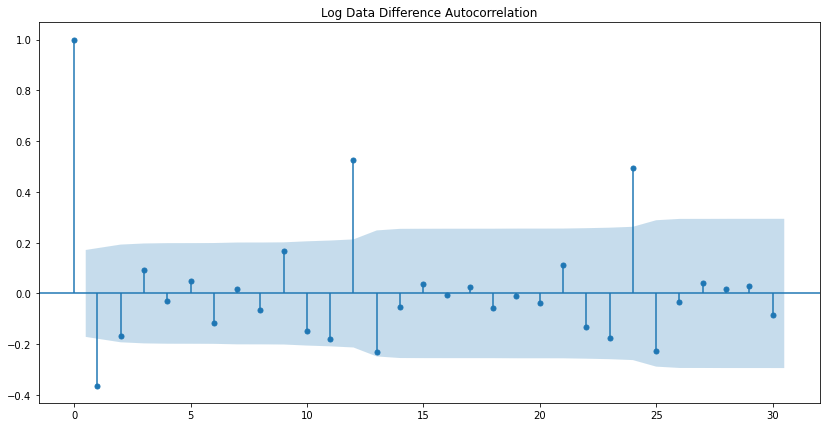

In [299]:
plot_acf(rose_log_train,lags=30,title='Log Data Autocorrelation')
plot_acf(rose_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

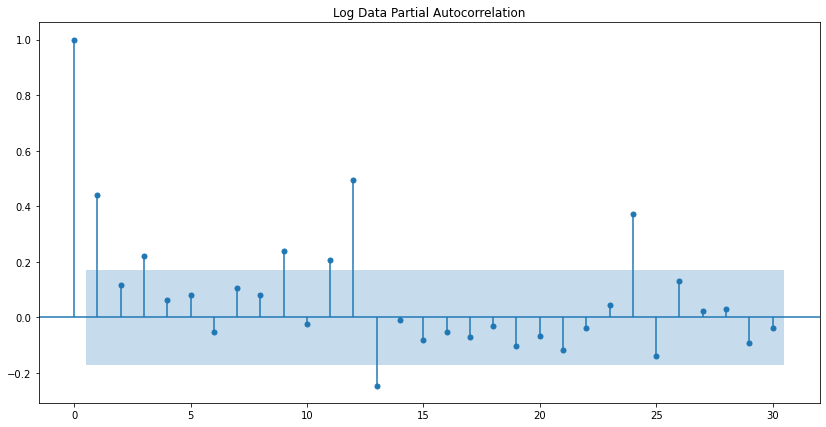

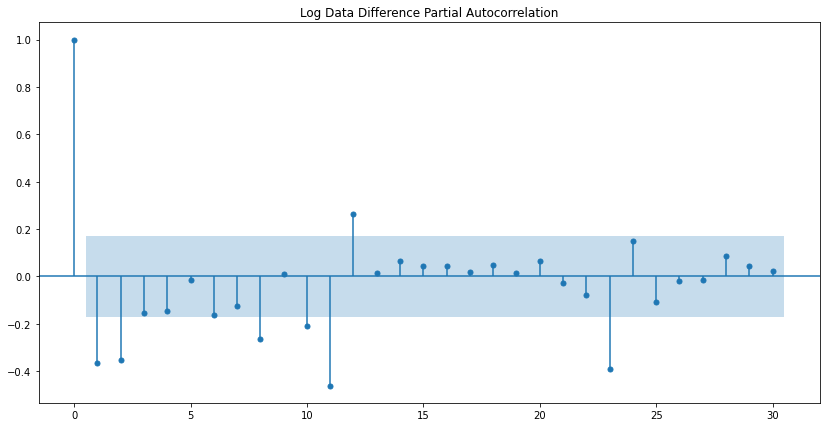

In [300]:
plot_pacf(rose_log_train,lags=30,title='Log Data Partial Autocorrelation')
plot_pacf(rose_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

#### We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality as 12.



In [301]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [302]:
SARIMA_AIC_rose_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [303]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose_log = SARIMA_model_rose_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose_log.aic))
        SARIMA_AIC_rose_log = SARIMA_AIC_rose_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose_log.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-132.28115088413216
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-151.244020590174


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inf

SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-163.20900777080038
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-151.39741684976528
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-195.698102119325


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-168.63061361021843
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-176.14679360677218
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-193.8094316511306


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-182.39902111494445
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-184.1931808146924
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-184.99828079128807


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-167.6980091131356
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-189.56133440730062


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-189.05004926228122


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-188.6755021099642
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-163.31782063212822


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-163.44104693964917


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:-165.20267173998127
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:-180.16317688318458
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:-193.9888499574981


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:-205.88038323012296
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:-201.16086969510422


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:-245.3156234945358


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:-215.7177827195097
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:-226.4606804347236


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:-247.07640736045147


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:-225.171375011418
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:-227.9685421610893


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:-224.91037274837984


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:-214.00188060764538


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:-238.87035212424362


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:-236.87300445863087


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:-233.2782329971689


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:-211.70848067918075


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:-213.56045297594824


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:-213.65653691383383
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:-180.90674393133804
SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:-195.1514447791568


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:-204.86494790301336
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:-201.89225868510457


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:-242.2321260784345


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:-211.40880022354548
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:-229.57397147934137


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:-243.8188452297993


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:-227.07067203750066
SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:-229.6060688881433


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:-226.5839376616059


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:-209.286438537067


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:-239.8141849742258


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:-237.87796369601605


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:-235.53511728961234


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:-210.54341044680015


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:-211.93556416848537


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:-210.06875310361022
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:-148.66657556379576
SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:-165.5739247461335


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:-177.05292854000217
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:-161.81472953636262
SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:-210.40657412525508


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:-185.95216868912772
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:-184.8820054709423


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:-207.5166423176277
SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:-195.97453358153538


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:-195.19184776717483
SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:-197.24859973028381


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:-184.69340855312146
SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.8348363646156


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:-200.27919751168602


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:-202.8368664770043
SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:-181.30079499826923


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:-181.45308919333982


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:-183.62461942970012
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:-181.82485136703042
SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:-195.90180087107612


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:-206.1497798527563
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:-203.1912038678478


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:-244.1941006999959


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:-214.22123266715593
SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:-225.8978006776703


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:-246.52380271910567


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:-226.360335982775
SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:-227.10895307489363


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:-225.59590708753765


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:-212.50779013523282
SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:-236.63151417906323


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:-235.03481279401984


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:-233.13837515930507


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:-211.0314144046933


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:-212.88612368739416


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:-212.25026108855914
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:-180.26441476540143


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:-193.15178446401478


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:-202.36341811111782


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inf

SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:-200.3511231166406
SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:-243.1520359523123


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:-209.4093499747544
SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:-225.4952116778986


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:-245.79245708993352


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:-225.46371695275795


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:-225.47007511302067


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:-224.62296585590093


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:-207.72342824934256


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:-235.62223919192218


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:-233.63929934917527


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:-233.33372385178308


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:-209.06037260604074


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:-211.3595641234556


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:-208.24359541653334
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:-162.0504998008119
SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:-172.67759303665517


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:-183.51513431852342
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:-170.97394389652075


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:-216.0165088789613


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:-190.22658110817815
SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:-192.70643076913274


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:-218.07090957532384


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:-201.83724593138407
SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:-198.56160792466233


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:-200.15579718518006


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:-188.6447803394917


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:-206.075566504659


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:-204.24888009119


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:-205.9434256136106


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:-184.84843508852737


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:-188.87176166976246


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:-187.51176458463712
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:-180.18642237055175


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:-194.72043234407755


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:-205.38611383102216
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:-203.99973871337386


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:-243.36373769195598


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:-212.24002784647539
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:-224.05002194416488


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:-246.47194031299335


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:-225.256826005017
SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:-222.96973869715188


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:-224.91674538726184


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:-211.06397902896737


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:-235.52221069968388


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:-233.66212582971806


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:-234.33048542399462


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inf

SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:-207.1047010311296
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:-209.4556636838925


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:-210.35955443582043
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-178.28757664289776


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-190.77979653087655


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:-200.81603204978813


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:-199.75650572958733


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:-243.70798533529216


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inf

SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:-208.47749746485903
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:-222.2002578457092


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:-243.81901673176606


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:-224.1178726707173


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:-222.28385963844207


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:-226.7110934560799


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:-205.7023140066358


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:-231.56917733043556


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:-229.93867247558157


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:-231.60737682159936


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:-205.08744958066714


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:-207.25681217605458


C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:-206.31174016071884


In [304]:
SARIMA_AIC_rose_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
25   (0, 1, 1)  (1, 0, 1, 12) -247.076407
79   (1, 1, 1)  (1, 0, 1, 12) -246.523803
133  (2, 1, 1)  (1, 0, 1, 12) -246.471940
97   (1, 1, 2)  (1, 0, 1, 12) -245.792457
22   (0, 1, 1)  (0, 1, 1, 12) -245.315623

In [305]:
#(0, 1, 1)*(1, 0, 1, 12) AIC=-247.076408
import statsmodels.api as sm

auto_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose_log = auto_SARIMA_rose_log.fit(maxiter=1000)
print(results_auto_SARIMA_rose_log.summary())

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 127.538
Date:                            Sun, 10 Oct 2021   AIC                           -247.076
Time:                                    17:54:49   BIC                           -236.028
Sample:                                01-01-1980   HQIC                          -242.591
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0653      0.058    -18.390      0.000      -1.179      -0.952
ar.S.L12       0.9555      0.028   

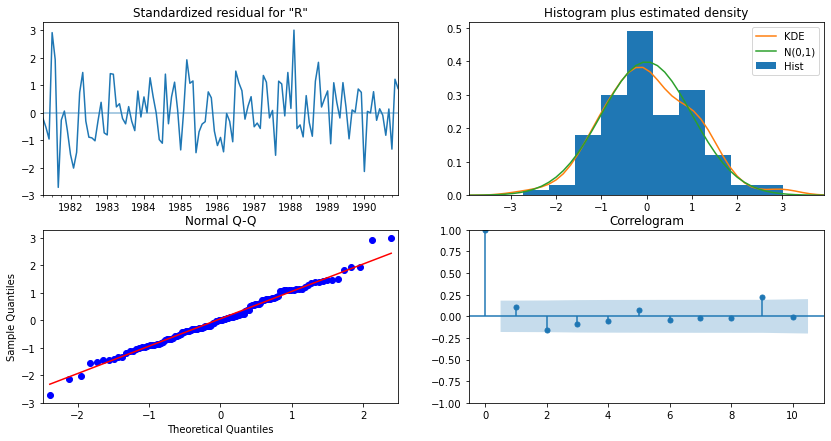

In [306]:
results_auto_SARIMA_rose_log.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [307]:
predicted_auto_SARIMA_rose_log = results_auto_SARIMA_rose_log.get_forecast(steps=len(SARIMA_test['Rose']))

In [308]:
predicted_auto_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose            mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1.754735  0.076361       1.605070       1.904400
1991-02-01  1.821743  0.076453       1.671897       1.971589
1991-03-01  1.848372  0.076596       1.698246       1.998497
1991-04-01  1.821955  0.076738       1.671551       1.972359
1991-05-01  1.839040  0.076880       1.688358       1.989723

In [309]:
rose_forecasted_log = predicted_auto_SARIMA_rose_log.predicted_mean
SARIMA_test['rose_forecasted_log'] = np.power(10, predicted_auto_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

Rose  rose_forecasted  rose_forecasted_log
YearMonth                                             
1991-01-01  54.0        44.213685            56.850553
1991-02-01  55.0        62.326708            66.335099
1991-03-01  66.0        67.313431            70.529624
1991-04-01  65.0        63.161026            66.367426
1991-05-01  60.0        66.474325            69.030408

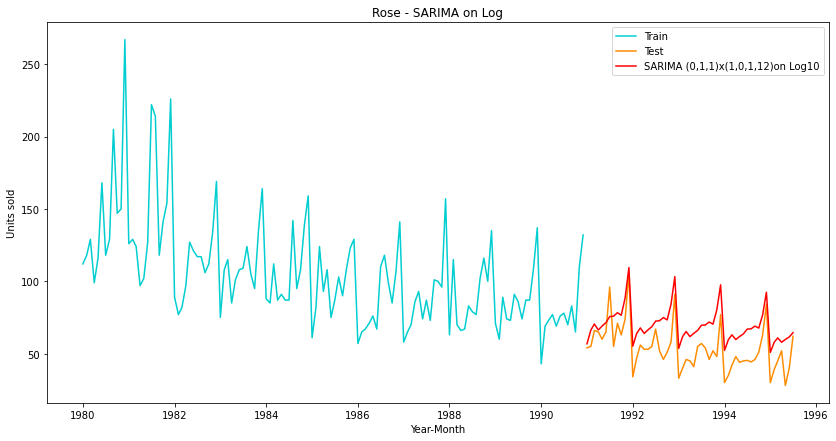

In [310]:
plt.plot(SARIMA_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(SARIMA_test['Rose'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['rose_forecasted_log'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Rose - SARIMA on Log')
plt.legend(loc='best');

In [311]:
rmse_SARIMA_auto_model_log = metrics.mean_squared_error(SARIMA_test['Rose'],SARIMA_test['rose_forecasted_log'],squared=False)
print("For Auto-SARIMA_log Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_auto_model_log))

For Auto-SARIMA_log Model forecast on the Test Data, RMSE is 17.918


In [312]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto_model_log]}
                           ,index=['Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_11])
rose_resultsDf

Test RMSE
RegressionOnTime                                15.278369
NaiveModel                                      79.745697
SimpleAverage                                   53.488233
2 point TMA                                     11.530054
4 point TMA                                     14.458402
6 point TMA                                     14.572976
9 point TMA                                     14.732918
Alpha=0.0987, SES Optimized                     36.824480
Alpha=0.10,SES_Iterative                        36.856268
Alpha=0.0,Beta=0.0, DES Optimized               38.310445
Alpha=0.1,Beta=0.1,DES_Iterative                36.950000
Alpha=0.065,Beta=0.054,gamma=0.0 TES Optimized  21.027528
Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative       9.943563
Auto_ARIMA(0, 1, 2)                             15.627457
Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)              16.527732
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          17.917600

### 2.7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Model-11 Manual ARIMA

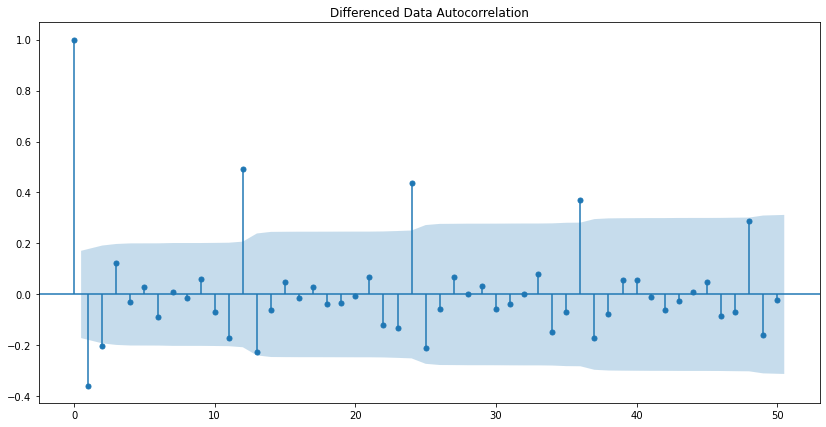

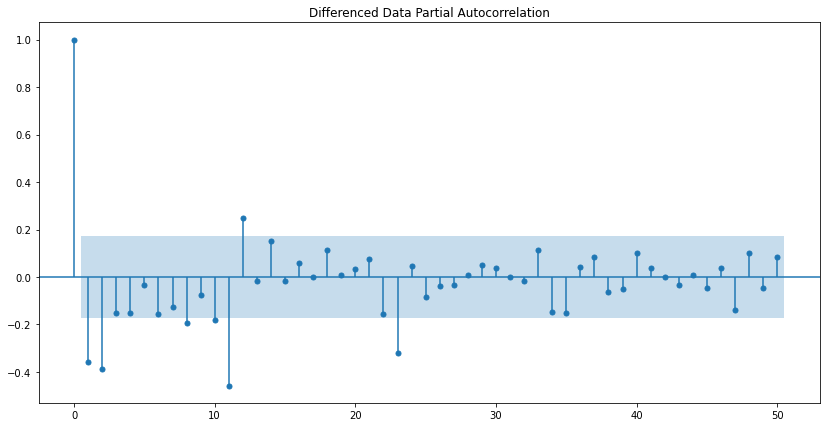

In [313]:
plot_acf(train_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [314]:
manual_ARIMA = ARIMA(train_rose['Rose'].astype('float64'), order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 10 Oct 2021   AIC                           1279.299
Time:                        17:54:50   BIC                           1296.550
Sample:                    02-01-1980   HQIC                          1286.309
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


#### Predict on the Test Set using this model and evaluate the model.

In [315]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_rose['Rose']))
rmse_arima_manual_model = metrics.mean_squared_error(test_rose['Rose'],predicted_manual_ARIMA[0],squared=False)
print("For Manual-ARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_arima_manual_model))

For Manual-ARIMA Model forecast on the Test Data, RMSE is 15.364


In [316]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse_arima_manual_model]}
                           ,index=['Manual_ARIMA(2,1,2)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_12])
rose_resultsDf

Test RMSE
RegressionOnTime                                15.278369
NaiveModel                                      79.745697
SimpleAverage                                   53.488233
2 point TMA                                     11.530054
4 point TMA                                     14.458402
6 point TMA                                     14.572976
9 point TMA                                     14.732918
Alpha=0.0987, SES Optimized                     36.824480
Alpha=0.10,SES_Iterative                        36.856268
Alpha=0.0,Beta=0.0, DES Optimized               38.310445
Alpha=0.1,Beta=0.1,DES_Iterative                36.950000
Alpha=0.065,Beta=0.054,gamma=0.0 TES Optimized  21.027528
Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative       9.943563
Auto_ARIMA(0, 1, 2)                             15.627457
Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)              16.527732
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          17.917600
Manual_ARIMA(2,1,2)                             15.363923

#### Model-12 Manual SARIMA

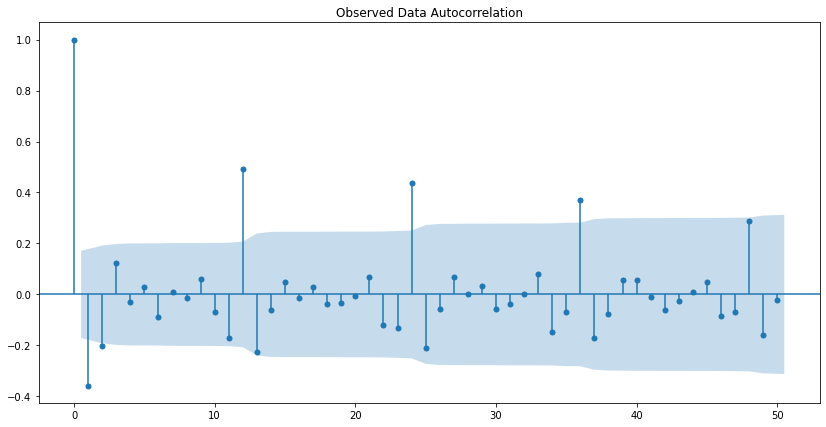

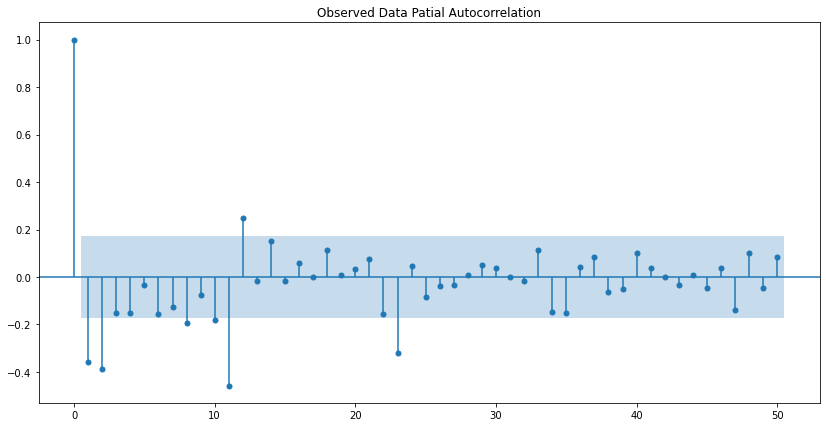

In [317]:
plot_acf(SARIMA_train['Rose'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(SARIMA_train['Rose'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

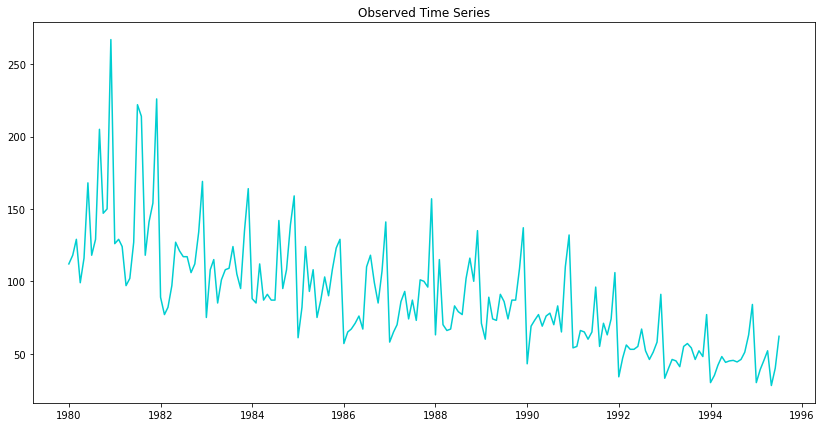

In [318]:
plt.plot(rose['Rose'], color = 'darkturquoise')
plt.title ('Observed Time Series');

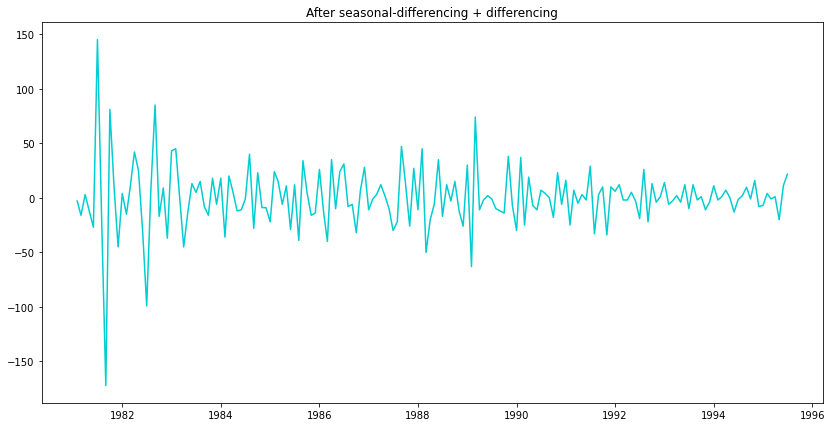

In [319]:
plt.plot((rose['Rose'].diff(12).dropna()).diff().dropna(),  color = 'darkturquoise')
plt.title ('After seasonal-differencing + differencing');

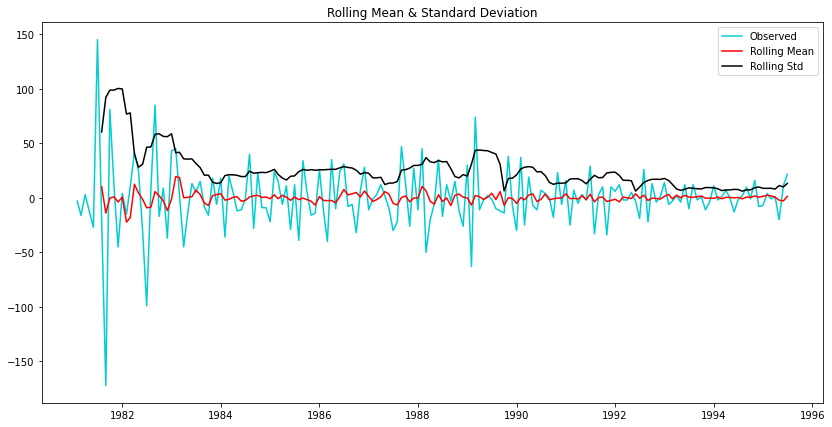

Results of Dickey-Fuller Test:
Test Statistic                  -4.605791
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [320]:
test_stationarity((rose['Rose'].diff(12).dropna()).diff().dropna(),'darkturquoise')

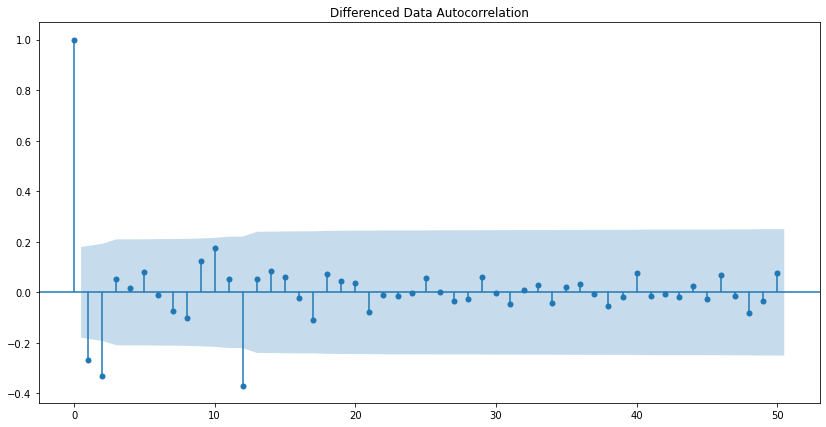

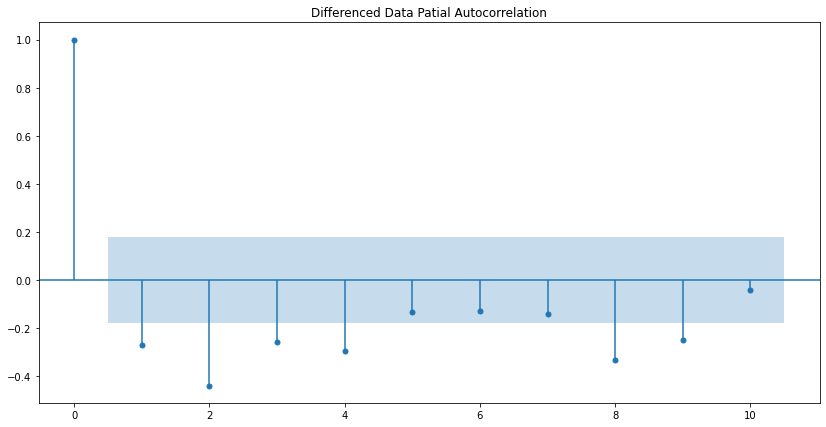

In [321]:
plot_acf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=10,title='Differenced Data Patial Autocorrelation')
plt.show()

In [322]:
#(4, 1, 2)*(0, 1, 2, 12)
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Sun, 10 Oct 2021   AIC                            786.737
Time:                                    17:54:52   BIC                            809.433
Sample:                                         0   HQIC                           795.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.132     -6.814      0.000      -1.155      -0.639
ar.L2          0.0165      0.171   

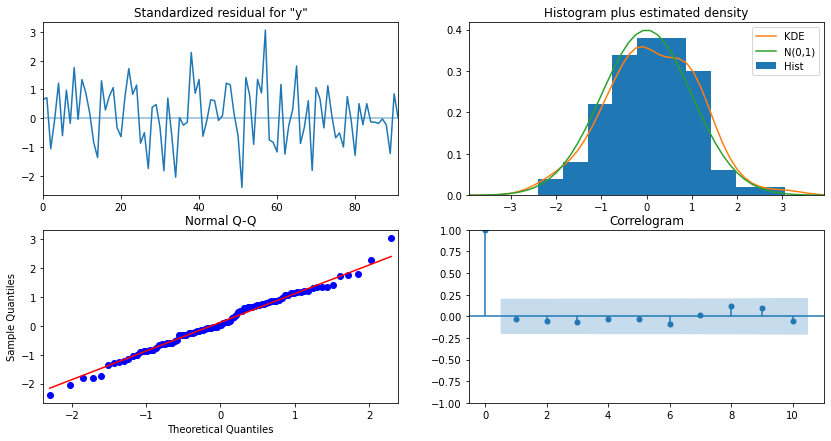

In [323]:
results_manual_SARIMA_rose.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [324]:
predicted_manual_SARIMA = results_manual_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']))
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  44.733041  15.552666      14.250375      75.215706
1  64.208693  16.000767      32.847766      95.569621
2  65.110689  16.074606      33.605040      96.616339
3  68.453063  16.150996      36.797692     100.108433
4  61.423433  16.154556      29.761085      93.085781

In [325]:
manual_rose_forecasted = predicted_manual_SARIMA.predicted_mean
SARIMA_test['manual_rose_forecasted'] = predicted_manual_SARIMA.predicted_mean
SARIMA_test.head()

Rose  rose_forecasted  rose_forecasted_log  manual_rose_forecasted
YearMonth                                                                     
1991-01-01  54.0        44.213685            56.850553               44.733041
1991-02-01  55.0        62.326708            66.335099               64.208693
1991-03-01  66.0        67.313431            70.529624               65.110689
1991-04-01  65.0        63.161026            66.367426               68.453063
1991-05-01  60.0        66.474325            69.030408               61.423433

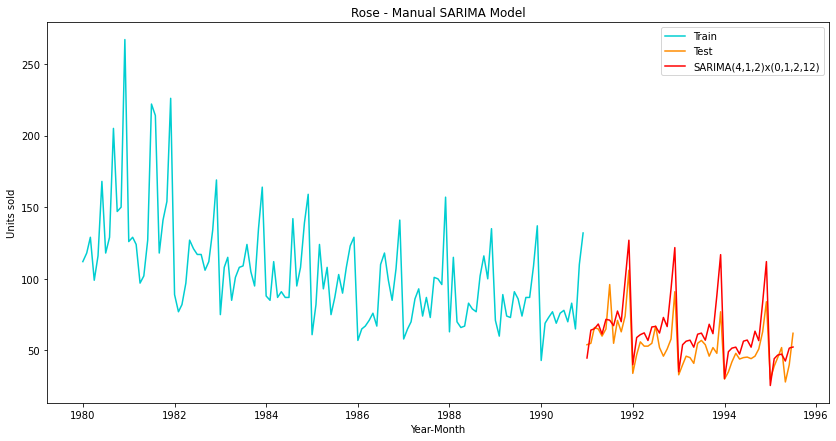

In [326]:
plt.plot(SARIMA_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(SARIMA_test['Rose'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['manual_rose_forecasted'], color='red', label='SARIMA(4,1,2)x(0,1,2,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Manual SARIMA Model')
plt.legend(loc='best');

In [327]:
rmse_SARIMA_manual_model = metrics.mean_squared_error(SARIMA_test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
print("For Manual-SARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_manual_model))

For Manual-SARIMA Model forecast on the Test Data, RMSE is 15.389


In [328]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_manual_model]}
                           ,index=['Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_13])
rose_resultsDf

Test RMSE
RegressionOnTime                                15.278369
NaiveModel                                      79.745697
SimpleAverage                                   53.488233
2 point TMA                                     11.530054
4 point TMA                                     14.458402
6 point TMA                                     14.572976
9 point TMA                                     14.732918
Alpha=0.0987, SES Optimized                     36.824480
Alpha=0.10,SES_Iterative                        36.856268
Alpha=0.0,Beta=0.0, DES Optimized               38.310445
Alpha=0.1,Beta=0.1,DES_Iterative                36.950000
Alpha=0.065,Beta=0.054,gamma=0.0 TES Optimized  21.027528
Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative       9.943563
Auto_ARIMA(0, 1, 2)                             15.627457
Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)              16.527732
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          17.917600
Manual_ARIMA(2,1,2)                             15.363923
Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)            15.388806

### 2.8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [329]:
rose_resultsDf

Test RMSE
RegressionOnTime                                15.278369
NaiveModel                                      79.745697
SimpleAverage                                   53.488233
2 point TMA                                     11.530054
4 point TMA                                     14.458402
6 point TMA                                     14.572976
9 point TMA                                     14.732918
Alpha=0.0987, SES Optimized                     36.824480
Alpha=0.10,SES_Iterative                        36.856268
Alpha=0.0,Beta=0.0, DES Optimized               38.310445
Alpha=0.1,Beta=0.1,DES_Iterative                36.950000
Alpha=0.065,Beta=0.054,gamma=0.0 TES Optimized  21.027528
Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative       9.943563
Auto_ARIMA(0, 1, 2)                             15.627457
Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)              16.527732
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          17.917600
Manual_ARIMA(2,1,2)                             15.363923
Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)            15.388806

### 2.9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [330]:
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative       9.943563
2 point TMA                                     11.530054
4 point TMA                                     14.458402
6 point TMA                                     14.572976
9 point TMA                                     14.732918
RegressionOnTime                                15.278369
Manual_ARIMA(2,1,2)                             15.363923
Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)            15.388806
Auto_ARIMA(0, 1, 2)                             15.627457
Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)              16.527732
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          17.917600
Alpha=0.065,Beta=0.054,gamma=0.0 TES Optimized  21.027528
Alpha=0.0987, SES Optimized                     36.824480
Alpha=0.10,SES_Iterative                        36.856268
Alpha=0.1,Beta=0.1,DES_Iterative                36.950000
Alpha=0.0,Beta=0.0, DES Optimized               38.310445
SimpleAverage                                   53.488233
NaiveModel                                      79.745697

#### Build model on the entire dataset using best optimum model:
**which is Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative or 2 point TMA**

In [331]:
Full_model_TES_rose = ExponentialSmoothing(rose['Rose'],trend='additive',seasonal='multiplicative')
Full_model_TES_rose_fit = Full_model_TES_rose.fit(smoothing_level=0.1,smoothing_trend=0.2,smoothing_seasonal=0.3,optimized=True,use_brute=True)
TES_rose_forecast = Full_model_TES_rose_fit.forecast(steps=12)

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [332]:
rmse_rose_tes_full = metrics.mean_squared_error(rose['Rose'],Full_model_TES_rose_fit.fittedvalues,squared=False)
print("For Triple Exponential Smoothing Model forecast on the Entire Data, RMSE is %3.3f" %(rmse_rose_tes_full))

For Triple Exponential Smoothing Model forecast on the Entire Data, RMSE is 17.887


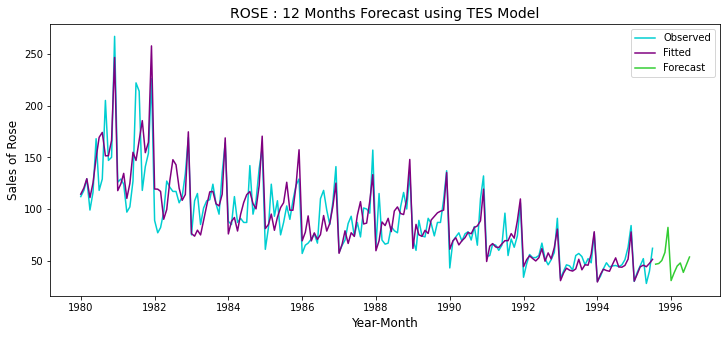

In [333]:
plt.figure(figsize=(12,5))

plt.plot(rose['Rose'], label='Observed', color = 'darkturquoise')
plt.plot(Full_model_TES_rose_fit.fittedvalues, label='Fitted', color = 'purple')
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using TES Model', fontsize=14)

plt.legend(loc='best')
plt.show()

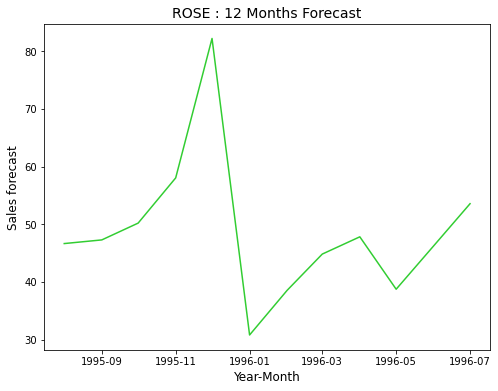

In [334]:
plt.figure(figsize=(8,6))
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('ROSE : 12 Months Forecast', fontsize=14);

### 2.10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

In [335]:
TES_rose_forecast

1995-08-01    46.645790
1995-09-01    47.277864
1995-10-01    50.192392
1995-11-01    58.032965
1995-12-01    82.211766
1996-01-01    30.793144
1996-02-01    38.536058
1996-03-01    44.822234
1996-04-01    47.814473
1996-05-01    38.727986
1996-06-01    46.255070
1996-07-01    53.559025
Freq: MS, dtype: float64

In [336]:
TES_rose_forecast.describe()

count    12.000000
mean     48.739064
std      12.747211
min      30.793144
25%      43.298672
50%      46.961827
75%      51.034051
max      82.211766
dtype: float64

In [337]:
TES_rose_forecast.sum()

584.8687673857352

* **The model forecasts sale of 585 units of Rose wine in 12 months into future. Which is an average sale of 48 units per month.**
* **The seasonal sale in December 1995 will reach a maximum of 82 units, before it drops to the lowest sale in January 1996; at 30 units.**
* **Unlike Sparkling wine, Rose wine sells very low number of units and the standard deviation is only 12.75. Which means that higher demand does not impact procurement and production.**
* **The ABC estate wine should investigate the low demand for Rose wine in market and make corrective actions in marketing and promotions.**